In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import seaborn as sns
from scipy import stats
import math
from scipy.optimize import minimize, LinearConstraint
import matplotlib.ticker as mtick
import scipy.optimize
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from scipy.stats import beta

In [2]:
FPs_med_all = pd.read_csv("FPs_med_all.csv", index_col=0) # Importing the same file in case we close window between sessions
FPs_disp_all = pd.read_csv("FPs_disp_all.csv", index_col=0)

In [3]:
FPs_med_all

0           1           2           3           4  \
DS1_med   89.029391   90.760477   92.207110  104.862821   90.760477   
DS2_med  138.937350  142.375597  142.972586  163.439016  142.375597   
DS3_med  138.937350  142.375597  142.972586  163.439016  142.375597   
DS4_med  127.602799  131.837385  128.160598  147.319237  131.837385   
DS5_med  872.413377  875.852986  869.644083  898.557704  875.852986   

                  5           6           7           8           9  ...  \
DS1_med   81.298573   89.029391   92.207110   89.029391   90.760477  ...   
DS2_med  127.775430  138.937350  142.972586  138.937350  142.375597  ...   
DS3_med  127.775430  138.937350  142.972586  138.937350  142.375597  ...   
DS4_med  121.889462  127.602799  128.160598  127.602799  131.837385  ...   
DS5_med  874.205756  872.413377  869.644083  872.413377  875.852986  ...   

                990          991         992         993         994  \
DS1_med   76.821809    87.780983   88.216231   96.071242  104.862821   
DS2_med  120.798520   138.962665  138.505761  151.000474  163.439016   
DS3_med  120.798520   138.962665  138.505761  151.000474  163.439016   
DS4_med  116.542984   127.099637  127.608483  141.988379  147.319237   
DS5_med  872.539645  1037.400175  872.637719  902.218227  898.557704   

                995         996         997         998         999  
DS1_med   87.272637  104.775433   89.029391   87.272637   92.207110  
DS2_med  137.246539  181.770500  138.937350  137.246539  142.972586  
DS3_med  137.246539  181.770500  138.937350  137.246539  142.972586  
DS4_med  127.625746  131.837598  127.602799  127.625746  128.160598  
DS5_med  873.544379  875.880363  872.413377  873.544379  869.644083  

[5 rows x 1000 columns]

In [4]:
max_EDP = 5000 # In original data this is 2000, but expected to vary a fair amount between draws, using 5000 for Htot and ___ for PopExp

In [5]:
# Similar to lines at beginning of plotting script, except 
xxx = np.linspace(1,max_EDP, max_EDP) # Array of 1 to 10000, as integers
xxx = np.log10(xxx) # Finds logs of above values, should be 1 to 4 if going up to 10000
xxx2 = np.linspace(0,max(xxx),num=int(max(xxx)*10+1)) # Breaking up into x bins per log 10
xxx3=10**xxx2 # Creating x values required

The following creates dataframes for y values of each curve along 50 x values

Now we want to extend dataframe to 1,000 columns (iterations)

In [6]:
def portrait(DS):
    dff = pd.DataFrame(xxx3,columns=['Aggregate Liquefaction Hazard']) # X values for the plot
    for col in range(0,1000):#FPs_med_all.shape[1]):
        yy=[]
        for i in range(0,len(dff)):
            yy.append(stats.norm.cdf(math.log(dff.iloc[i,0]),loc=math.log(FPs_med_all.iloc[DS,col]),scale=FPs_disp_all.iloc[DS,col])) # Getting curve value for estimated parameters
        dff[col]=yy # Adding column to dataframe
    dff.set_index('Aggregate Liquefaction Hazard')
    return dff

In [7]:
DS_1=portrait(0)
DS_1=DS_1.set_index('Aggregate Liquefaction Hazard')

In [51]:
dff = pd.DataFrame(xxx3,columns=['Aggregate Liquefaction Hazard'])

In [52]:
dff.iloc[1,0]

1.2669199261318078

In [15]:
#DS_1=portrait(0)
DS_2=portrait(1)
DS_3=portrait(2)
DS_4=portrait(3)
DS_5=portrait(4)
#DS_1=DS_1.set_index('Aggregate Liquefaction Hazard')
DS_2=DS_2.set_index('Aggregate Liquefaction Hazard')
DS_3=DS_3.set_index('Aggregate Liquefaction Hazard')
DS_4=DS_4.set_index('Aggregate Liquefaction Hazard')
DS_5=DS_5.set_index('Aggregate Liquefaction Hazard')

Maybe show the distribution of y values at each x value to justify normal distribution

In [37]:
np.linspace(0,DS_1.shape[1], num = DS_1.shape[1]+1)

array([   0.,    1.,    2., ...,  998.,  999., 1000.])

In [9]:
sns.set_style("whitegrid") # Allowing axes text to have white background
sns.set(font_scale=2)  # Increasing axes text size

In [12]:
df = pd.read_csv("gfailruns_allevents_forAlex_v2.4.csv") # Import CSV of Name, TLSE, Building level, Transportation Level, Utilities Level
df = df.dropna(subset=['Buildings_Cost']) # Drop rows where DS is No Value for Buildings (should be same rows for Transportation and Utilities)
df.drop(df[df['American?'] == 0].index, inplace=True) # Dropping non-American events
df.drop(df[df['PH_LQ'] == 0].index, inplace=True) # Dropping non-LSE events
df.drop(df[df['PH_LQ'] == np.float('inf')].index, inplace=True) # Dropping allegedly infinite 2004 Pakistan event

In [18]:
df

eventcode      time  year  mag  \
0                   ci10012262   8/13/78  1978  5.1   
1                     ci134894  11/24/87  1987  6.2   
2                    ci3019681   4/23/92  1992  6.1   
3                    ci3105173   5/17/93  1993  6.1   
4                    ci3329122    4/9/68  1968  6.6   
5                    ci3347678    2/9/71  1971  6.6   
7                     ci628016  11/24/87  1987  6.6   
8                     ci700917    7/8/86  1986  6.0   
9                     ci731691   10/1/87  1987  5.9   
25                ld2002042000   4/20/02  2002  5.3   
26                  nc10085763   7/21/86  1986  6.4   
27                   nc1053043   5/25/80  1980  6.1   
28                   nc1053045   5/25/80  1980  6.0   
29                   nc1053054   5/25/80  1980  6.1   
30                   nc1053177   5/27/80  1980  6.2   
31                   nc1091100    5/2/83  1983  6.7   
32                     nc17204   4/24/84  1984  6.2   
33                    nc228027   8/17/91  1991  6.0   
34                    nc269151   4/25/92  1992  7.2   
35                     nc32321  11/23/84  1984  6.1   
36                    nm606657   4/18/08  2008  5.2   
37                  nn00725272   5/15/20  2020  6.5   
65                  us70008jr5   3/31/20  2020  6.5   
77                   ushis2396   8/18/59  1959  7.3   
78                  usp0000ad8   3/28/75  1975  6.1   
86                  usp000155j   1/24/80  1980  5.8   
88                  usp0001zbv  10/28/83  1983  6.9   
158                 uw10313838   9/21/93  1993  6.0   
159                 ci14383980   7/29/08  2008  5.4   
160                  ci9108652  10/16/99  1999  7.1   
161                 nc21123384    9/3/00  2000  4.9   
163                   se609212   8/23/11  2011  5.8   
164                  ci3031111   6/28/92  1992  7.3   
184                 nc21323712  12/22/03  2003  6.5   
185               ak002e435qpj   11/3/02  2002  7.9   
186               ak018fcnsk91  11/30/18  2018  7.1   
187                 ci14607652    4/4/10  2010  7.2   
188                  ci3144585   1/17/94  1994  6.7   
189                 ci38457511    7/6/19  2019  7.1   
190                  nc1046962    8/6/79  1979  5.8   
191                   nc216859  10/18/89  1989  6.9   
192                 nc72282711   8/24/14  2014  6.0   
194  official19640328033616_30   3/28/64  1964  9.2   
195                 us10006jxs    9/3/16  2016  5.8   
196                  ushis2810   4/29/65  1965  6.7   
197                 uw10530748   2/28/01  2001  6.8   
198                  ci3031425   6/28/92  1992  6.3   

                                         location    HaggLQ  ExpPopLQ  \
0                     12km S of Santa Barbara, CA     0.200       150   
1                     17km WNW of Westmorland, CA    15.000       200   
2          17km NNE of Thousand Palms, California     0.390       320   
3                  46km E of Big Pine, California     0.540         0   
4                   5km NNE of Ocotillo Wells, CA    90.000     11000   
5                      10km SSW of Agua Dulce, CA    22.000     30000   
7                       22km W of Westmorland, CA    60.000      9100   
8                   6km SSW of Morongo Valley, CA     1.200       630   
9                         2km SSW of Rosemead, CA     9.300     29000   
25                                       New York     0.093         7   
26                             Central California     3.400        20   
27                             Central California     4.000         0   
28                   Long Valley area, California     0.700         0   
29                             Central California     0.690         0   
30                             Central California     0.870         1   
31                             Central California   110.000      1600   
32                            Northern California    19.000     21000   
33                            Northern California     0.072       

In [53]:
DS_1

0         1         2         3    \
Aggregate Liquefaction Hazard                                           
1.000000                       0.016449  0.017252  0.016974  0.020669   
1.266920                       0.021645  0.022579  0.022226  0.026411   
1.605086                       0.028166  0.029230  0.028789  0.033428   
2.033516                       0.036245  0.037433  0.036889  0.041914   
2.576301                       0.046130  0.047426  0.046763  0.052065   
3.263968                       0.058073  0.059452  0.058653  0.064078   
4.135186                       0.072321  0.073747  0.072797  0.078143   
5.238949                       0.089106  0.090531  0.089414  0.094434   
6.637329                       0.108630  0.109997  0.108701  0.113102   
8.408964                       0.131057  0.132297  0.130812  0.134265   
10.653484                      0.156494  0.157533  0.155850  0.158000   
13.497111                      0.184983  0.185741  0.183859  0.184334   
17.099759                      0.216491  0.216886  0.214807  0.213240   
21.664026                      0.250899  0.250854  0.248585  0.244629   
27.446586                      0.288004  0.287448  0.285003  0.278350   
34.772627                      0.327513  0.326388  0.323785  0.314190   
44.054134                      0.369056  0.367320  0.364583  0.351873   
55.813060                      0.412189  0.409819  0.406975  0.391071   
70.710678                      0.456410  0.453405  0.450488  0.431409   
89.584767                      0.501179  0.497561  0.494605  0.472476   
113.496727                     0.545933  0.541746  0.538787  0.513838   
143.791264                     0.590110  0.585421  0.582496  0.555051   
182.172018                     0.633171  0.628064  0.625208  0.595677   
230.797360                     0.674618  0.669190  0.666435  0.635297   
292.401774                     0.714010  0.708369  0.705744  0.673521   
370.449634                     0.750979  0.745237  0.742767  0.710004   
469.330023                     0.785239  0.779505  0.777209  0.744453   
594.603558                     0.816590  0.810969  0.808861  0.776635   
753.315095                     0.844919  0.839504  0.837592  0.806376   
954.389905                     0.870196  0.865067  0.863354  0.833567   
1209.135588                    0.892467  0.887687  0.886172  0.858162   
1531.877969                    0.911843  0.907458  0.906135  0.880170   
1940.766724                    0.928489  0.924529  0.923386  0.899653   
2458.796034                    0.942610  0.939088  0.938114  0.916717   
3115.097690                    0.954438  0.951352  0.950532  0.931501   
3946.579335                    0.964222  0.961558  0.960875  0.944173   
5000.000000                    0.972214  0.969946  0.969386  0.954919   

                                    4         5         6         7    \
Aggregate Liquefaction Hazard                                           
1.000000                       0.017252  0.014605  0.016449  0.016974   
1.266920                       0.022579  0.019540  0.021645  0.022226   
1.605086                       0.029230  0.025825  0.028166  0.028789   
2.033516                       0.037433  0.033720  0.036245  0.036889   
2.576301                       0.047426  0.043501  0.046130  0.046763   
3.263968                       0.059452  0.055454  0.058073  0.058653   
4.135186                       0.073747  0.069862  0.072321  0.072797   
5.238949                       0.090531  0.086991  0.089106  0.089414   
6.637329                       0.109997  0.107078  0.108630  0.108701   
8.408964                       0.132297  0.130313  0.131057  0.130812   
10.653484                      0.157533  0.156821  0.156494  0.155850   
13.497111                      0.185741  0.186651  0.184983  0.183859   
17.099759                      0.216886  0.219761  0.216491  0.214807   
21.664026                      0.250854  0.256009  0.250899  0.248585   
27.446586           

/Users/Alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


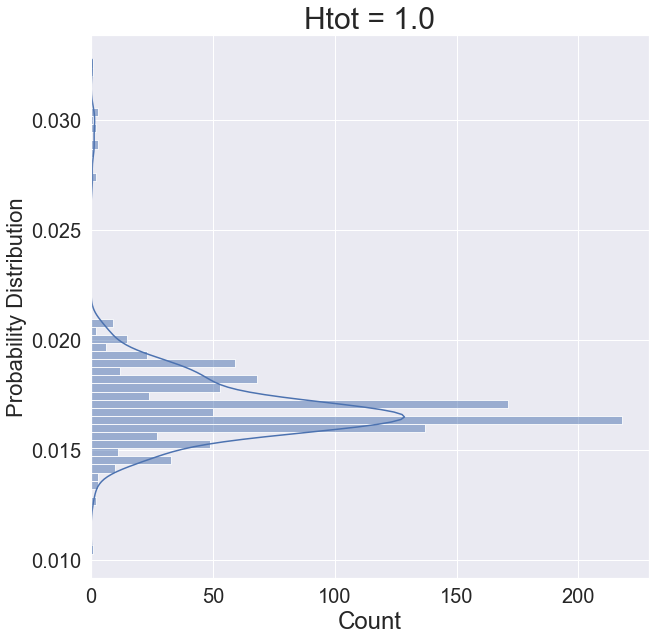

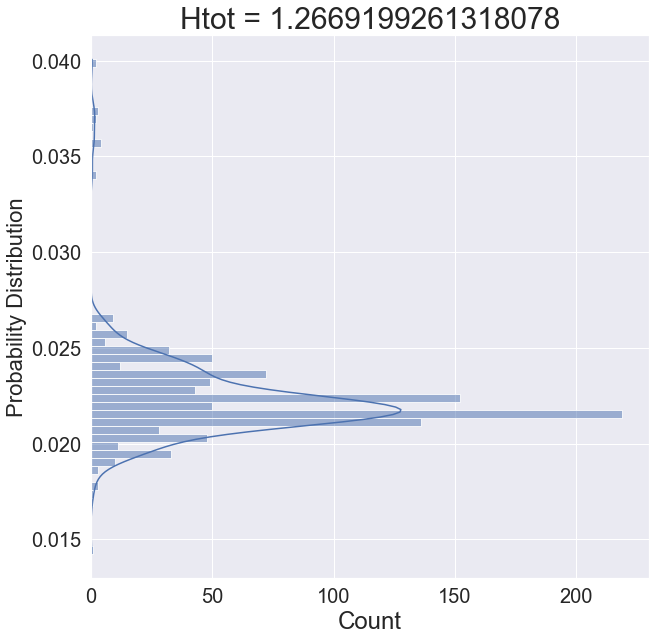

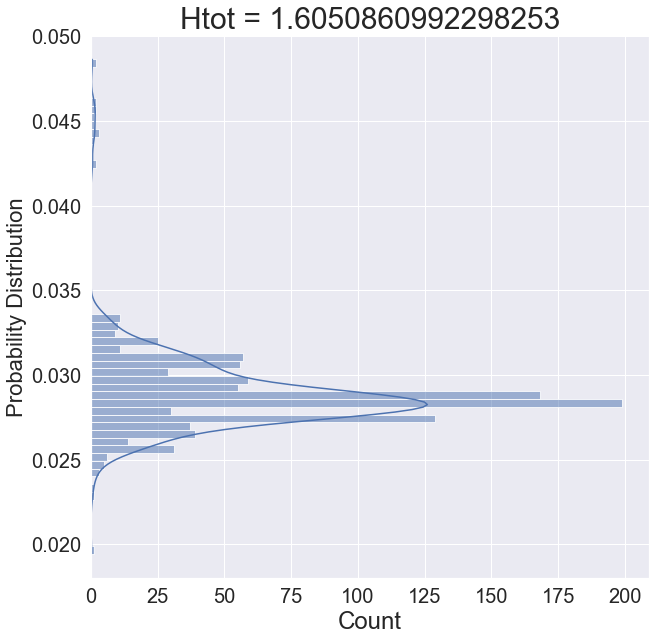

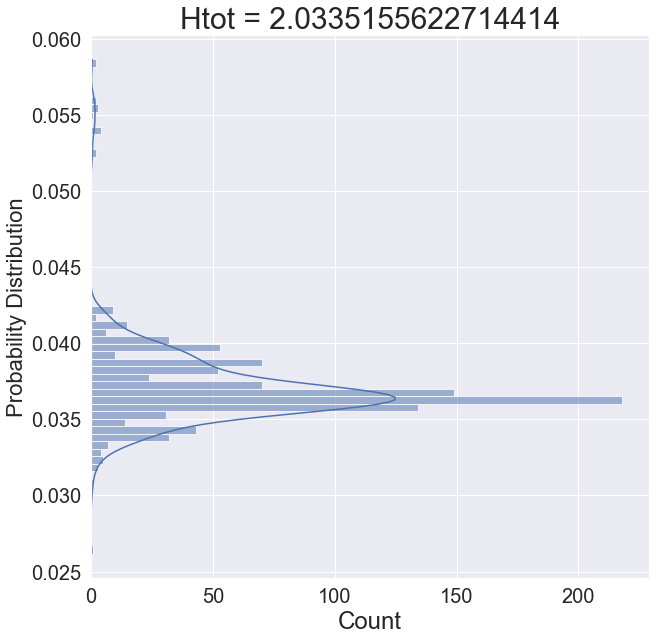

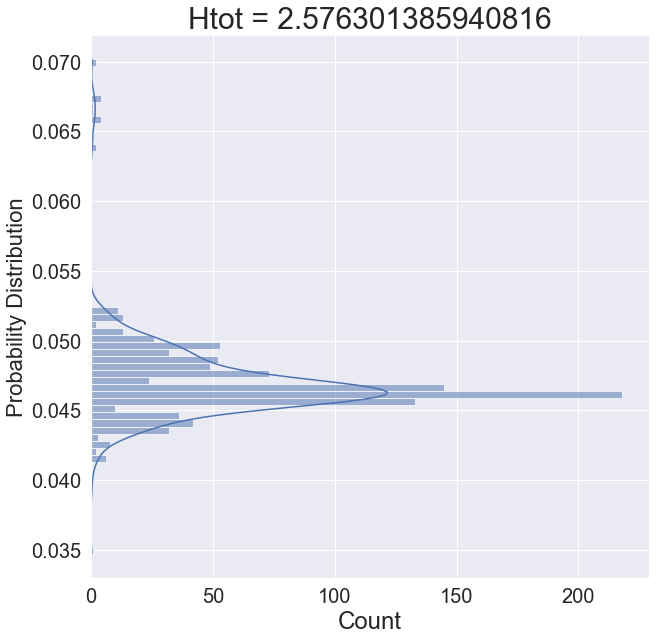

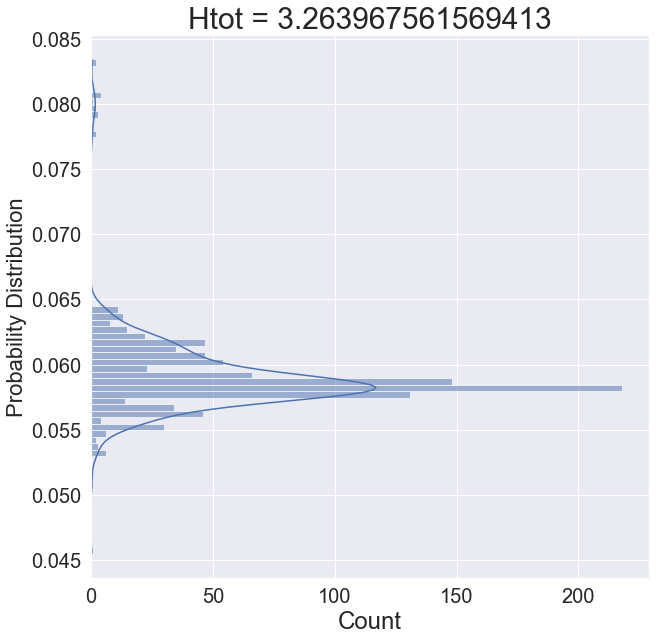

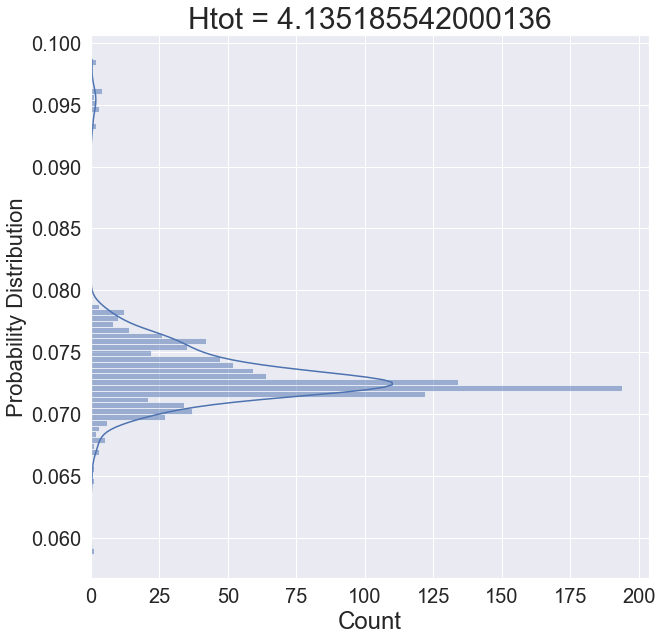

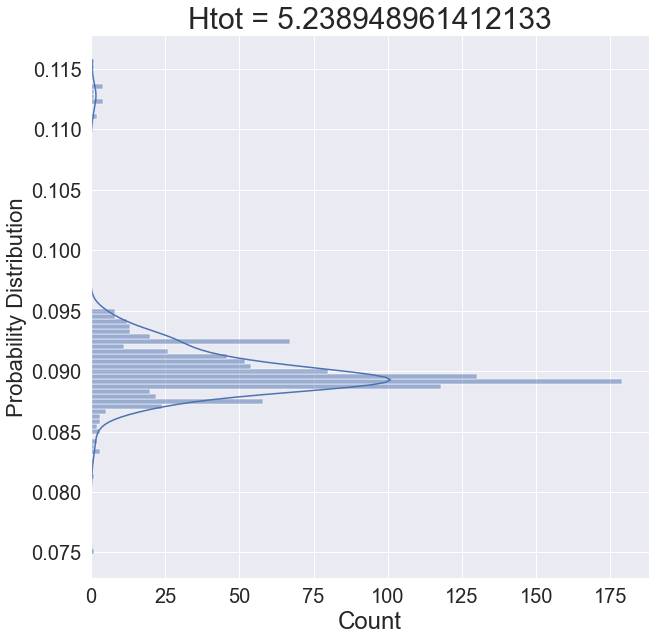

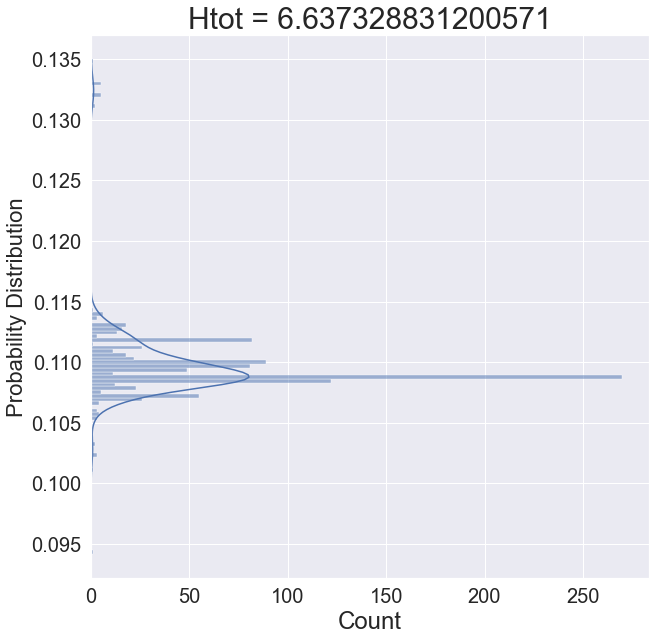

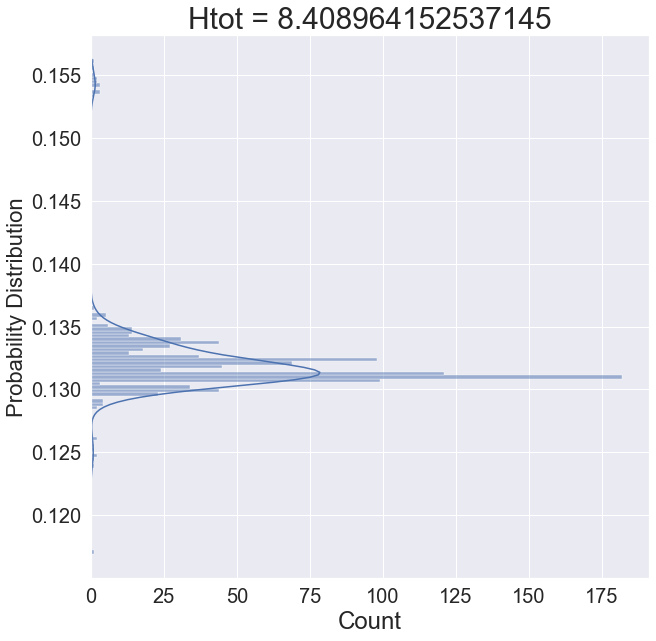

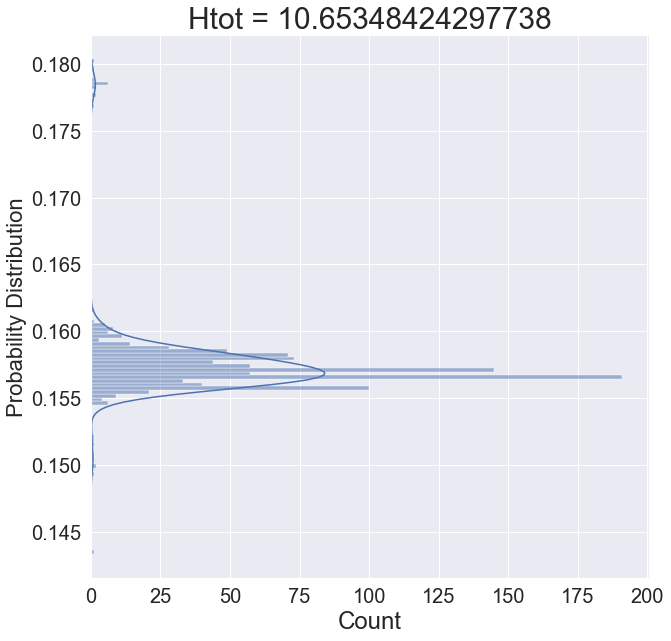

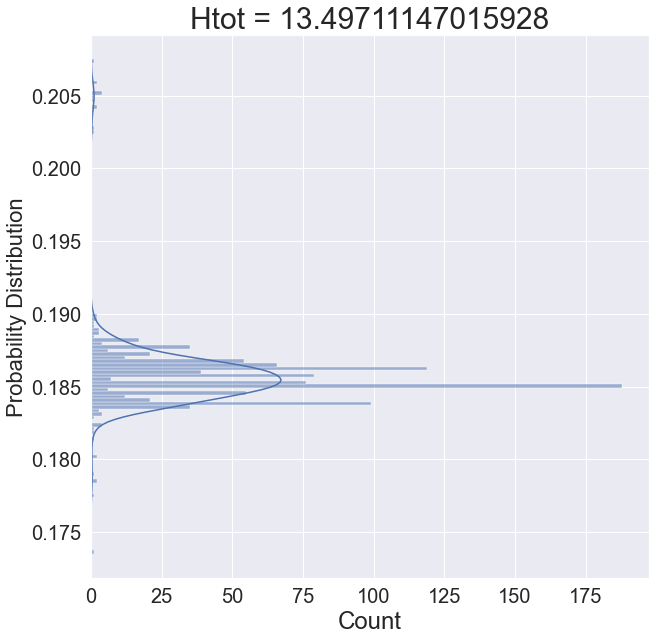

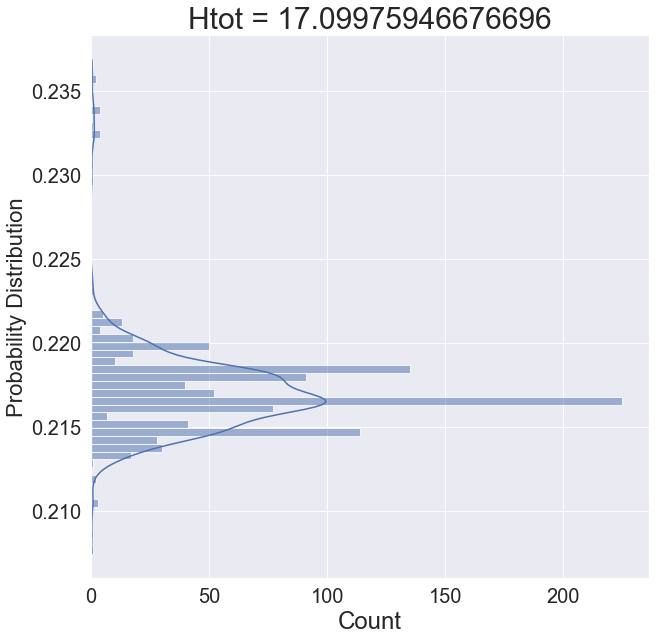

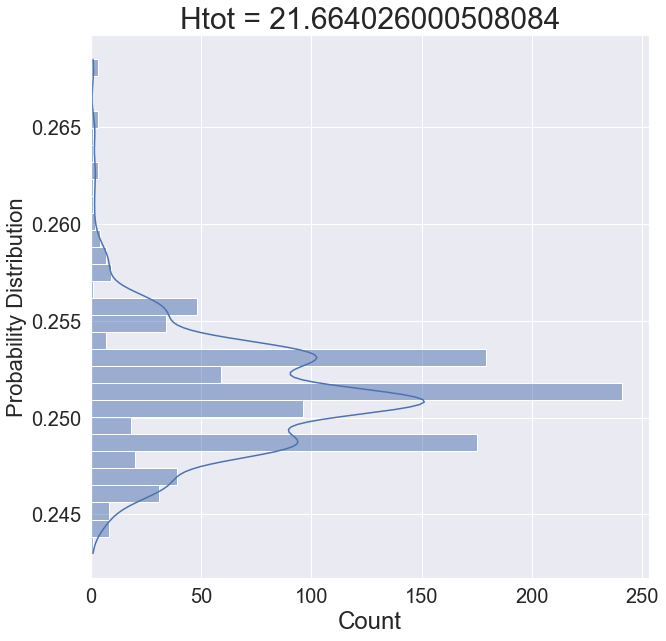

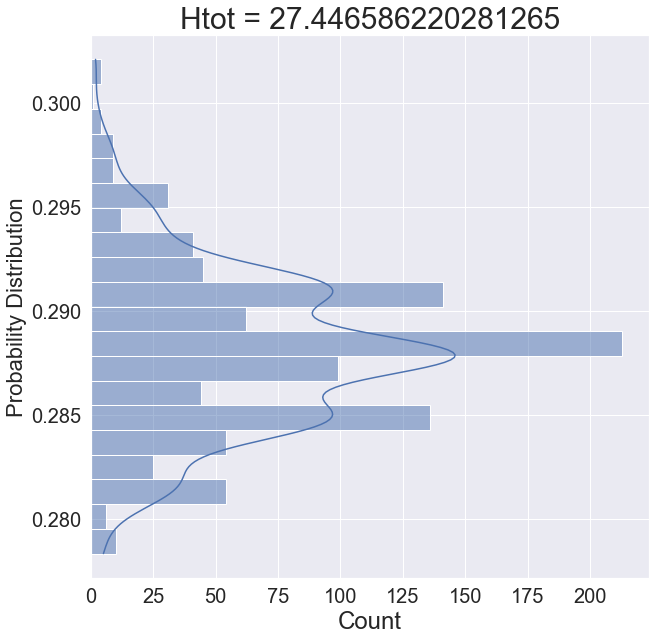

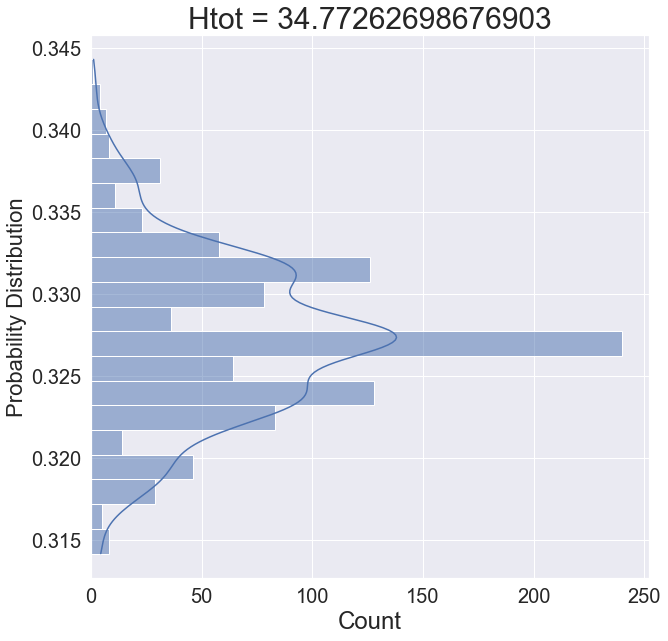

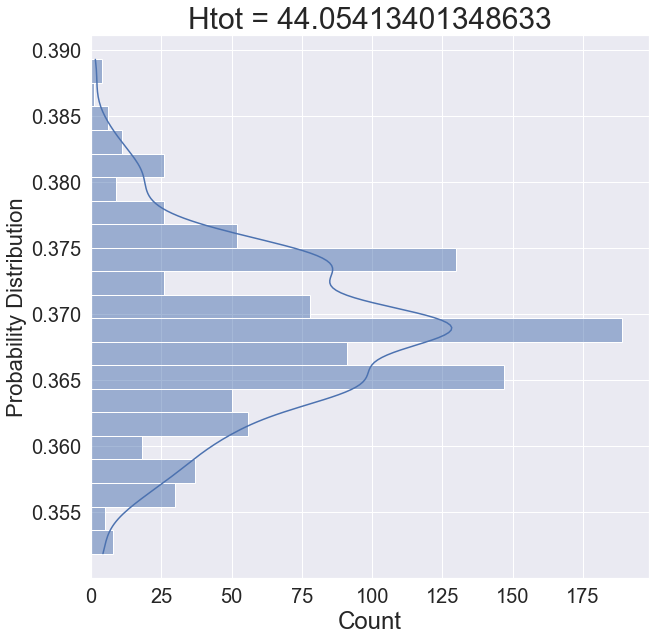

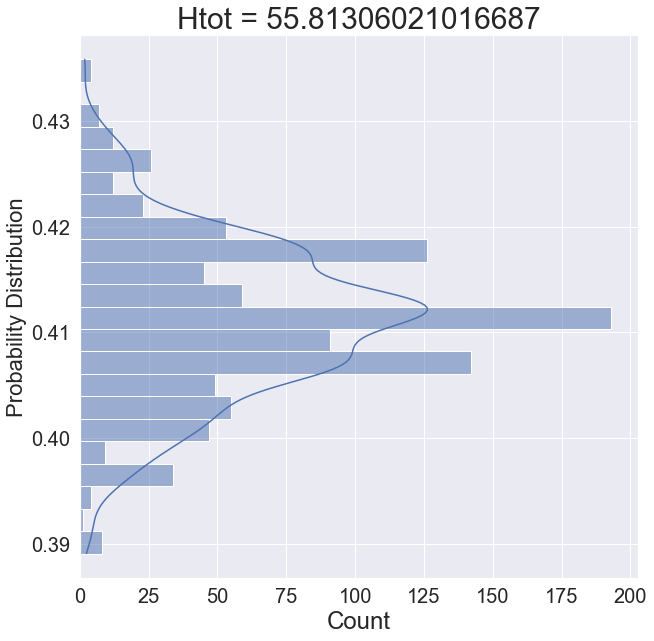

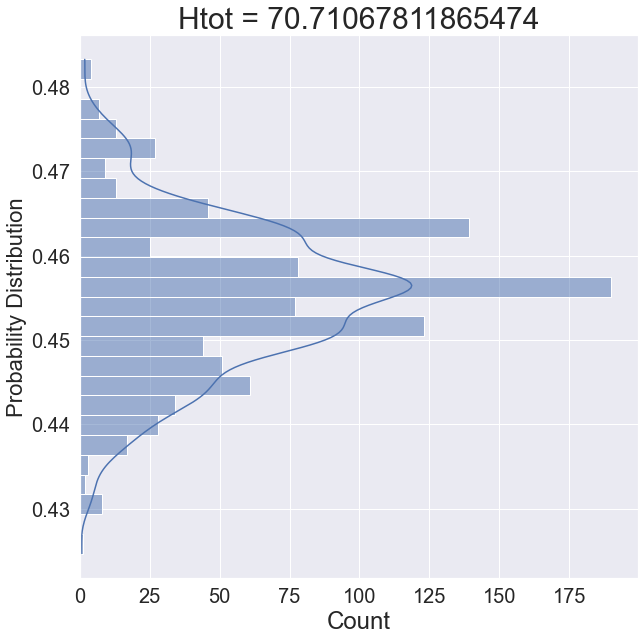

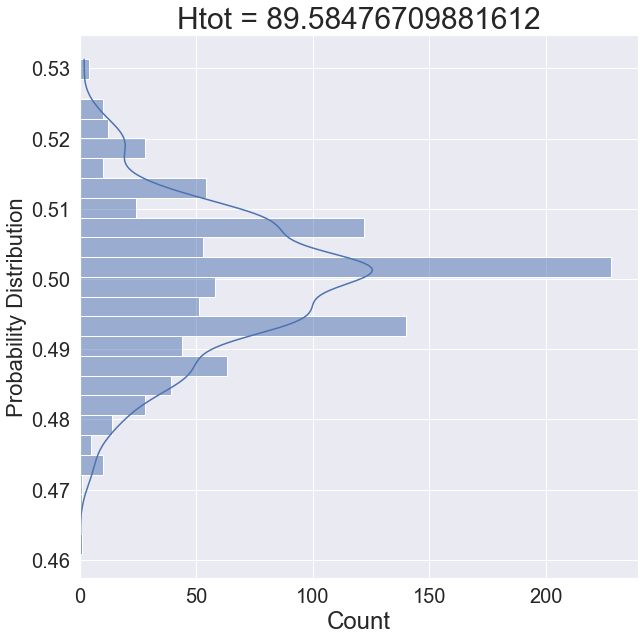

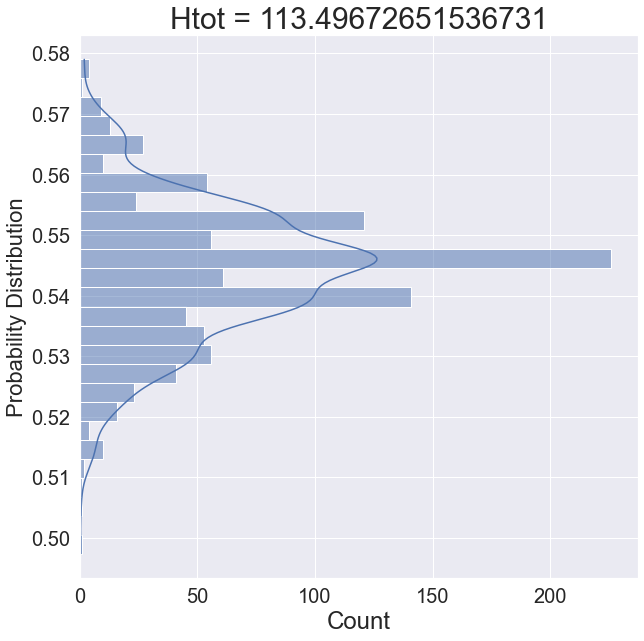

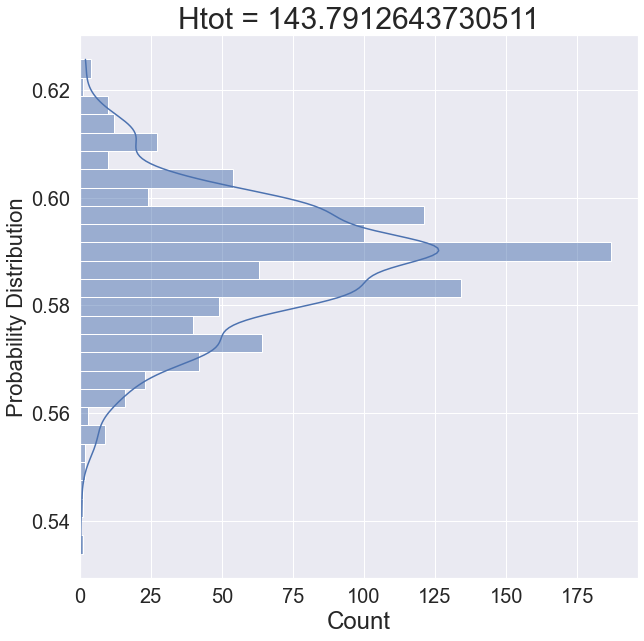

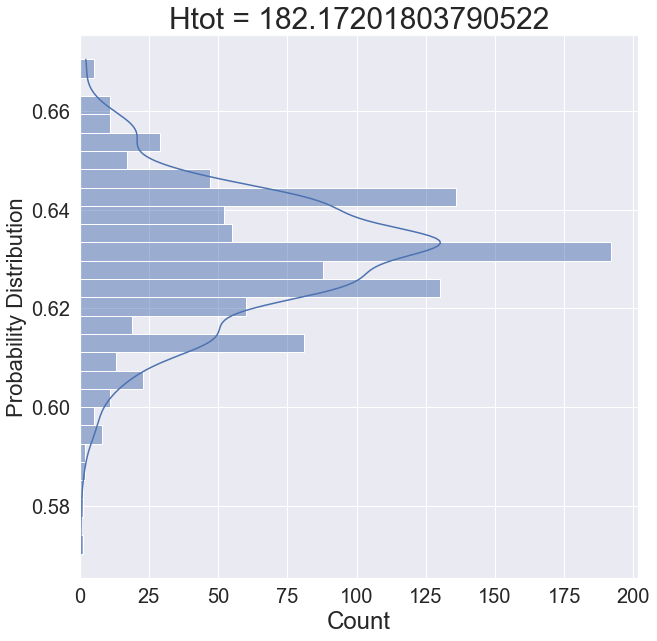

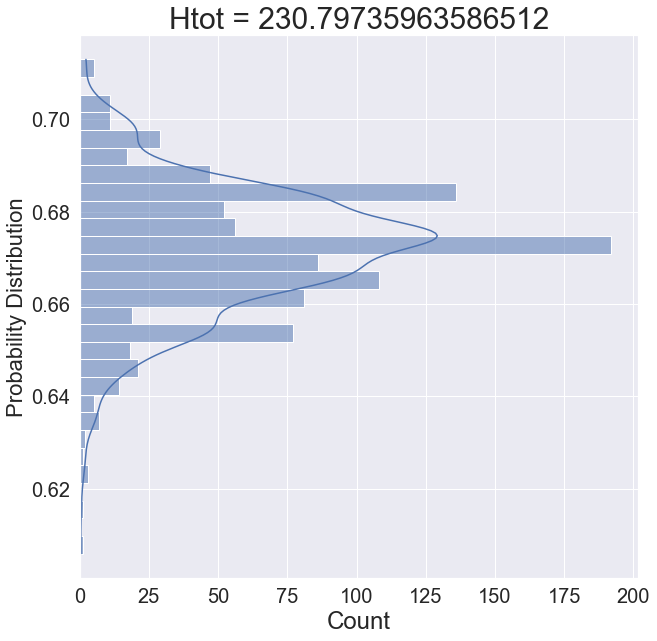

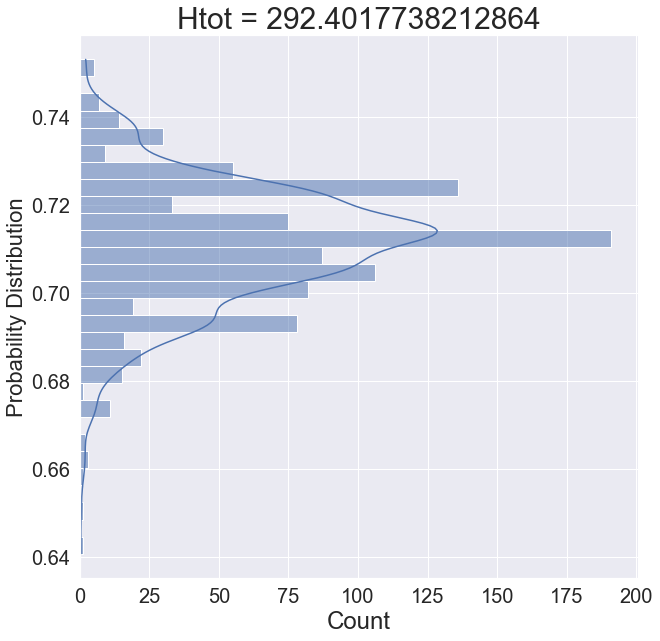

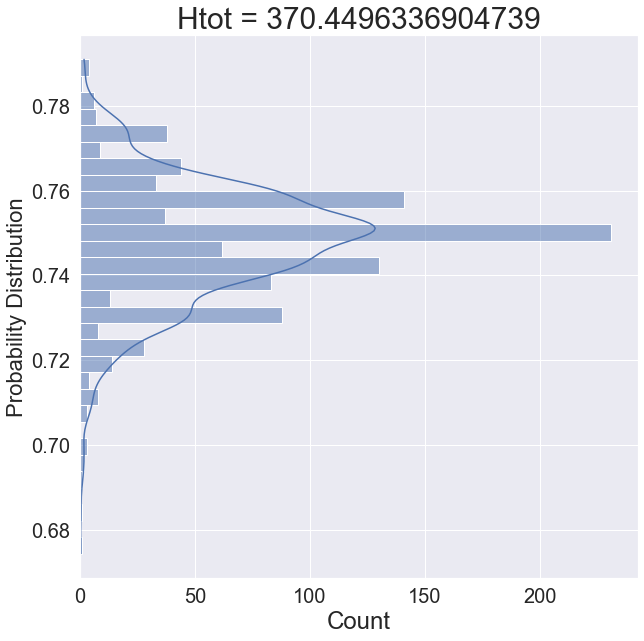

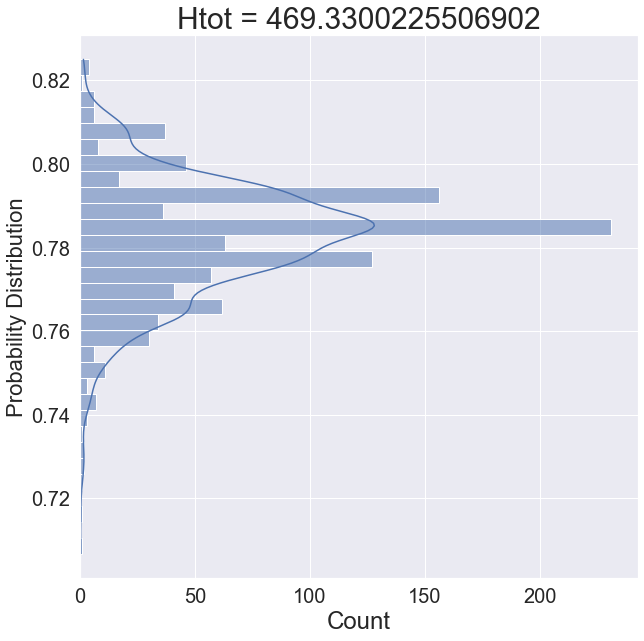

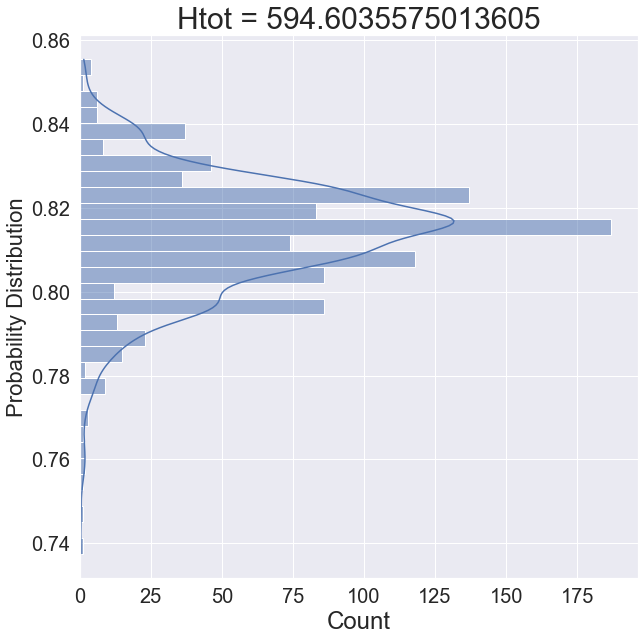

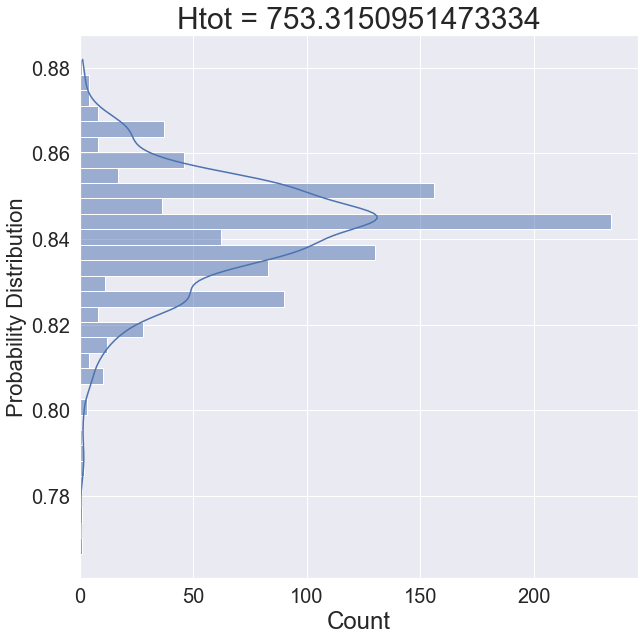

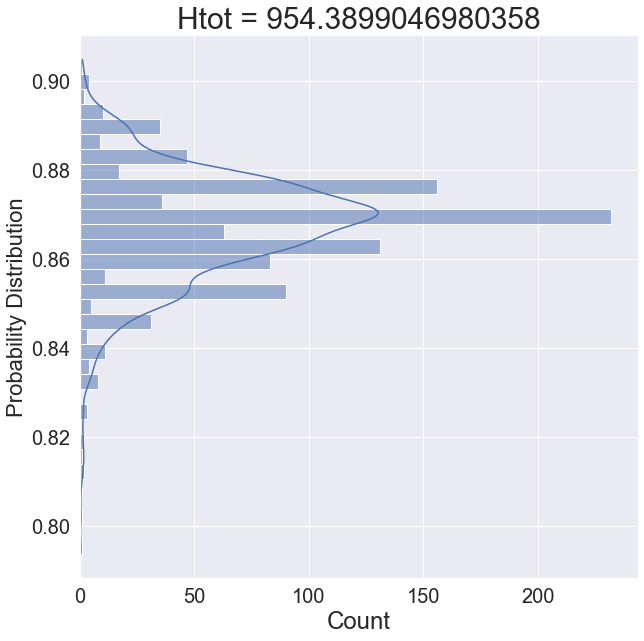

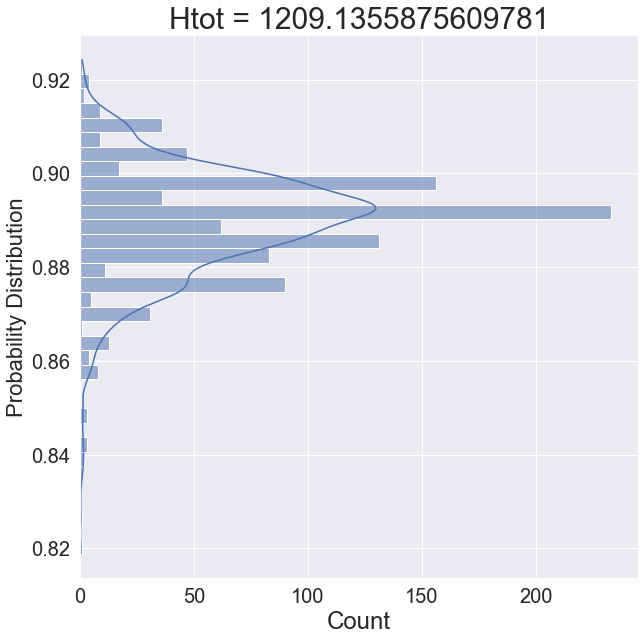

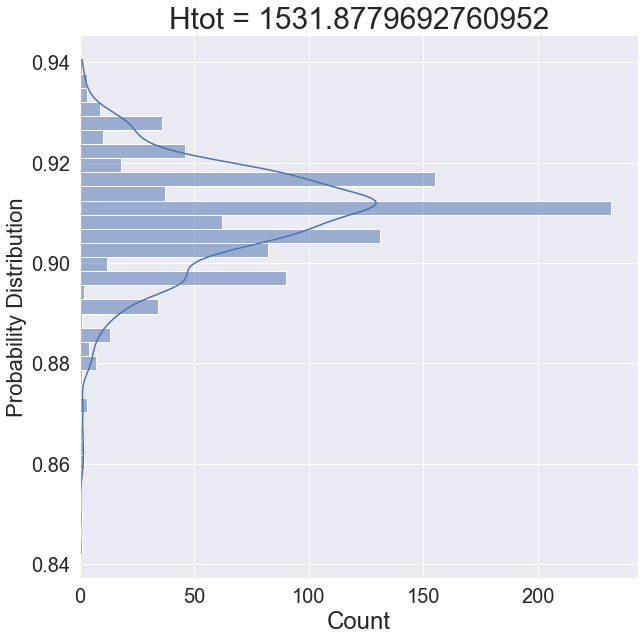

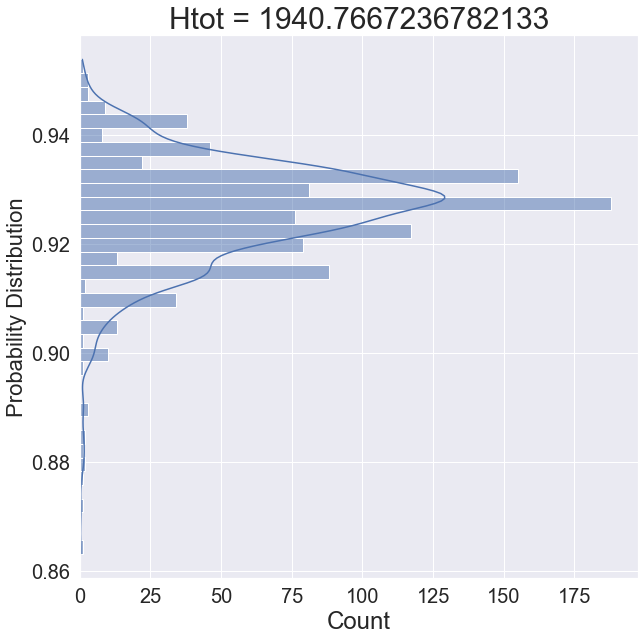

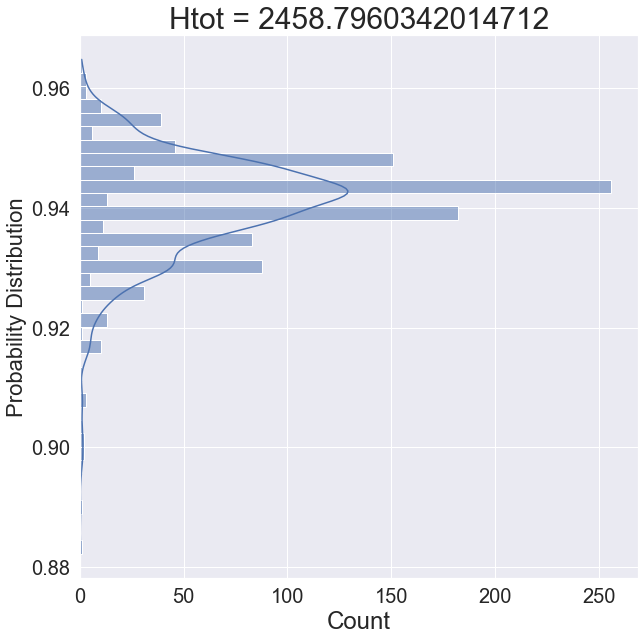

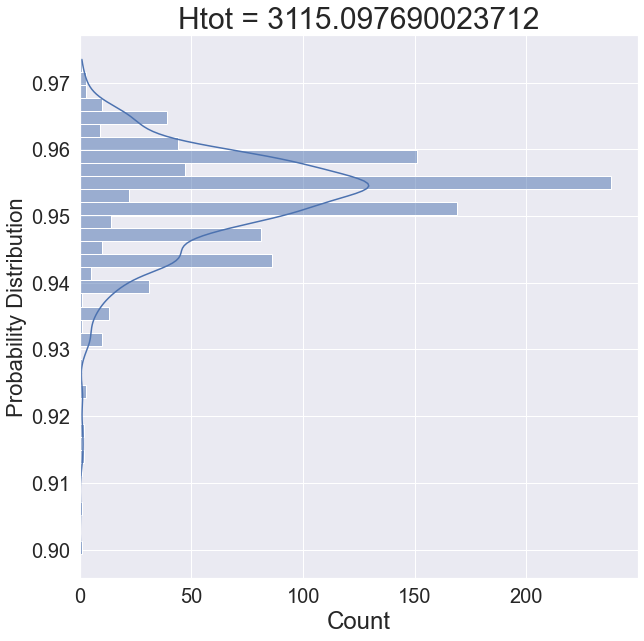

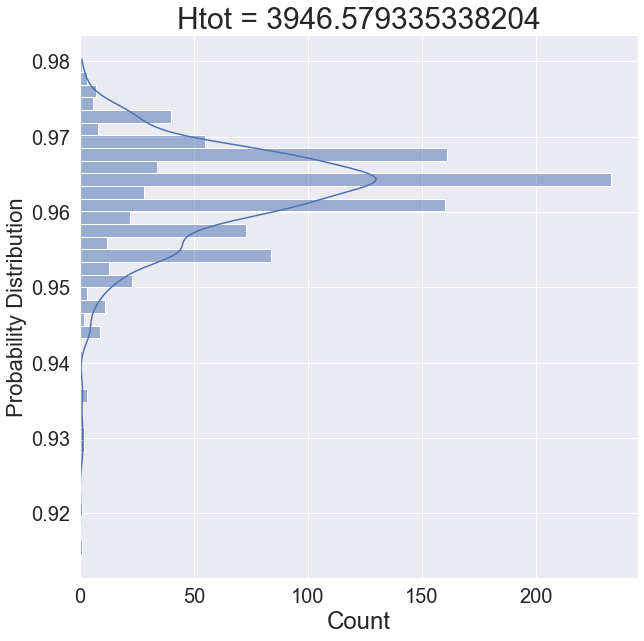

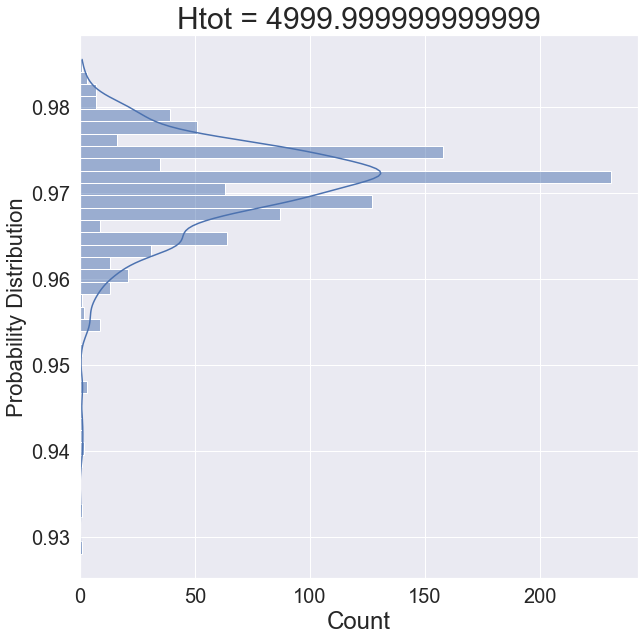

In [10]:
for iii in range(0,DS_1.shape[0]):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax = sns.histplot(y=DS_1.iloc[iii,:], kde=True) # Plots histogram and associated PDF
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    plt.ylabel('Probability Distribution', fontsize=22)
    plt.title('Htot = '+str(DS_1.index[iii]), fontsize=30) #etting the title as the location where event occurred

/Users/Alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


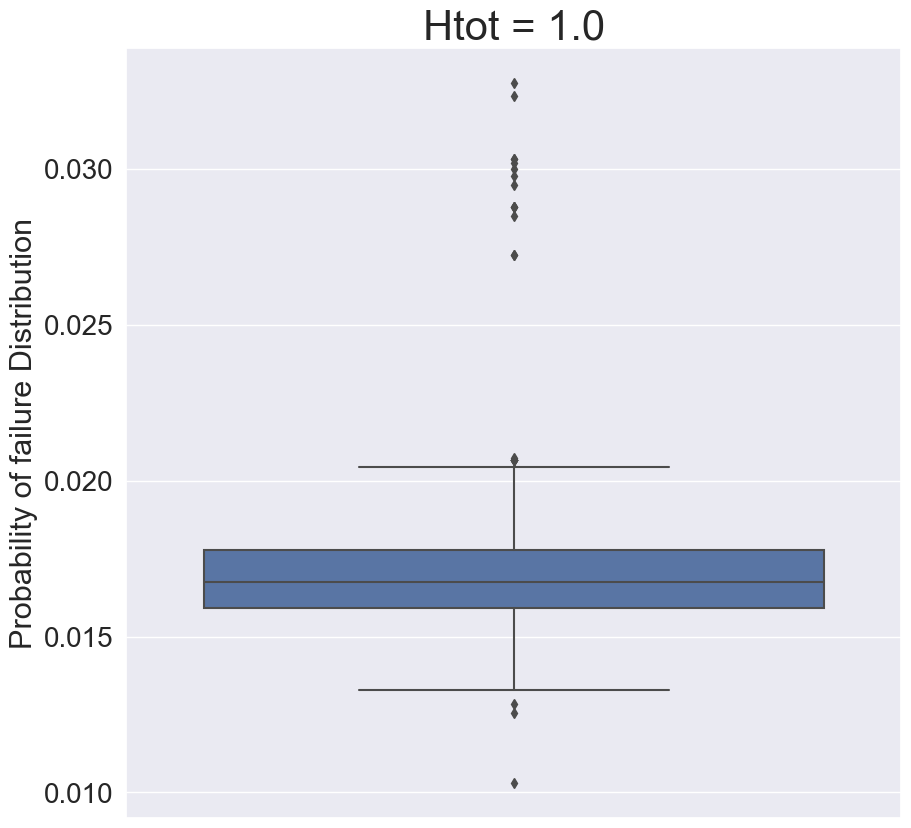

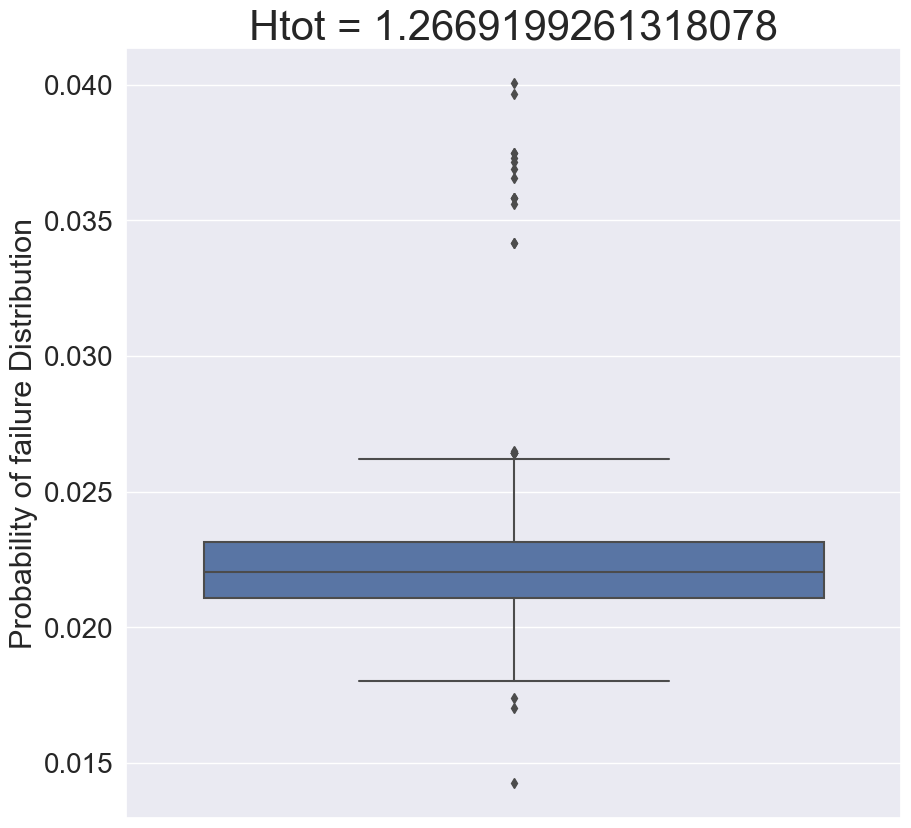

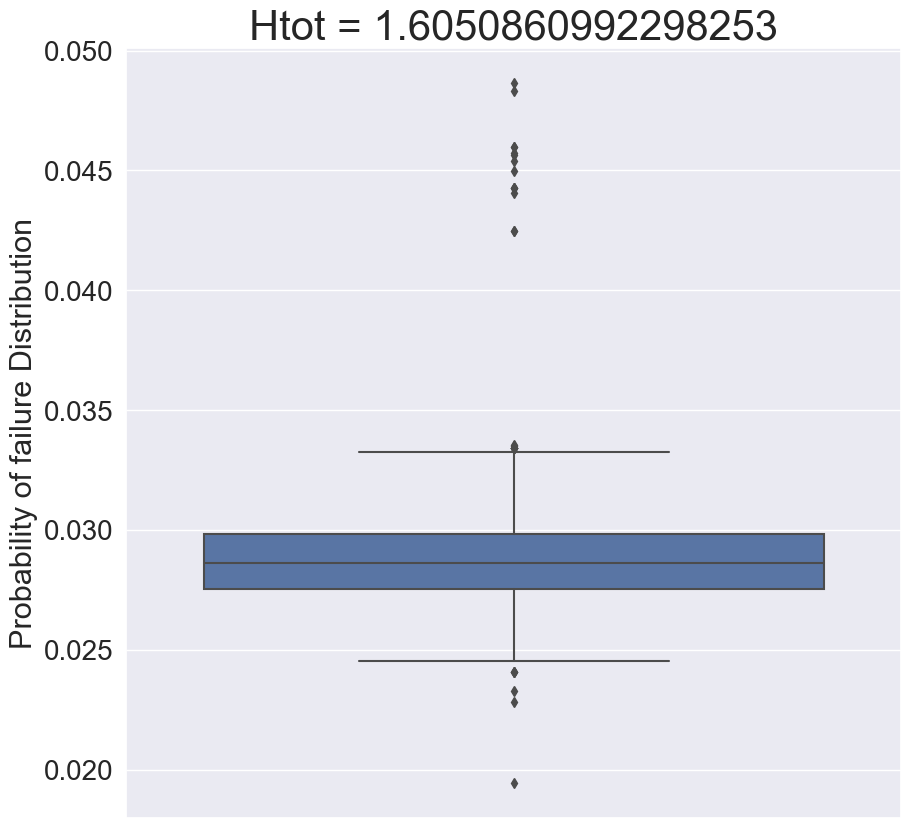

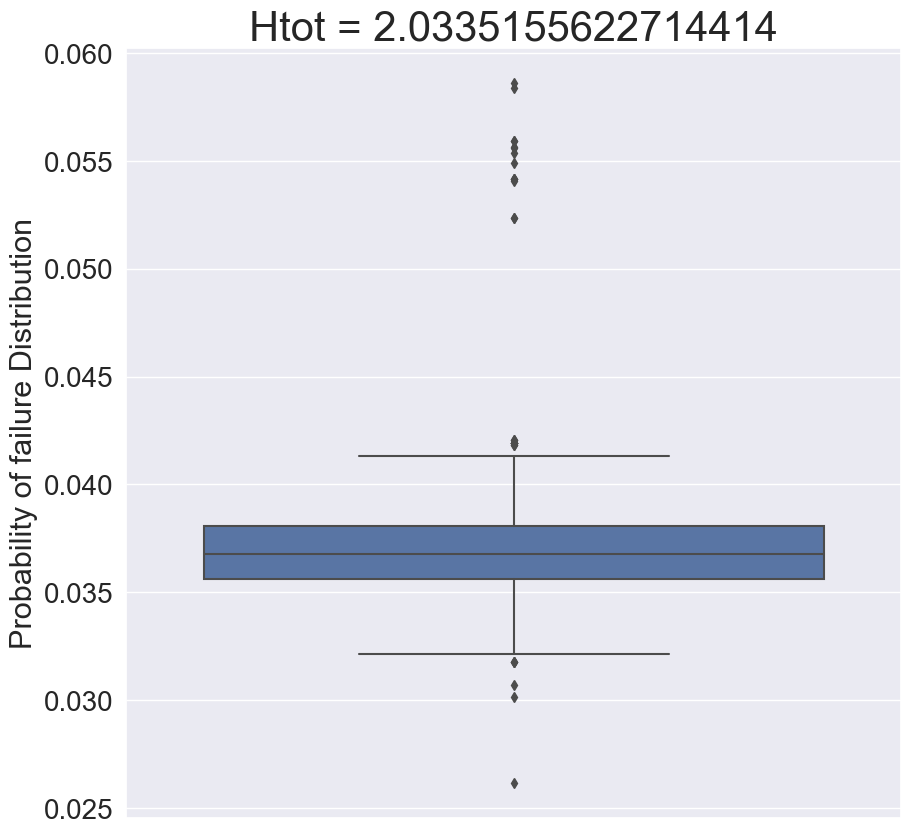

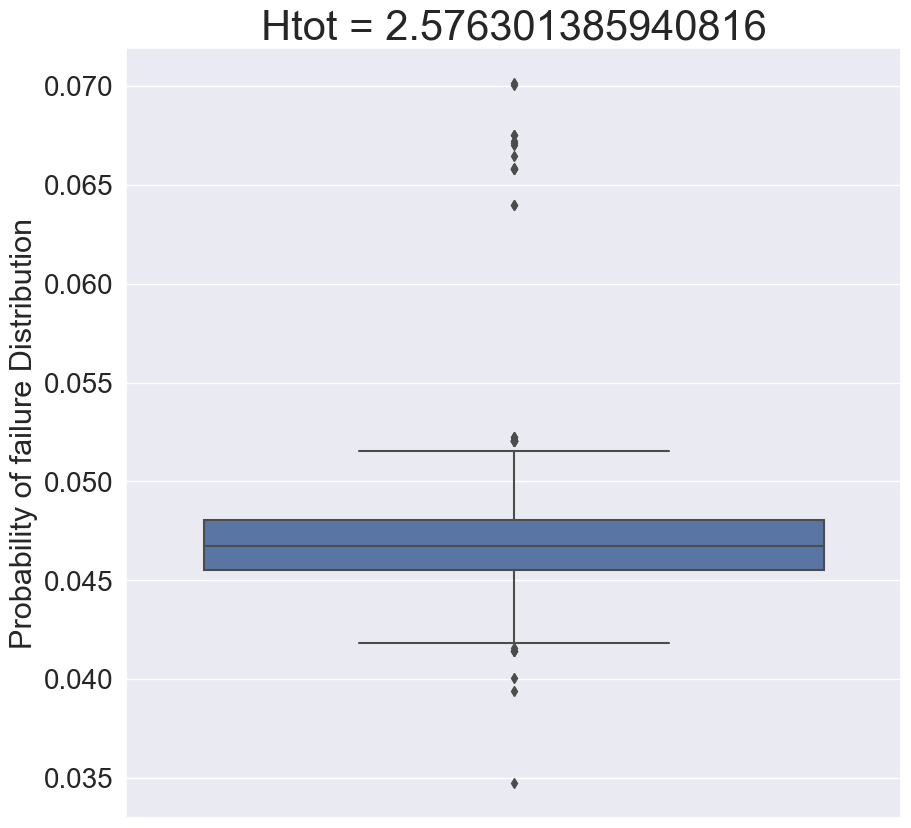

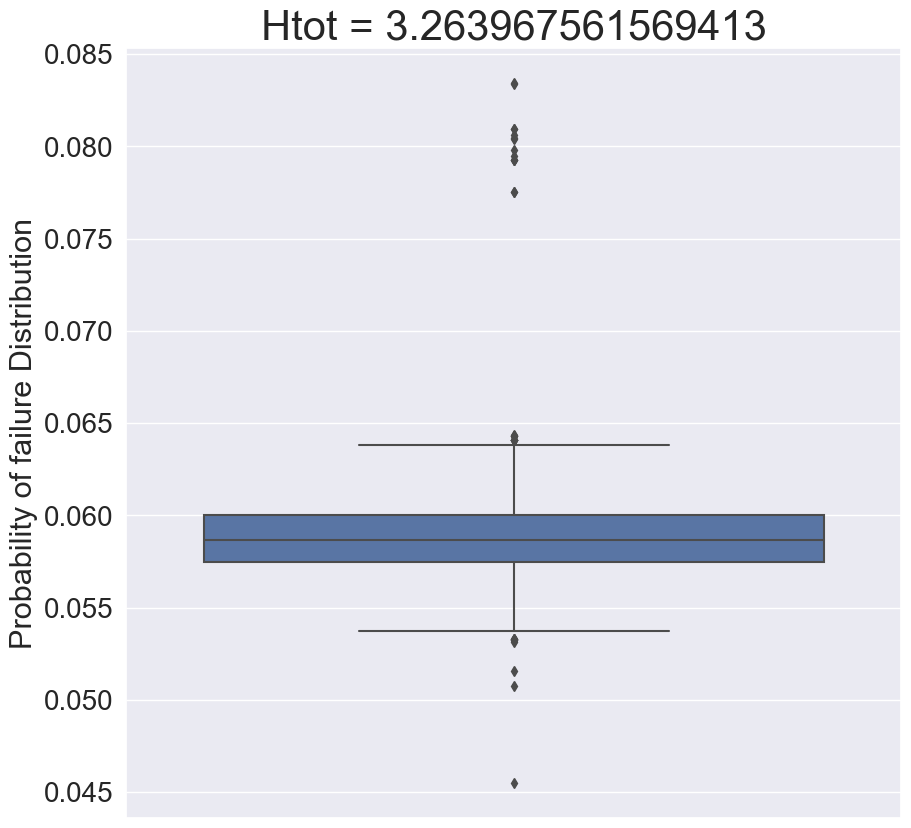

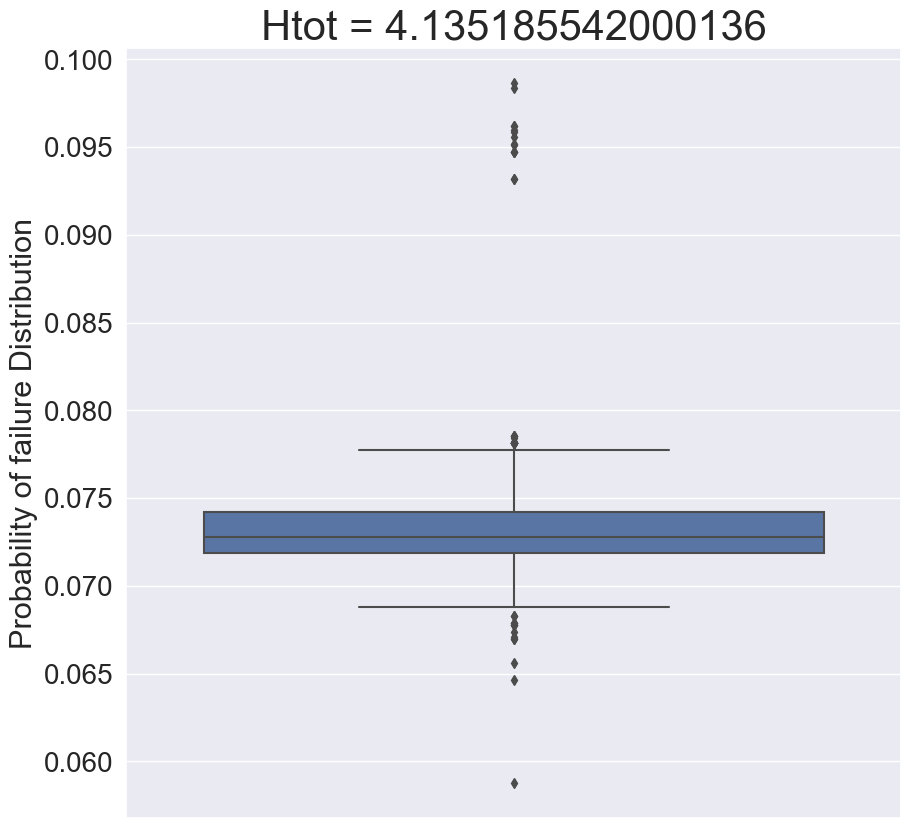

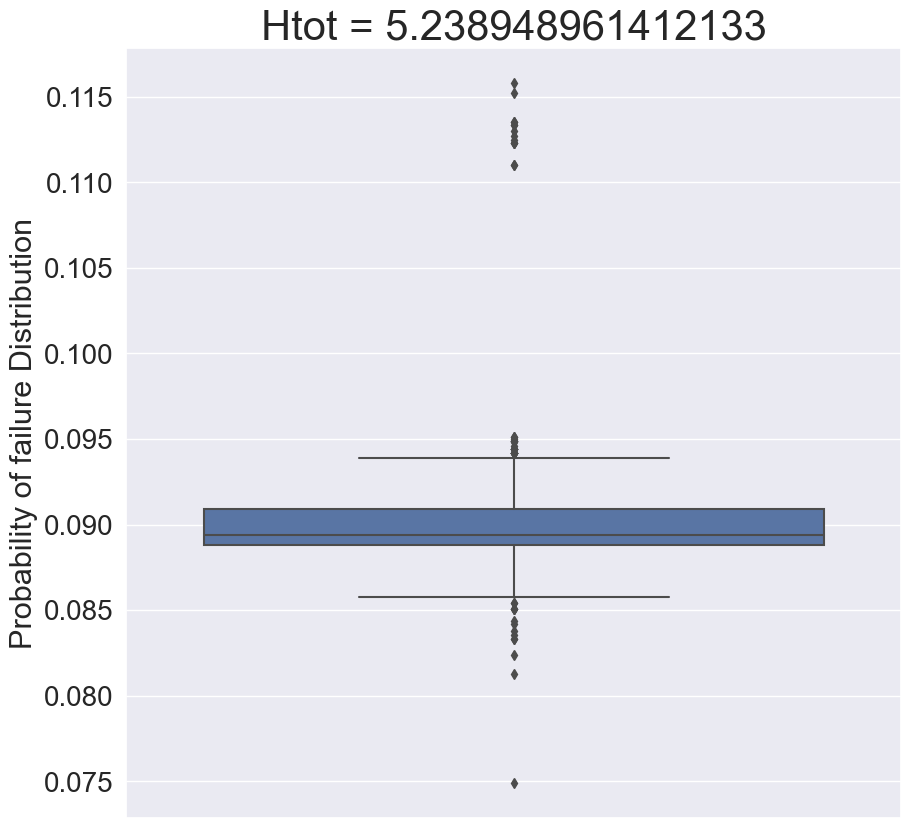

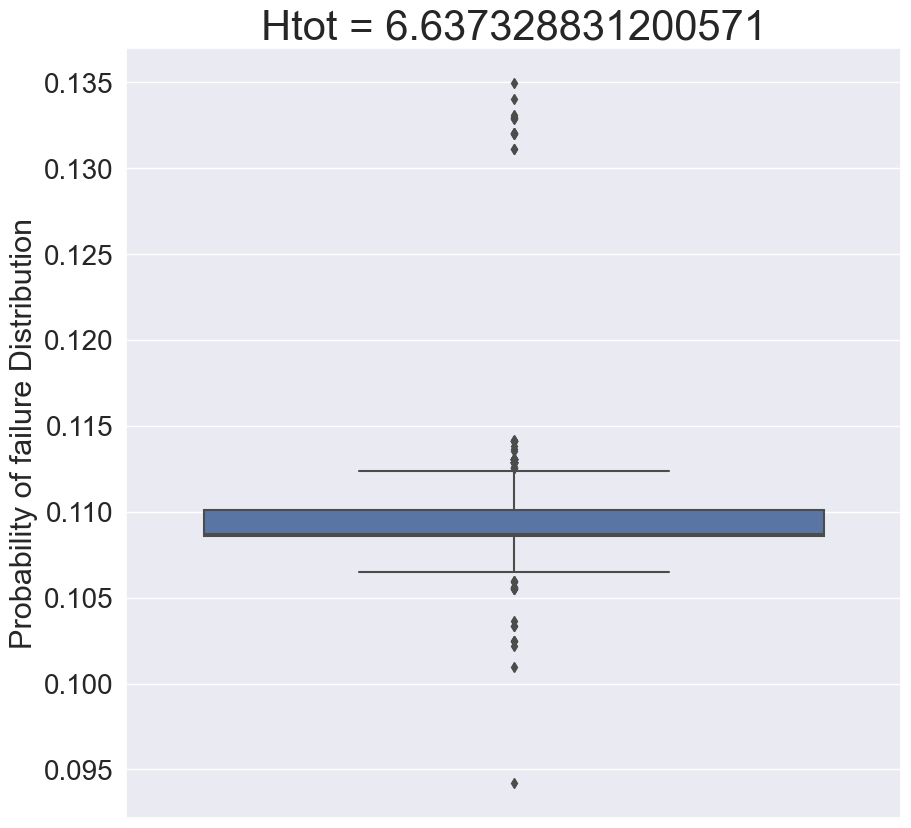

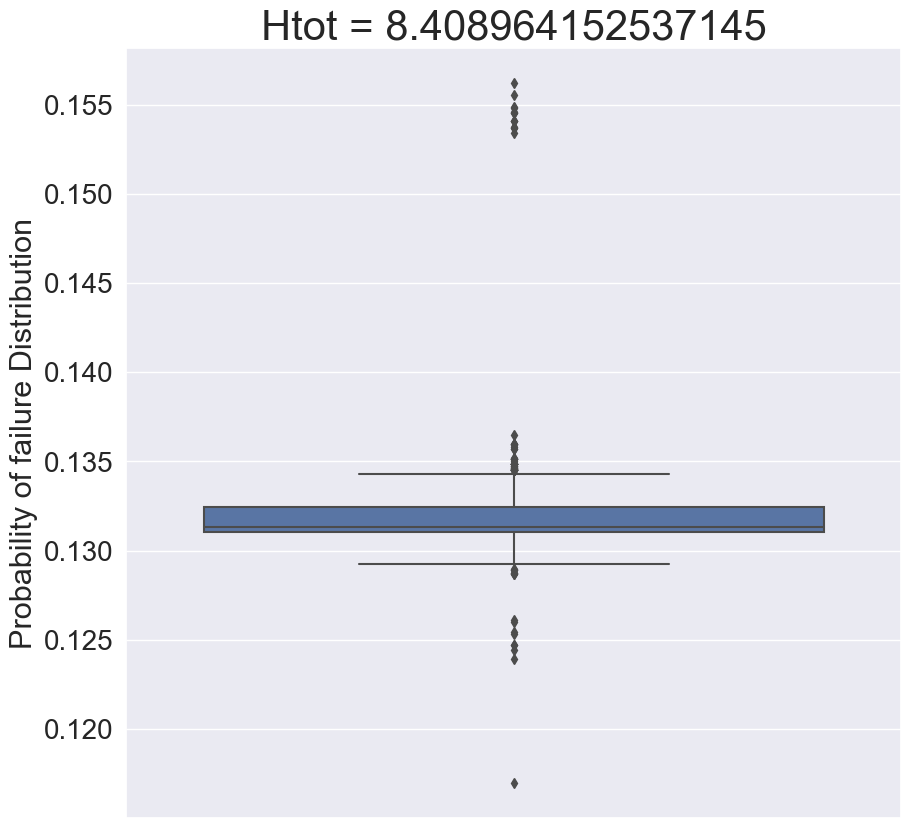

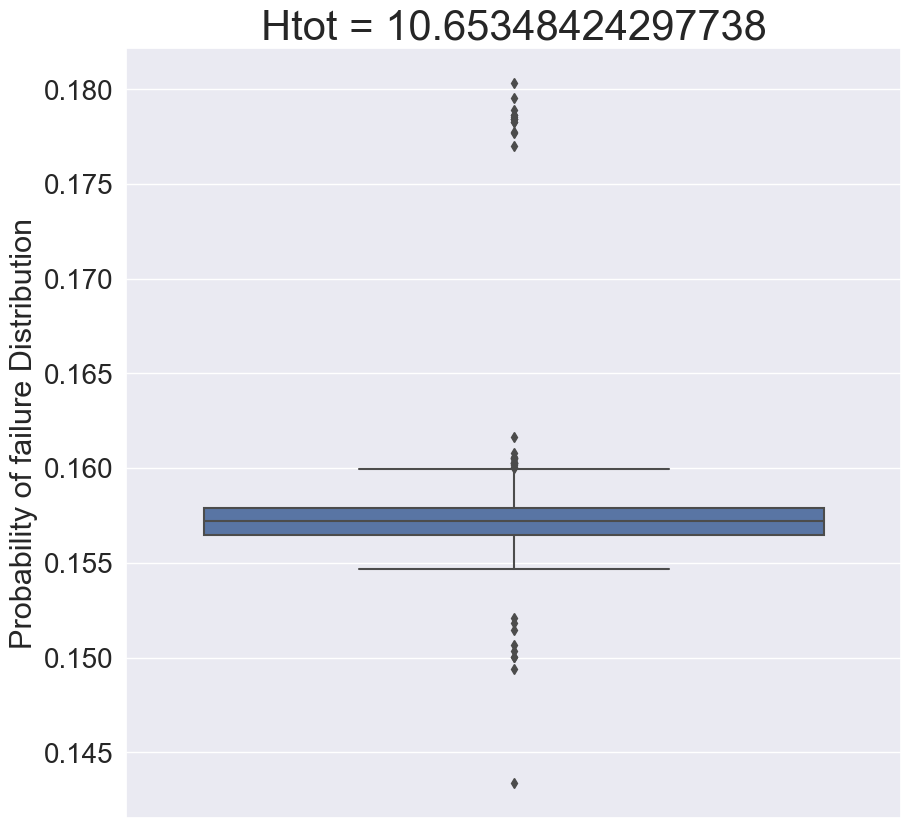

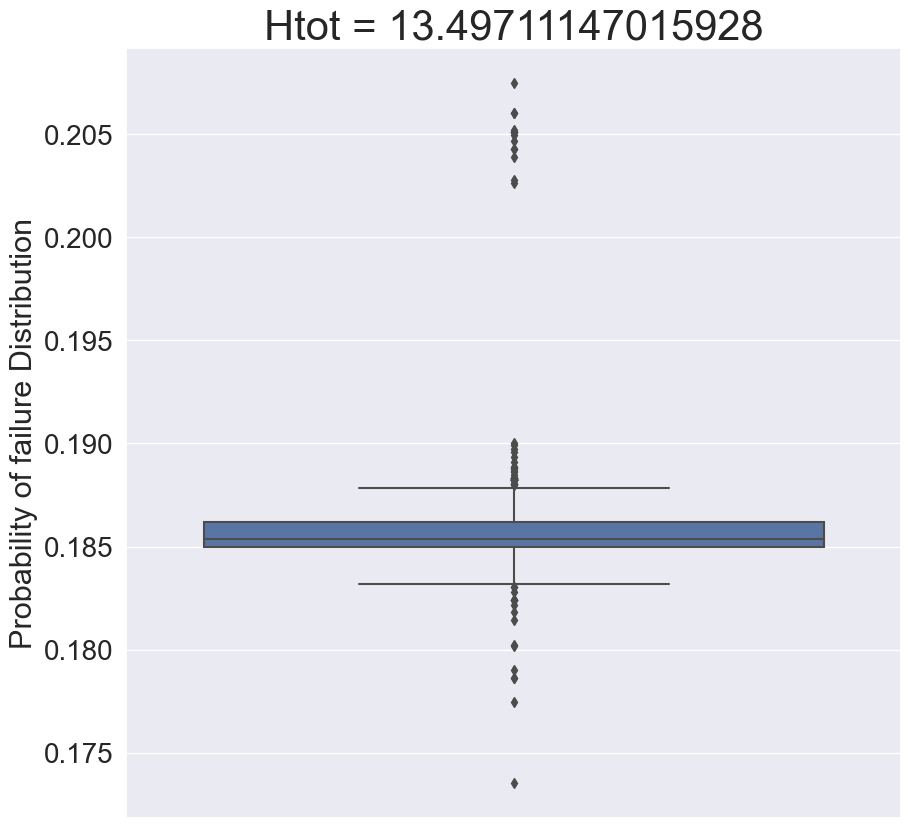

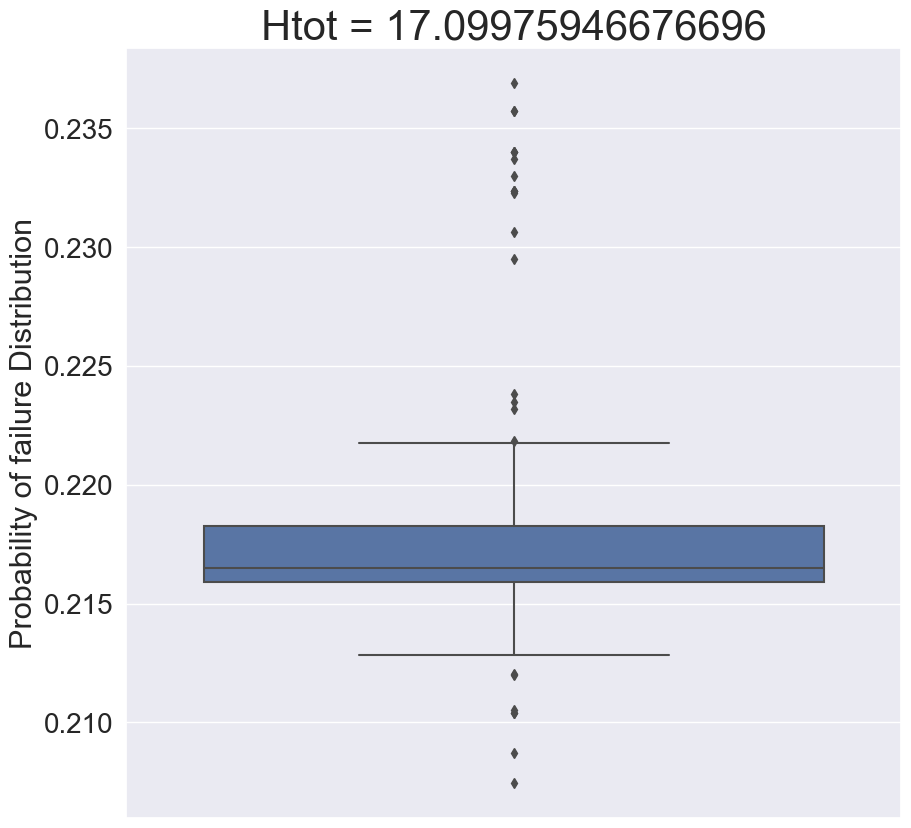

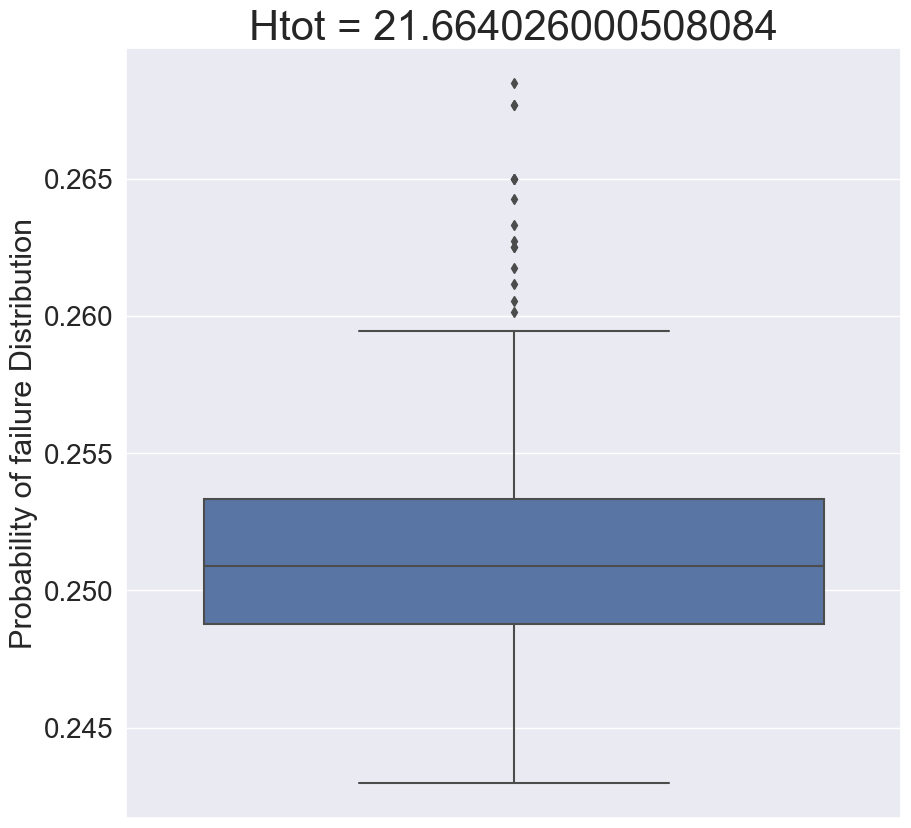

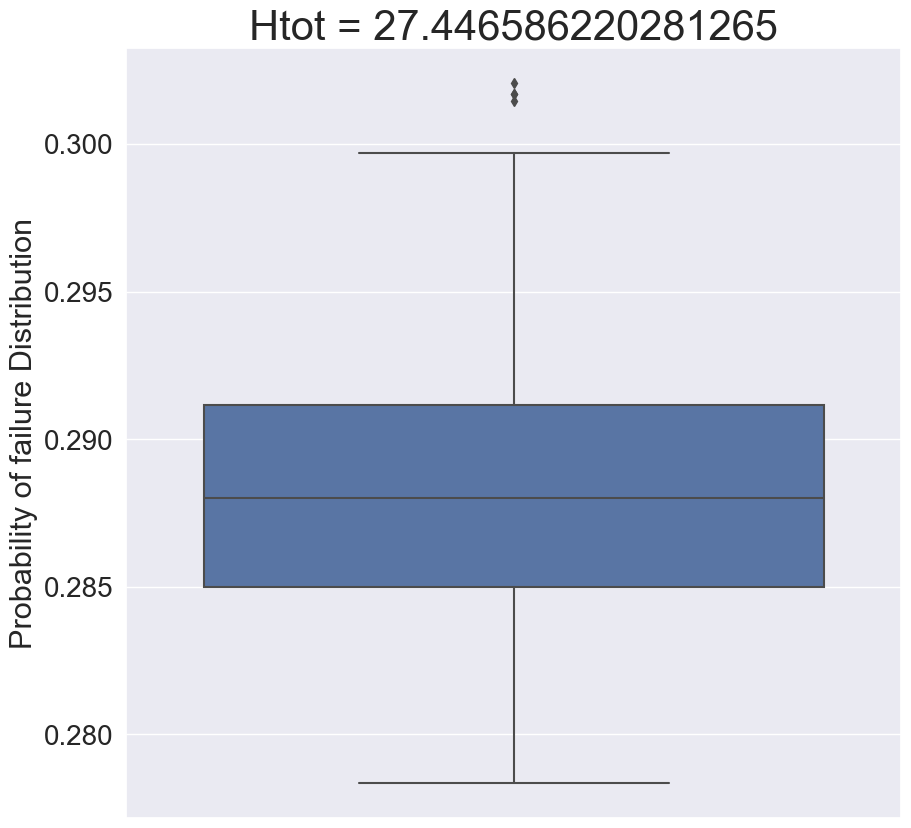

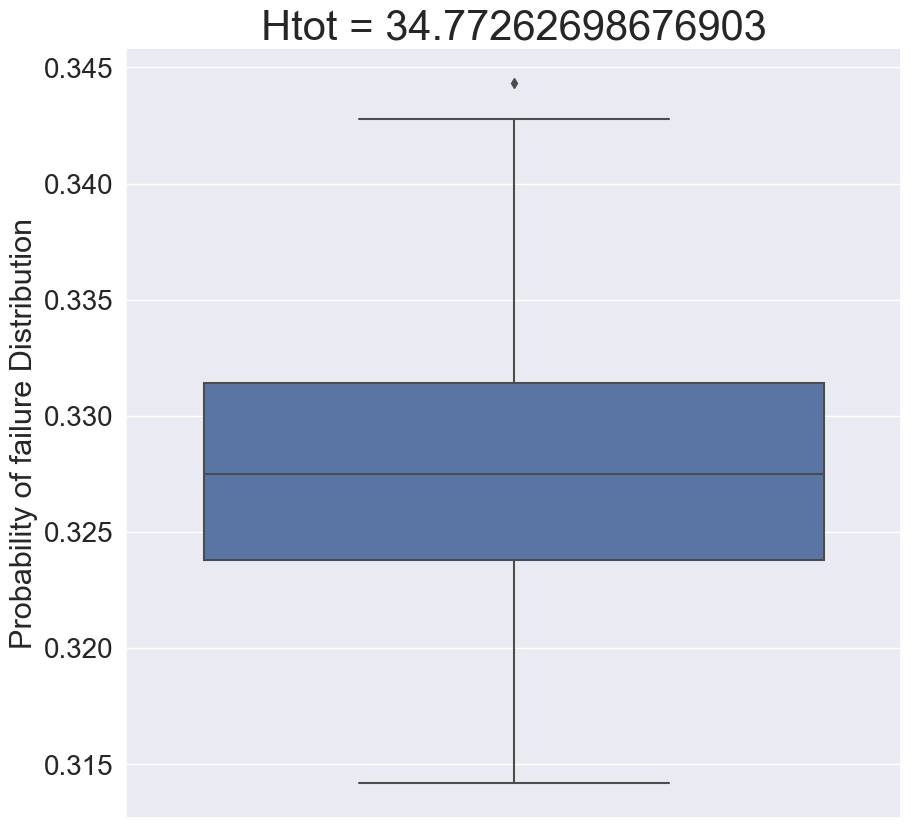

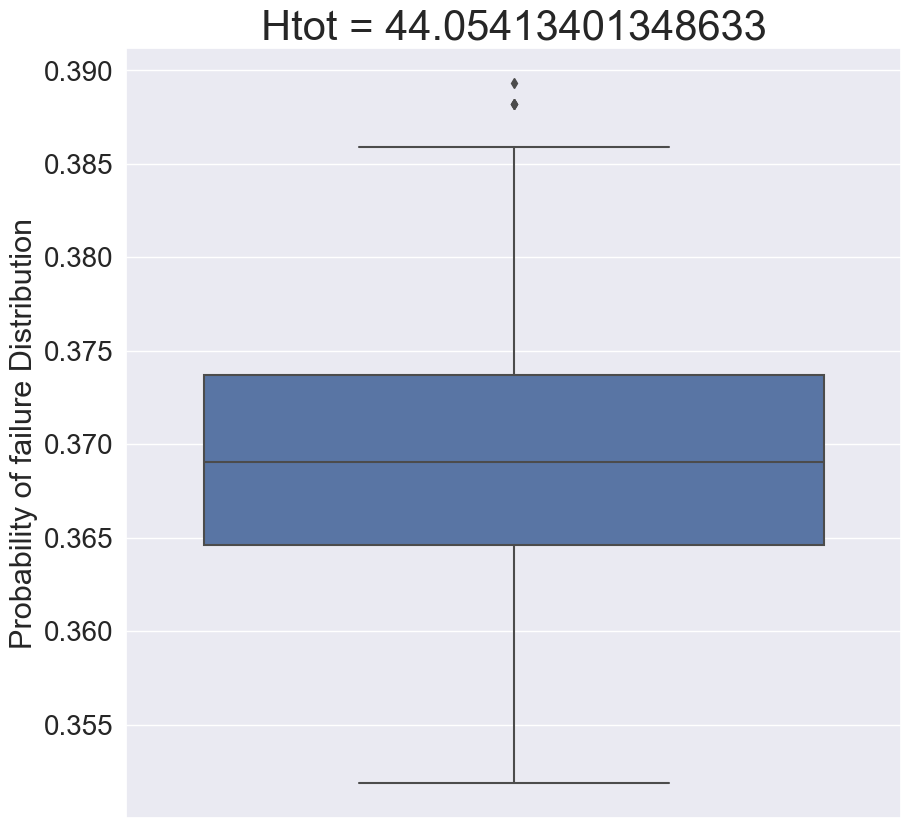

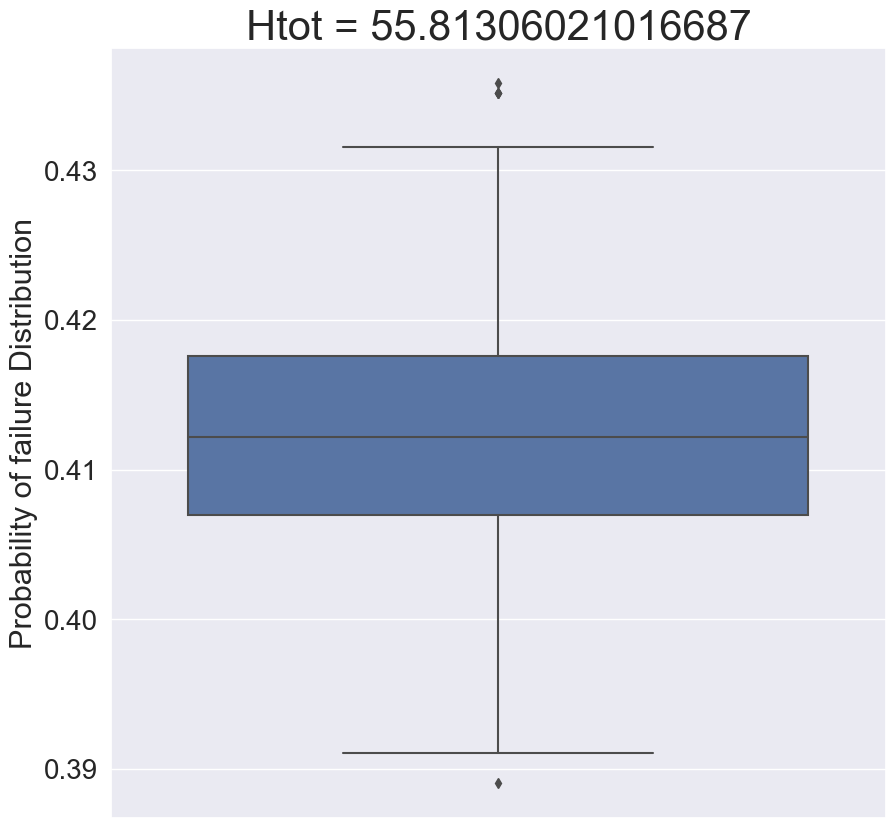

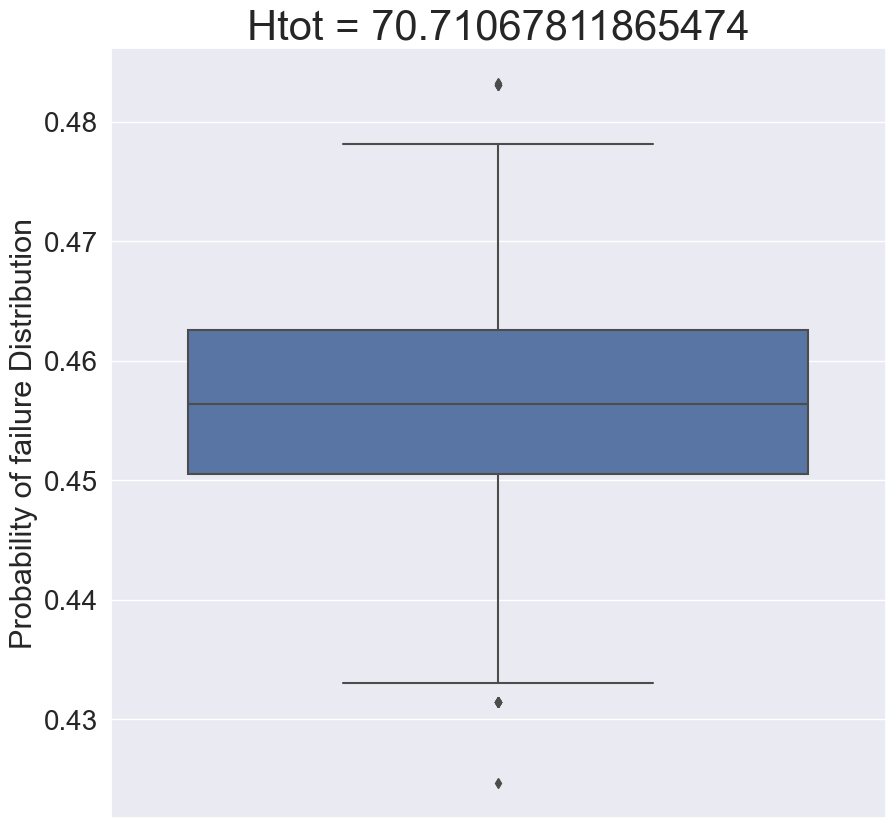

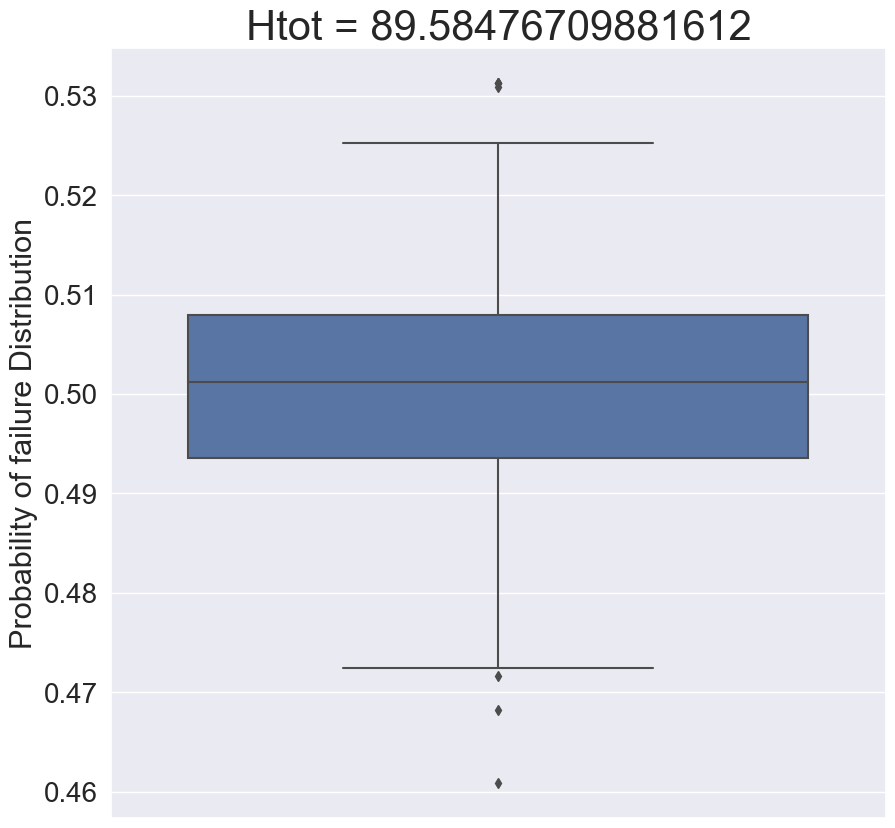

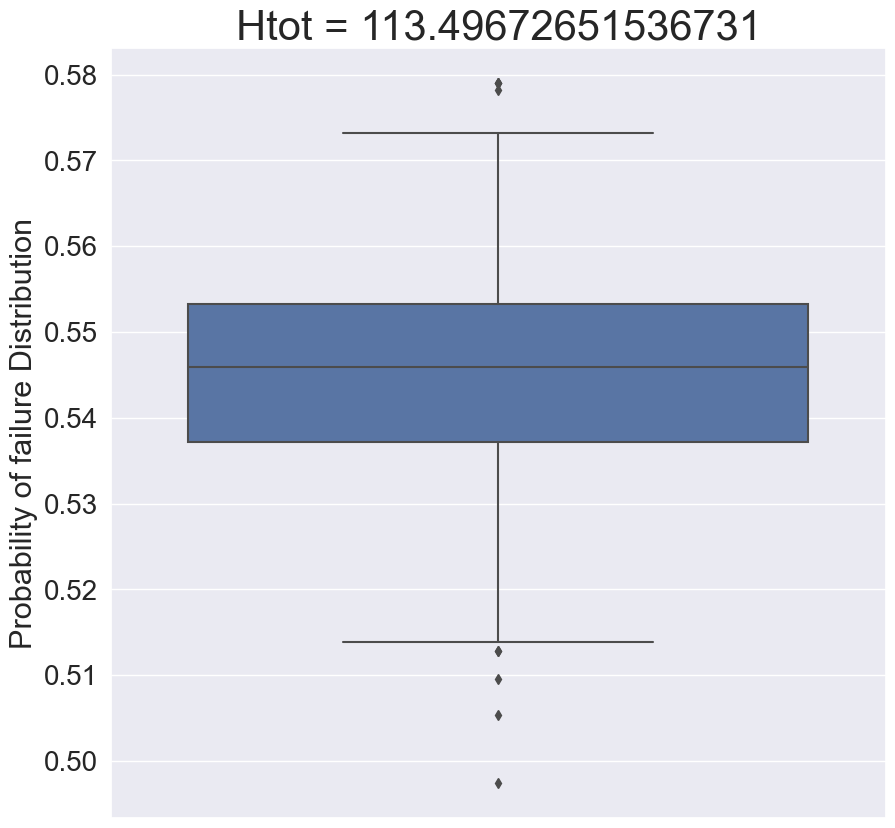

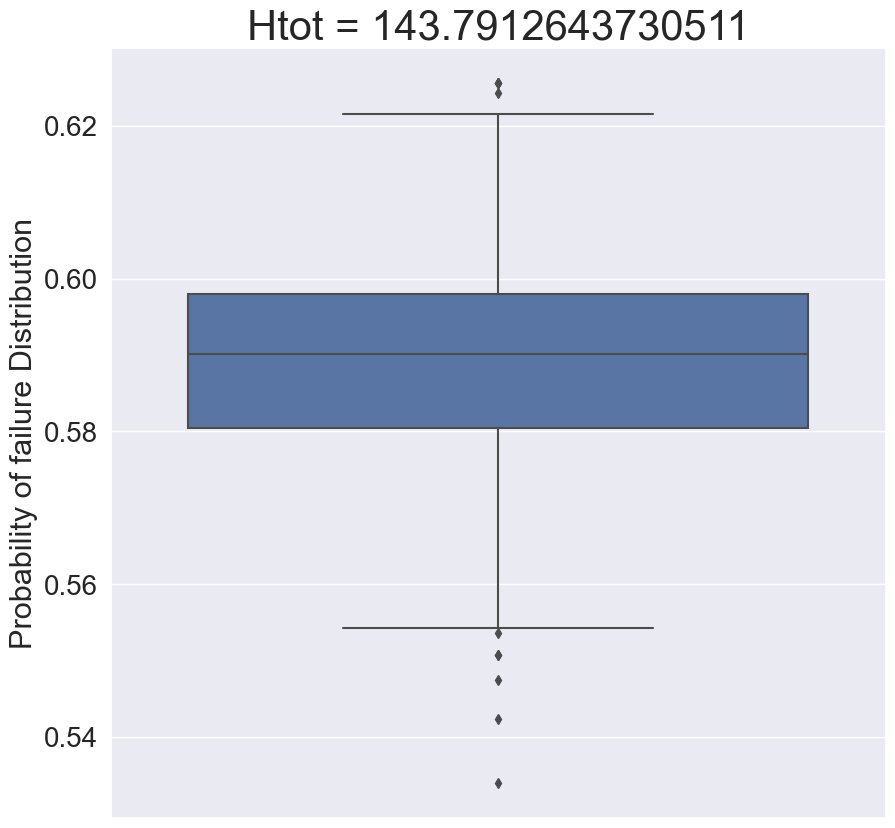

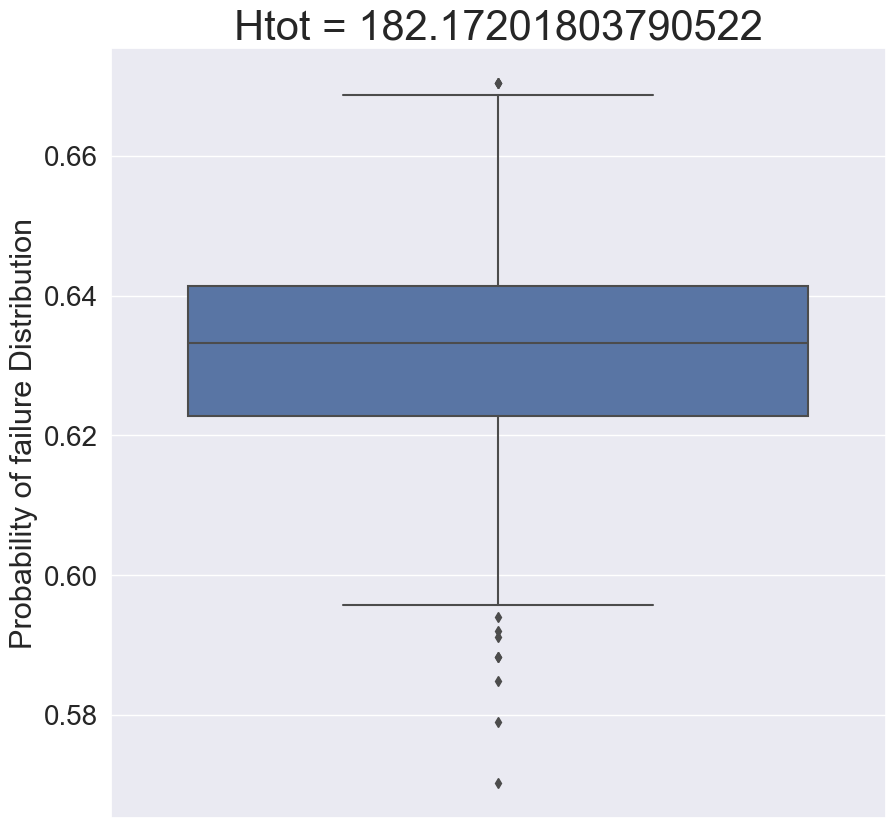

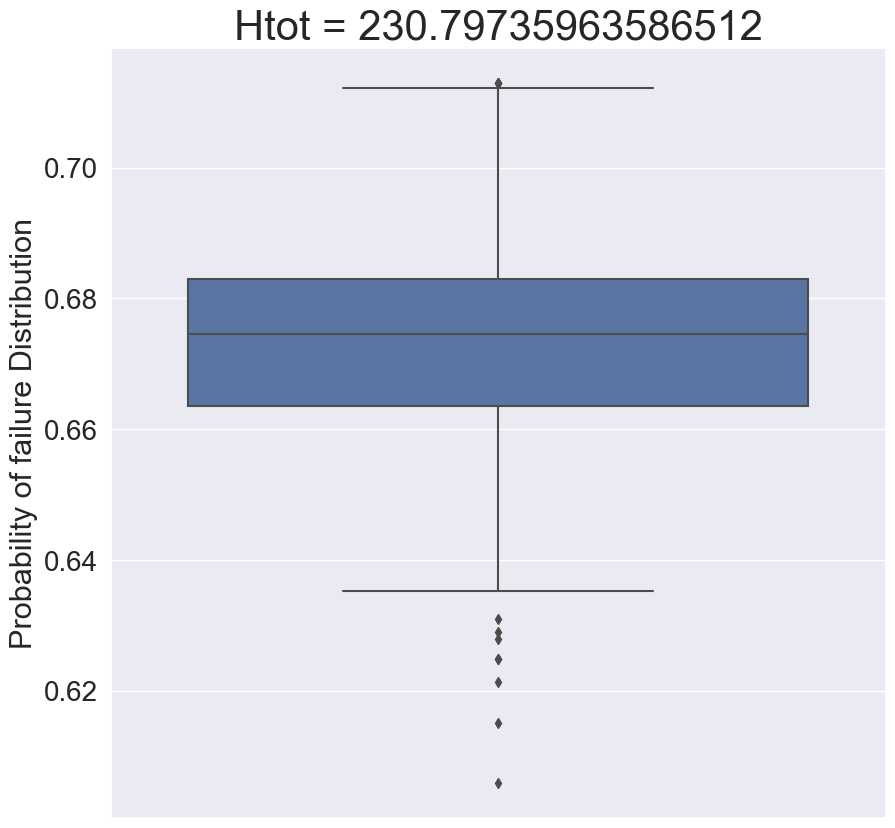

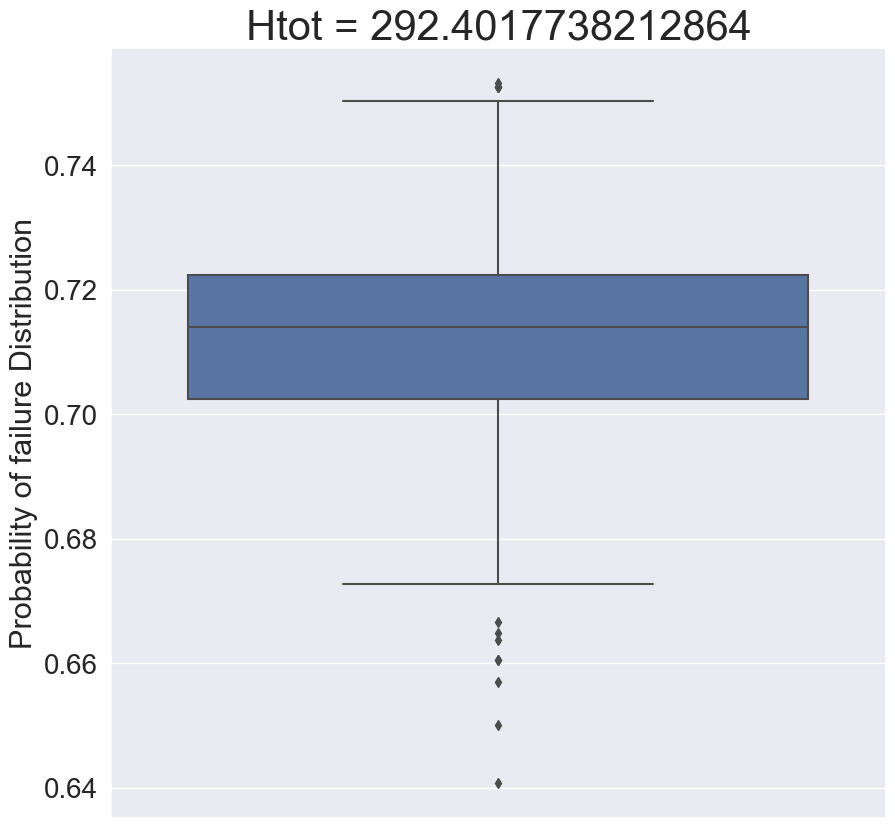

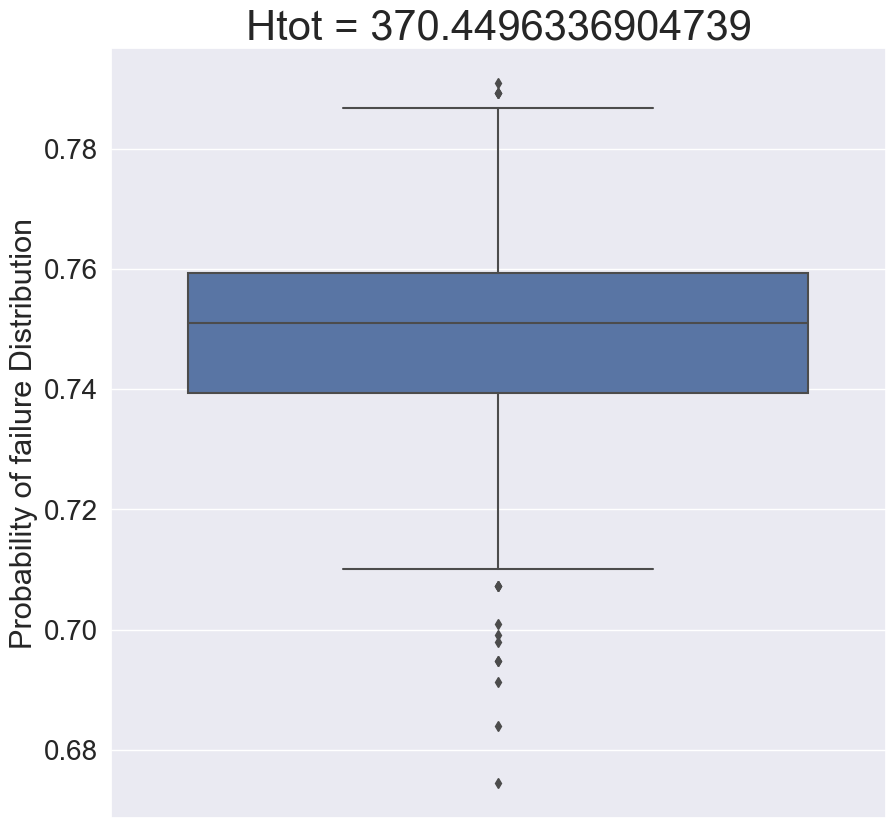

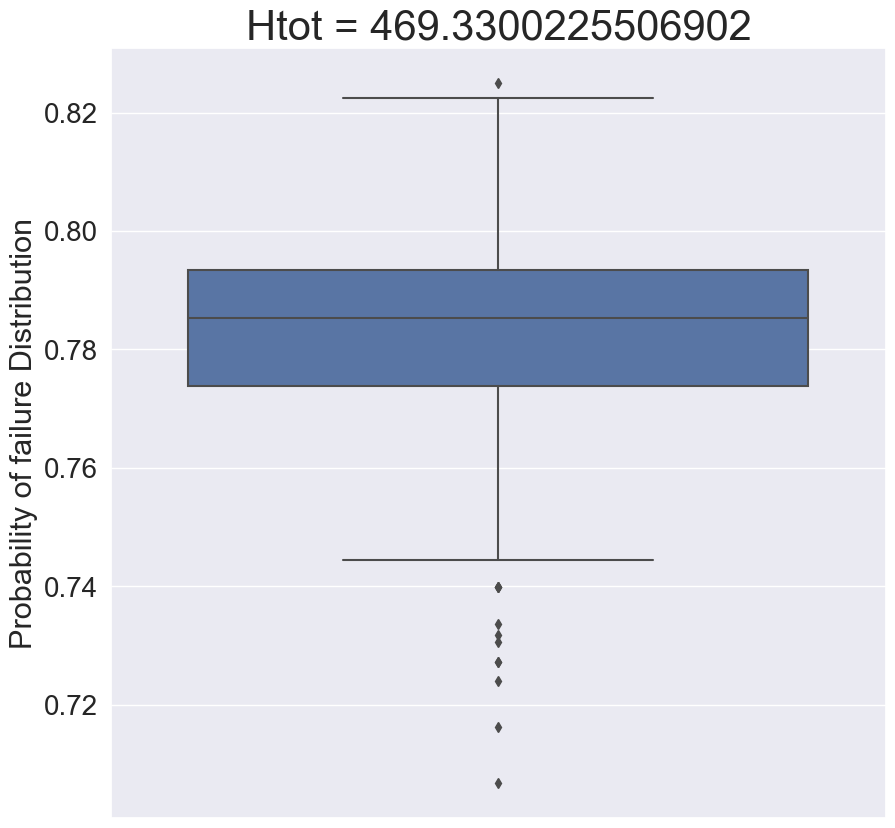

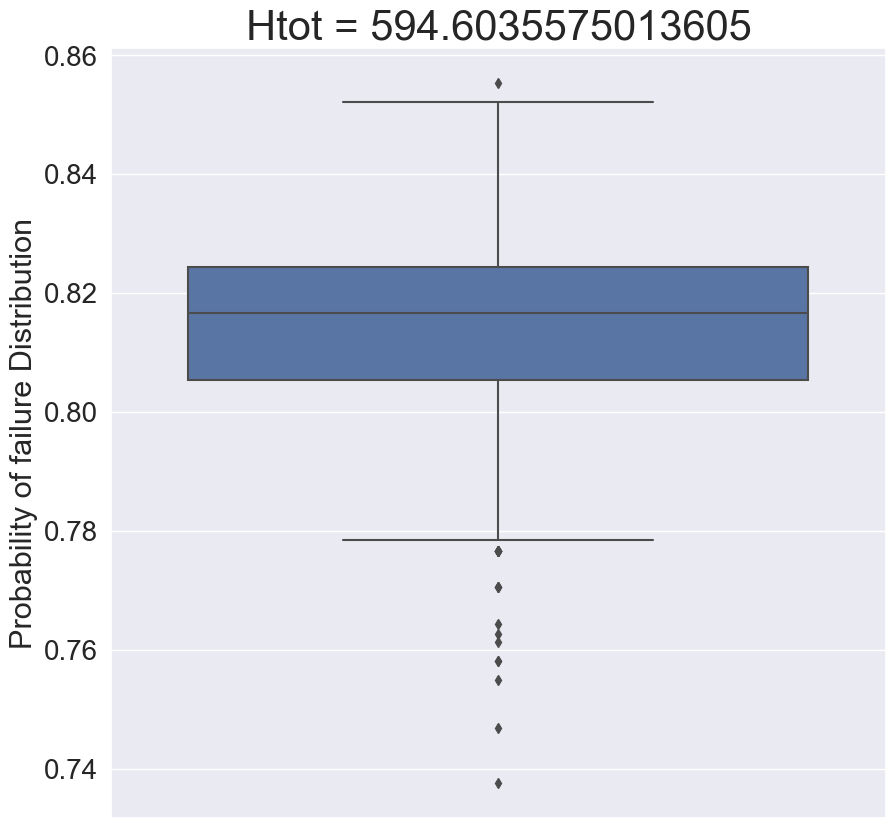

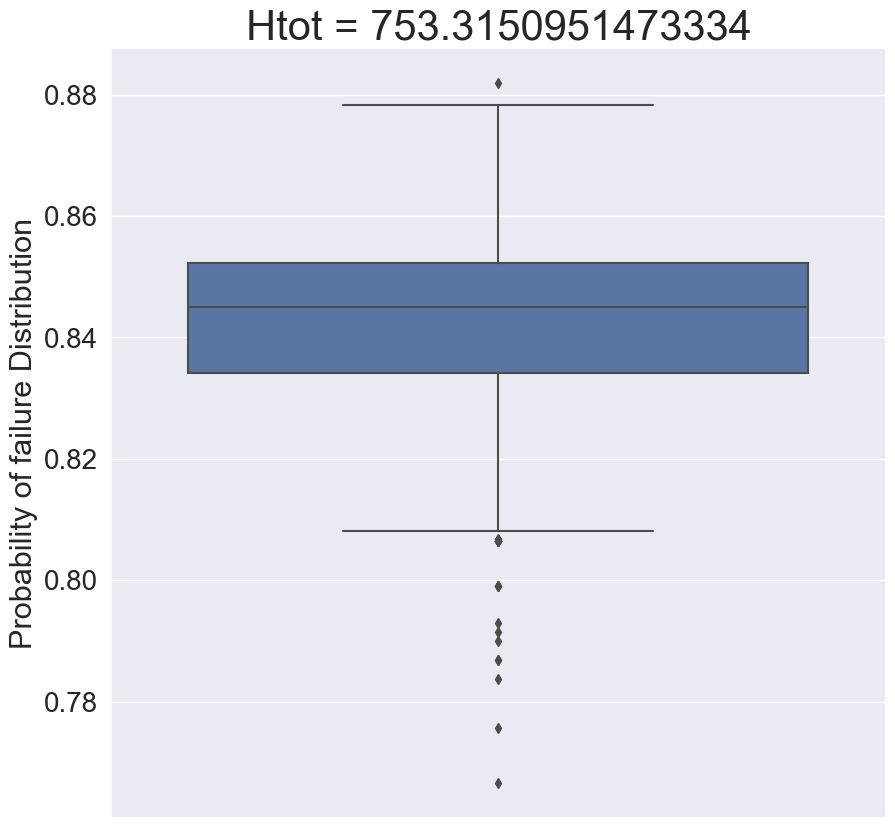

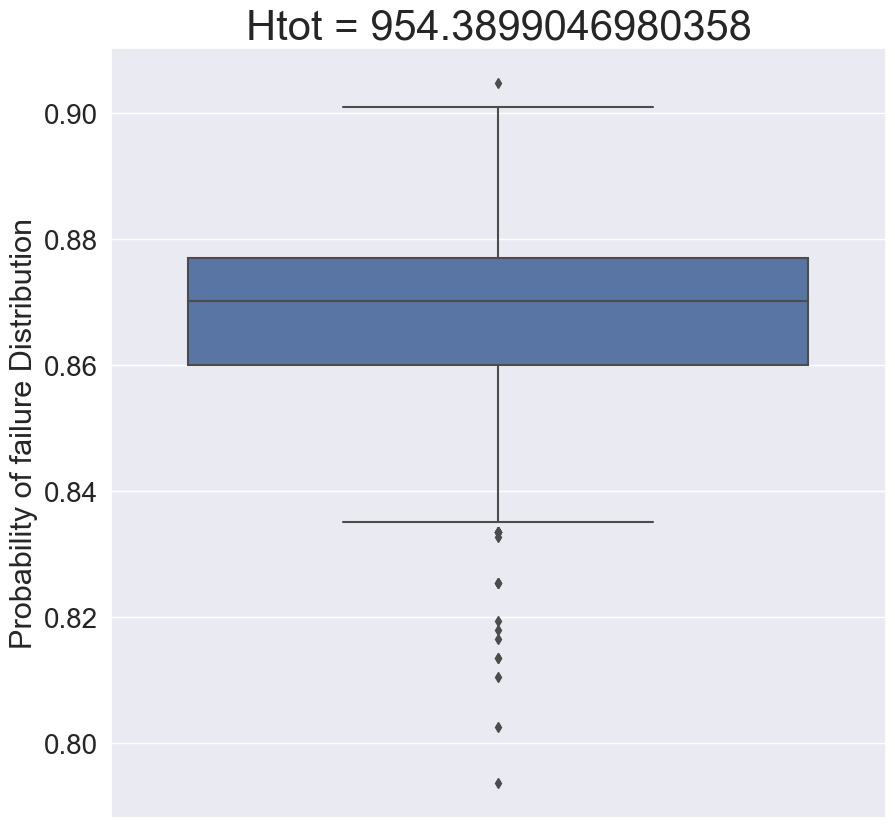

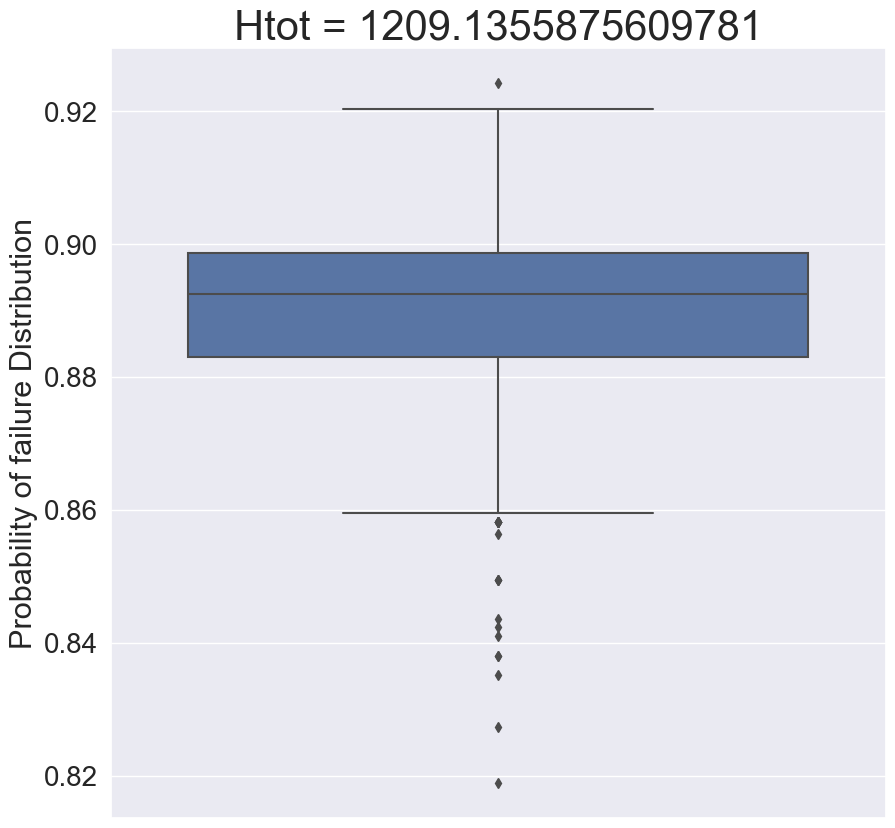

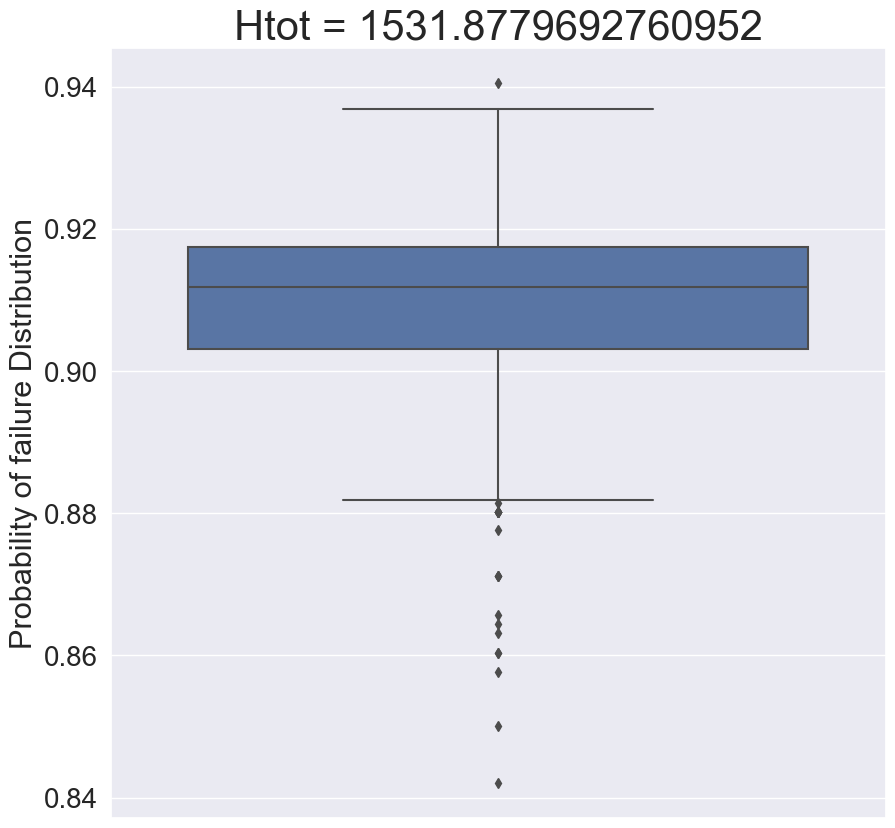

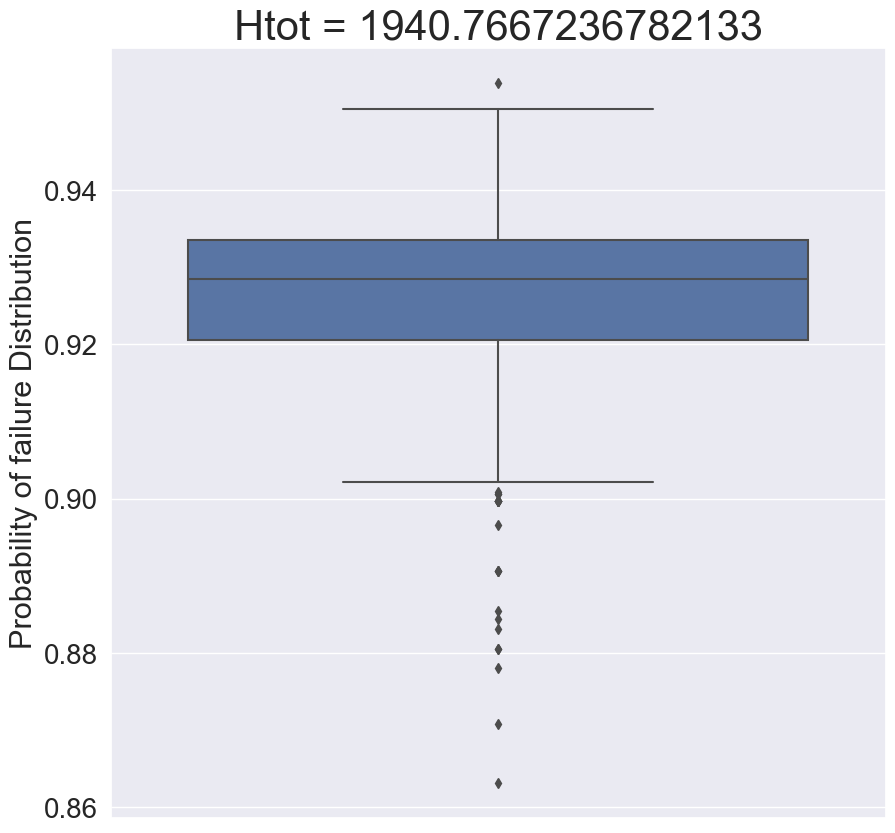

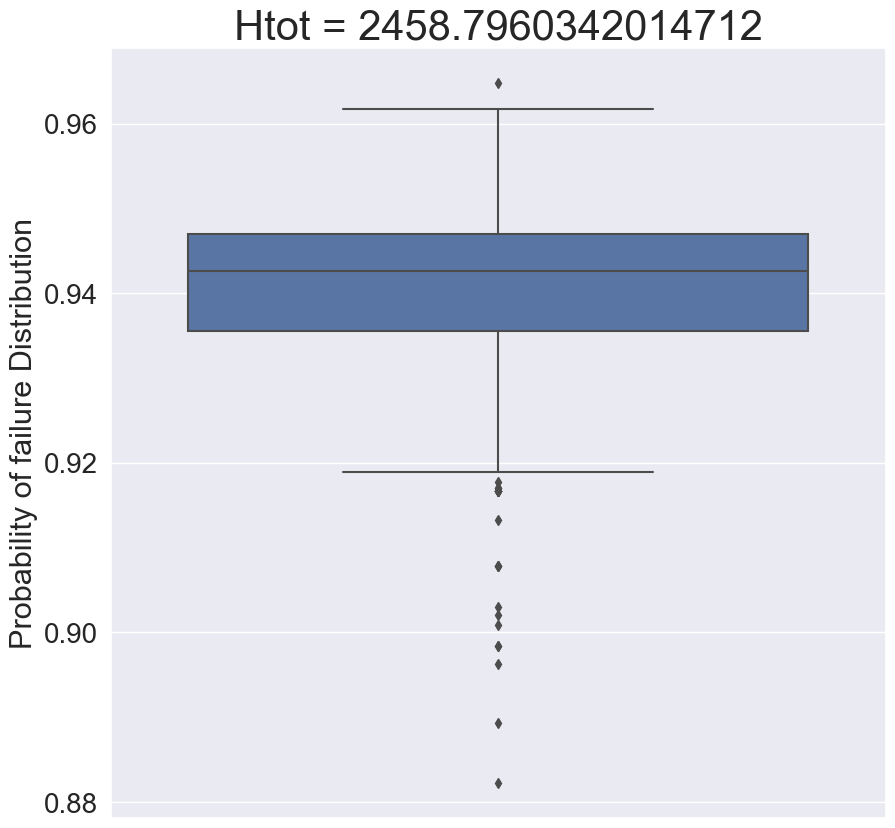

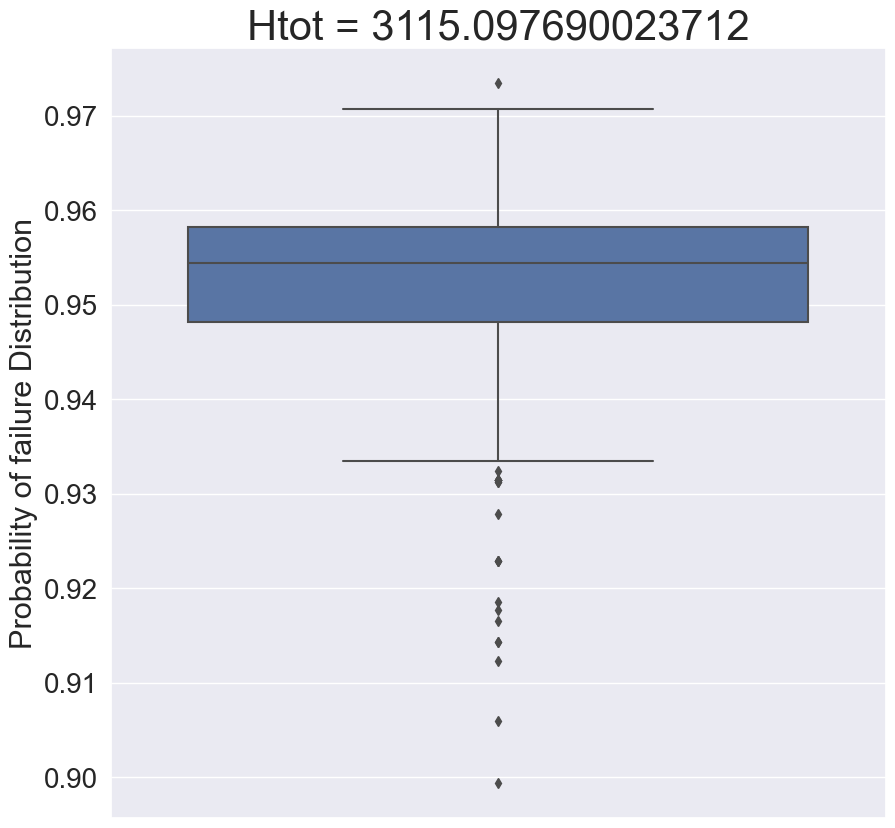

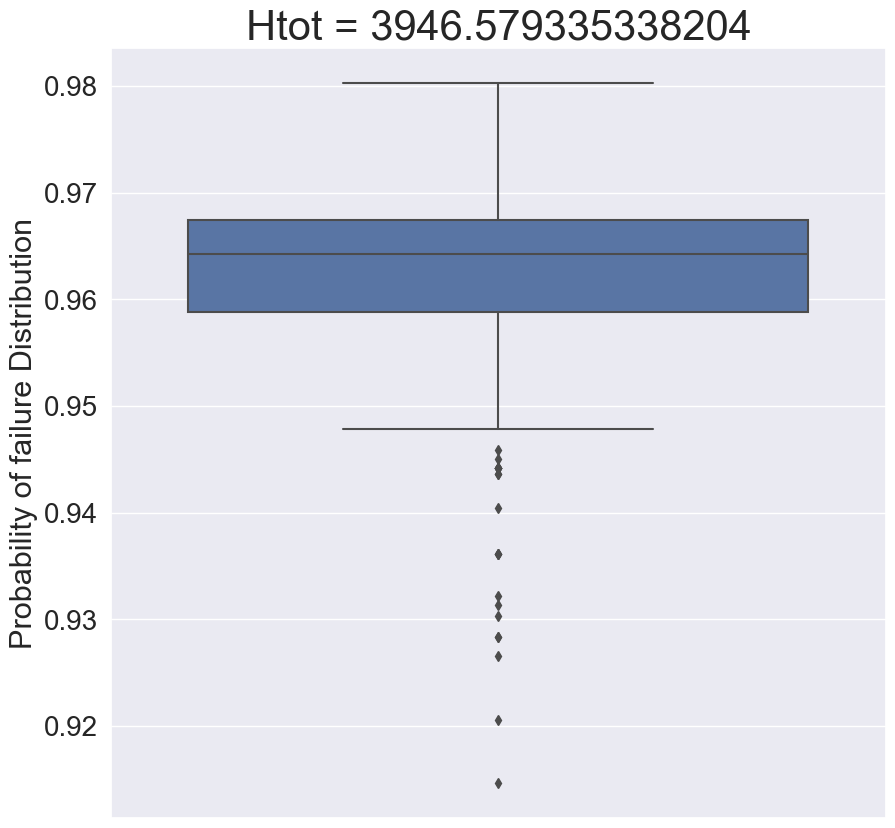

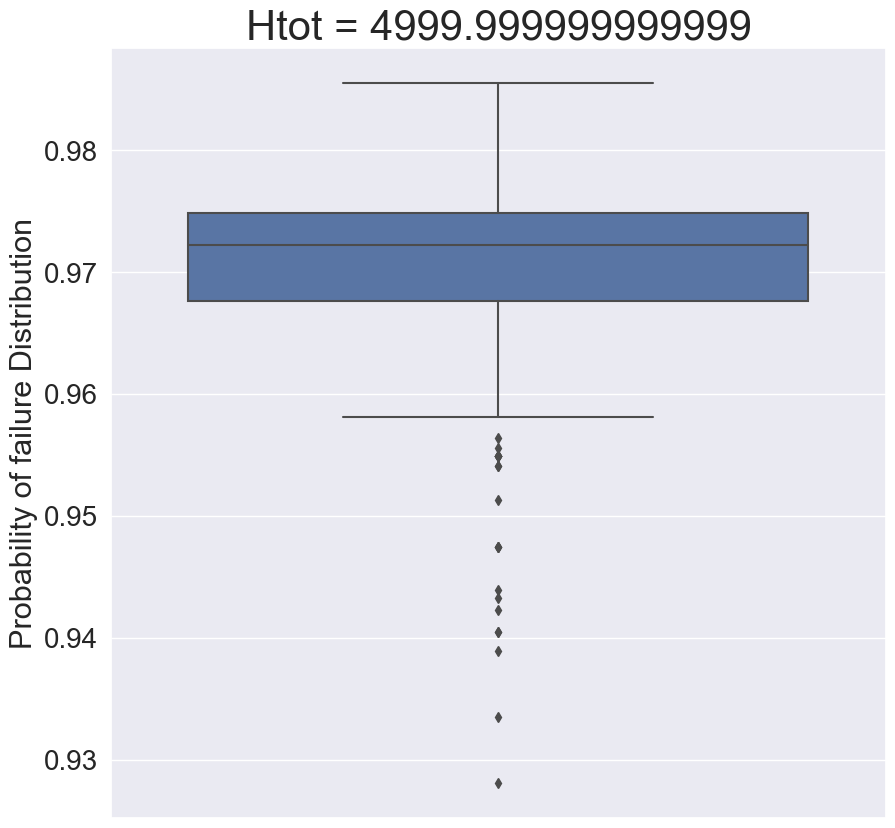

In [67]:
for iii in range(0,DS_1.shape[0]):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax = sns.boxplot(y=DS_1.iloc[iii,:], dodge=True) #x=df.iloc[iii,5]
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    plt.ylabel('Probability of failure Distribution', fontsize=22)
    plt.title('Htot = '+str(DS_1.index[iii]), fontsize=30) #etting the title as the location where event occurred

Another way to visualize the same information as above (bulges represent PDF)

/Users/Alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


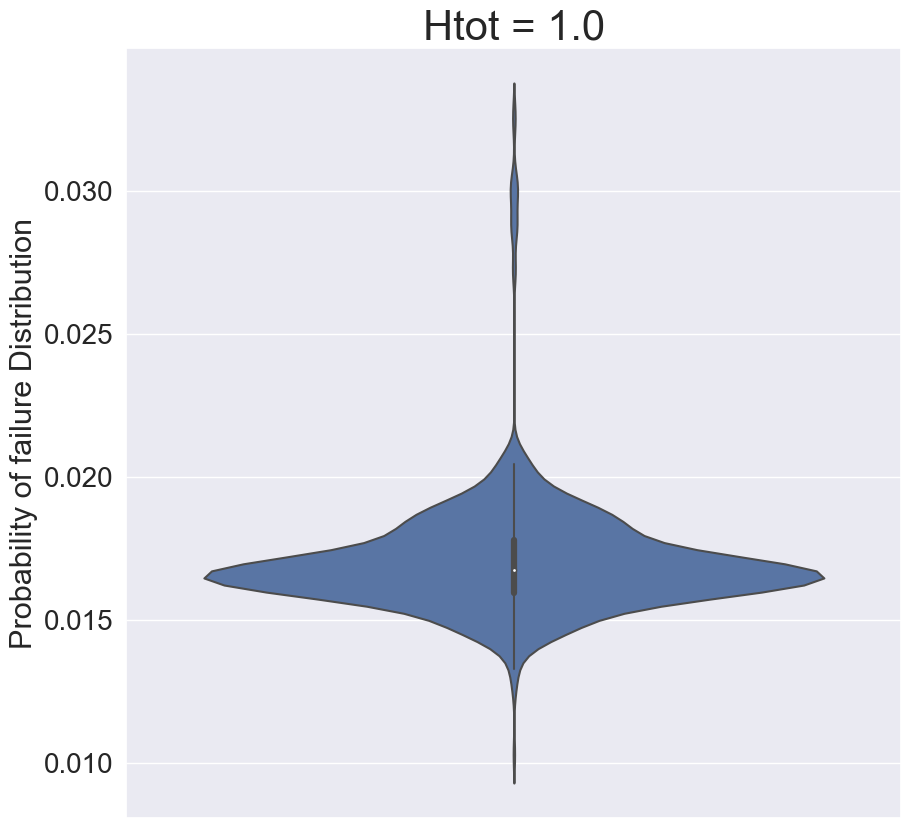

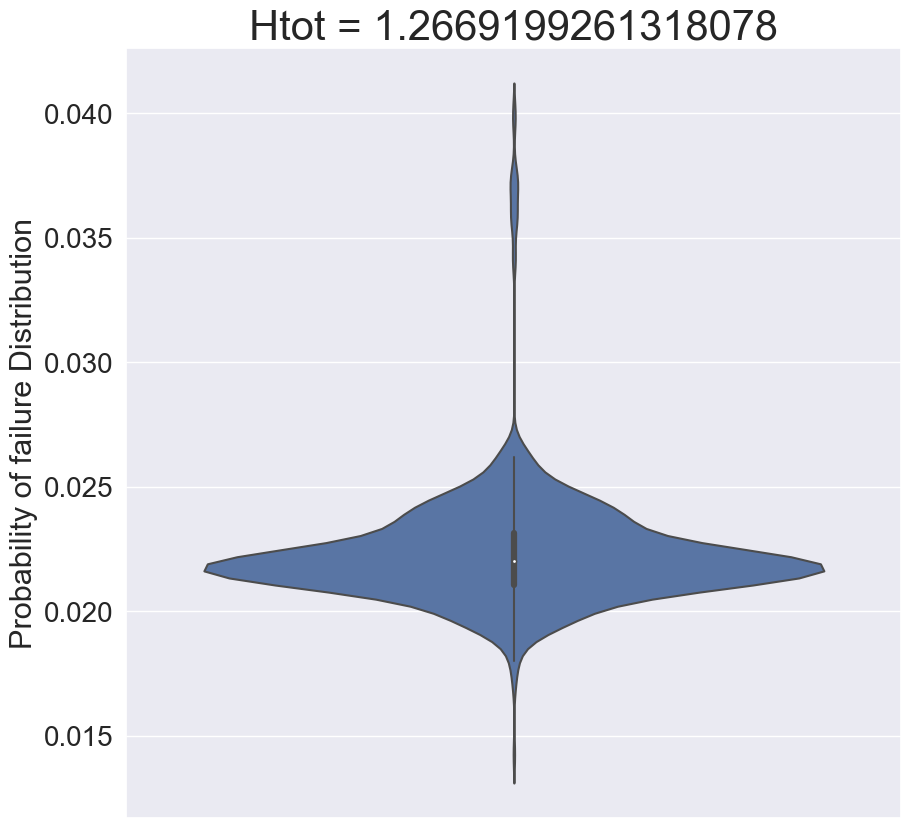

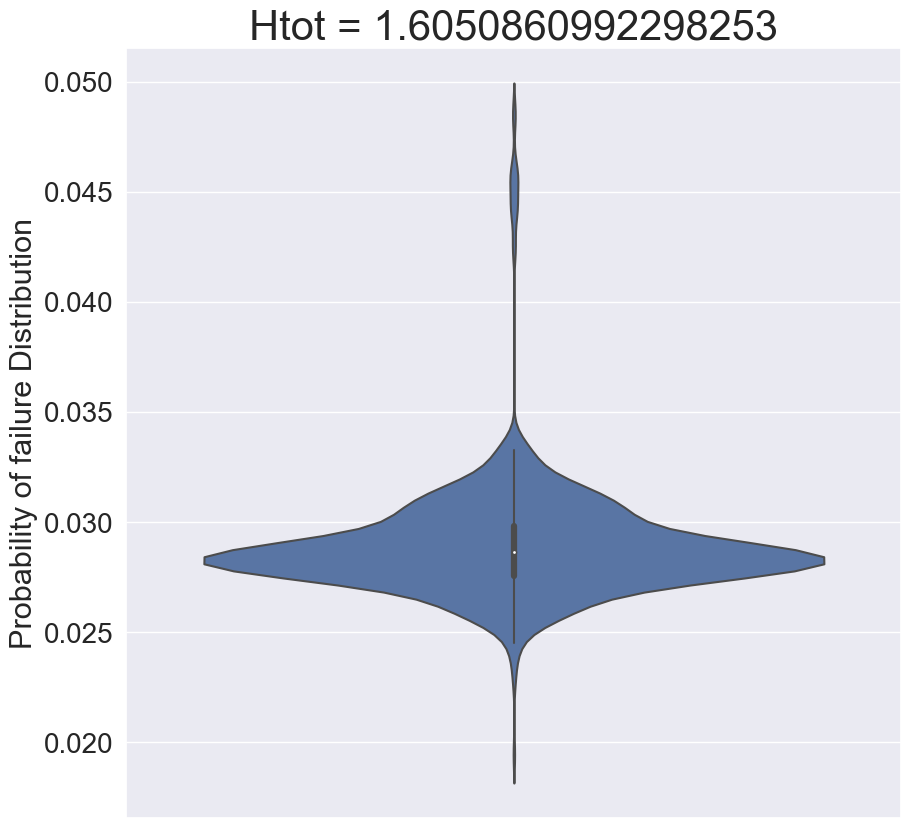

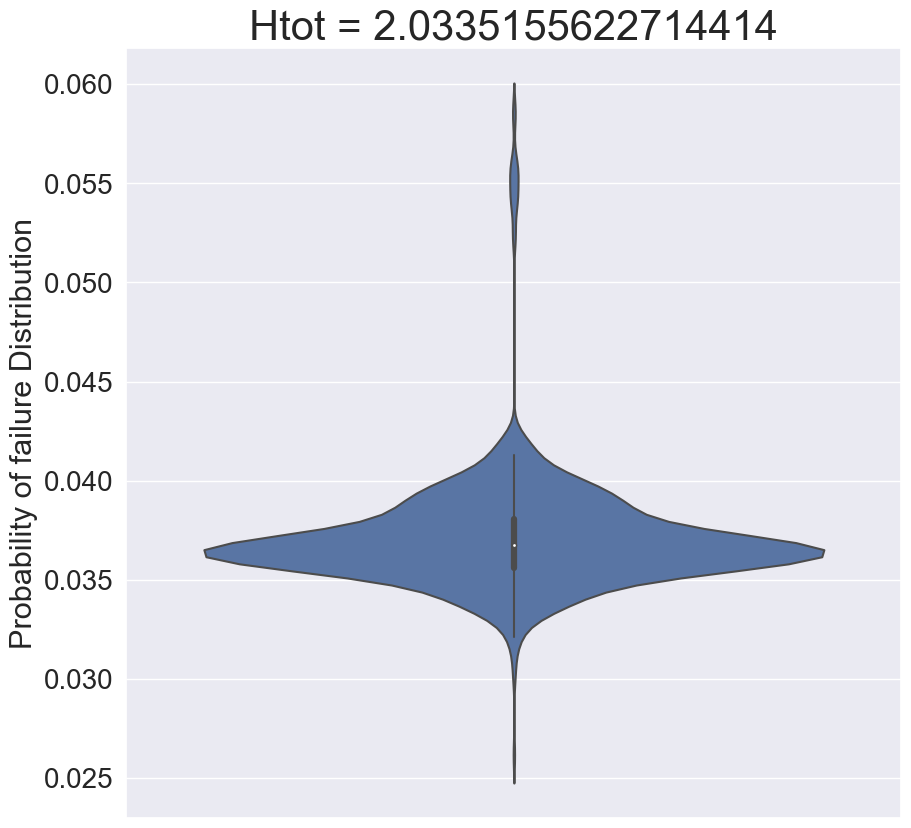

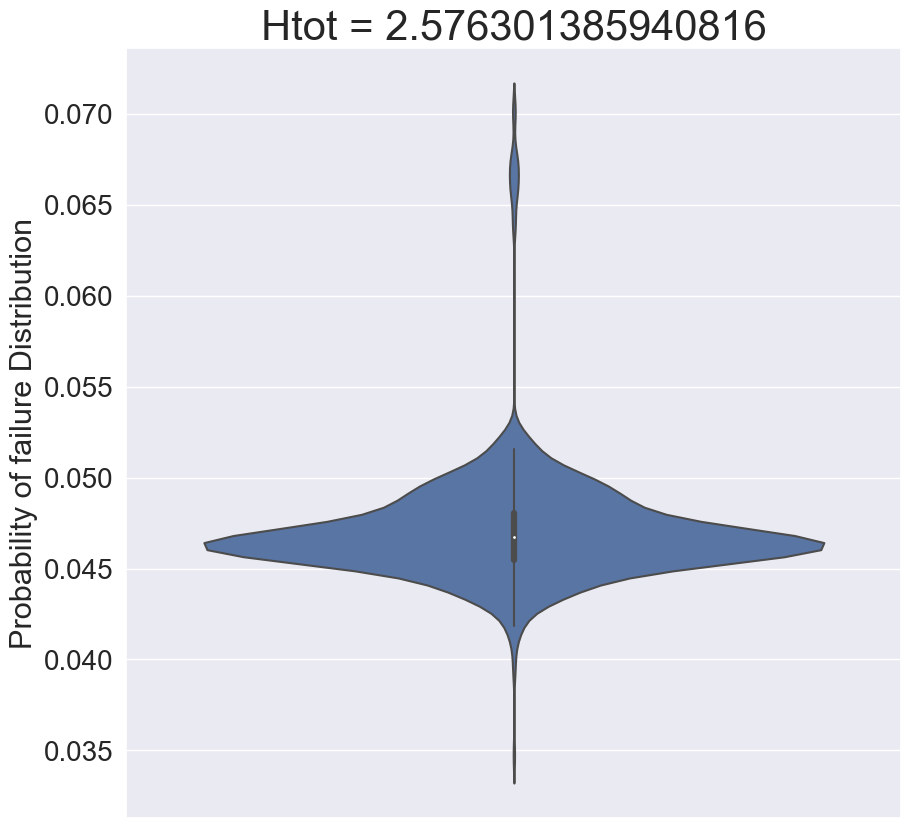

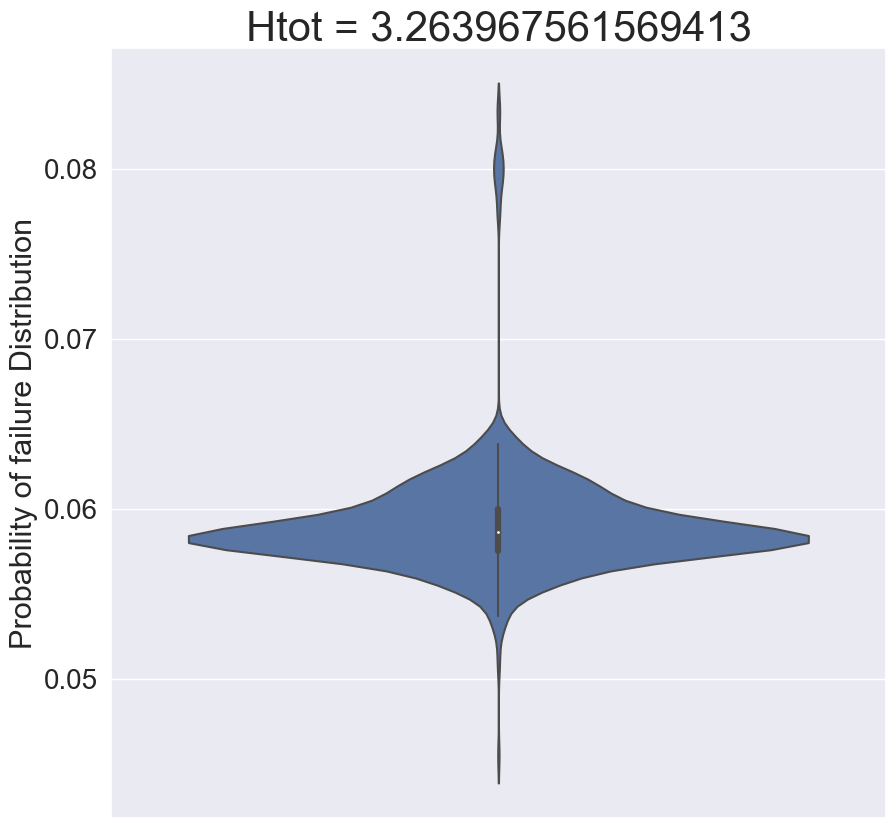

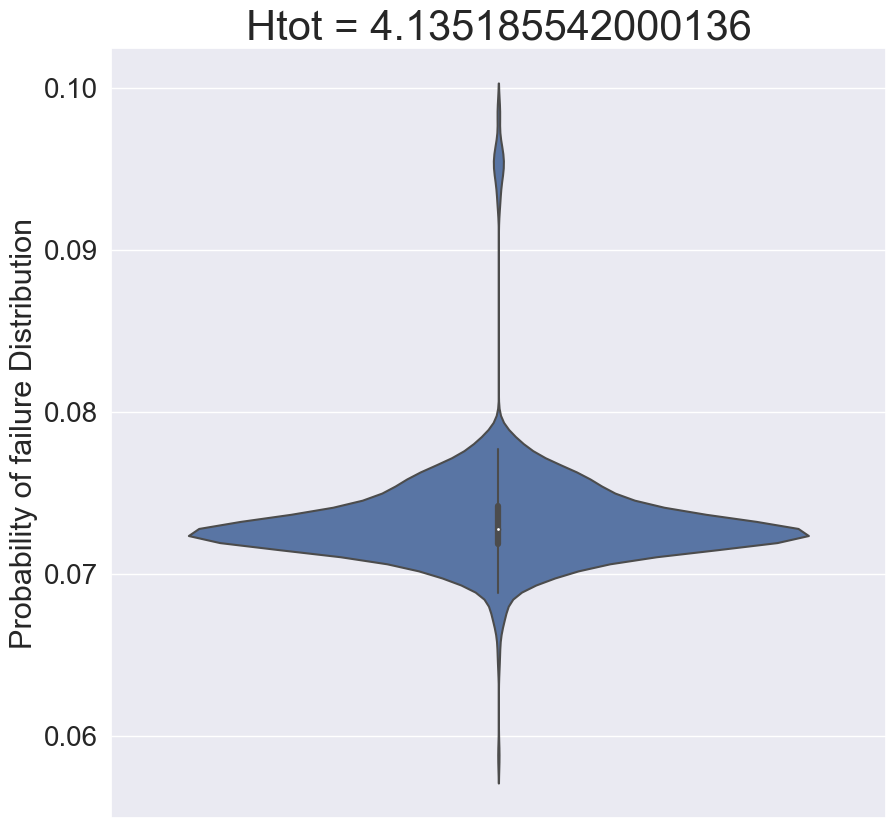

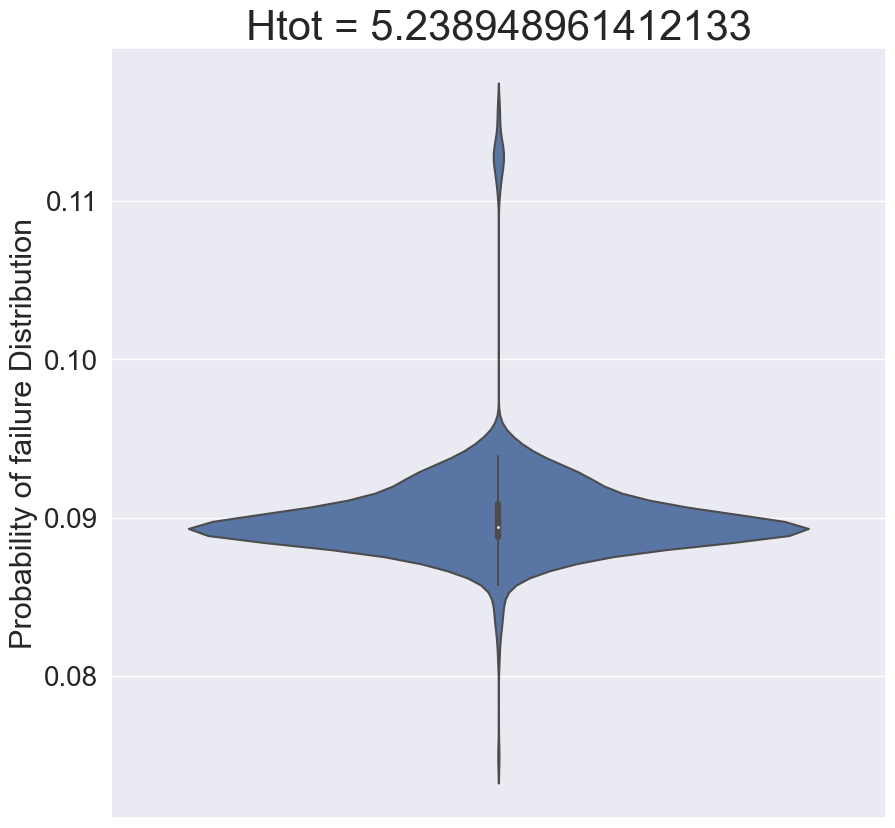

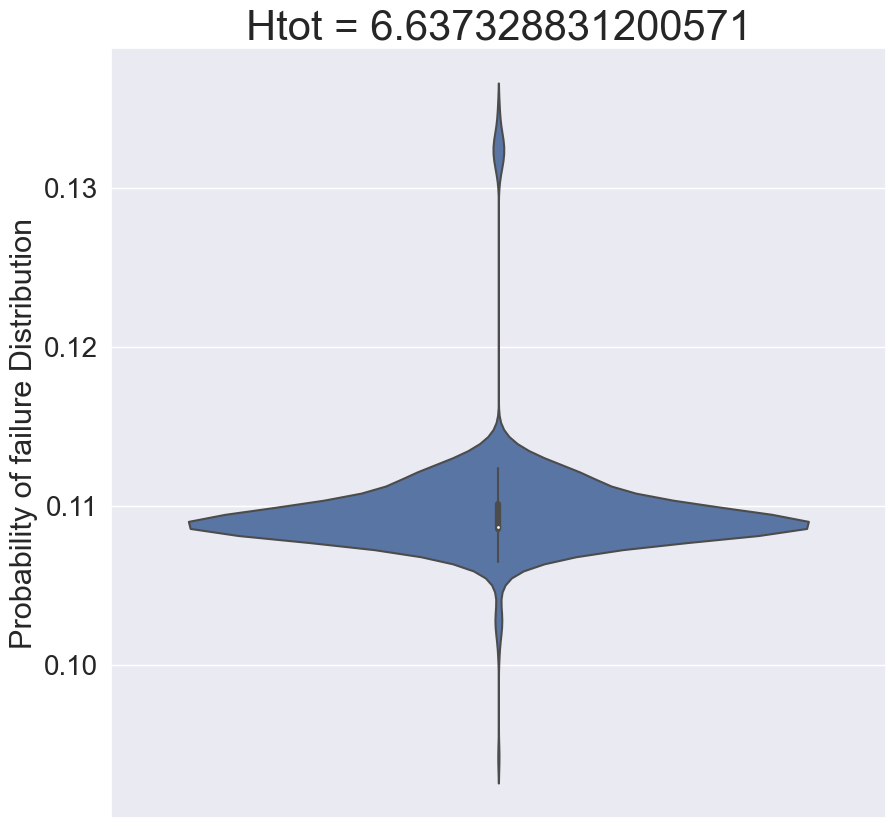

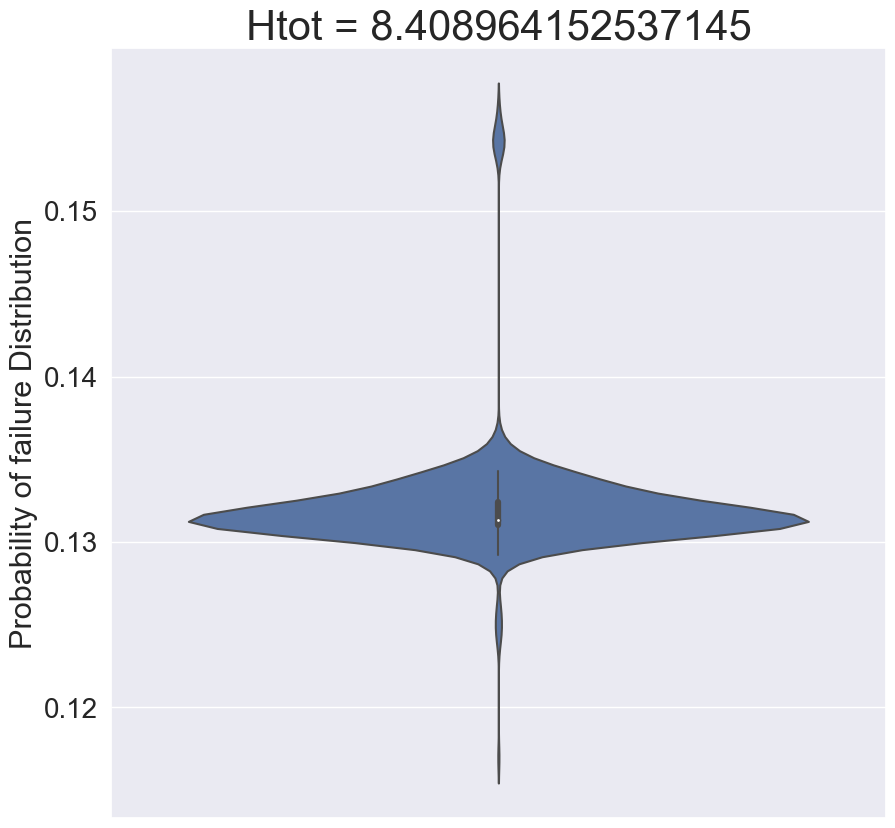

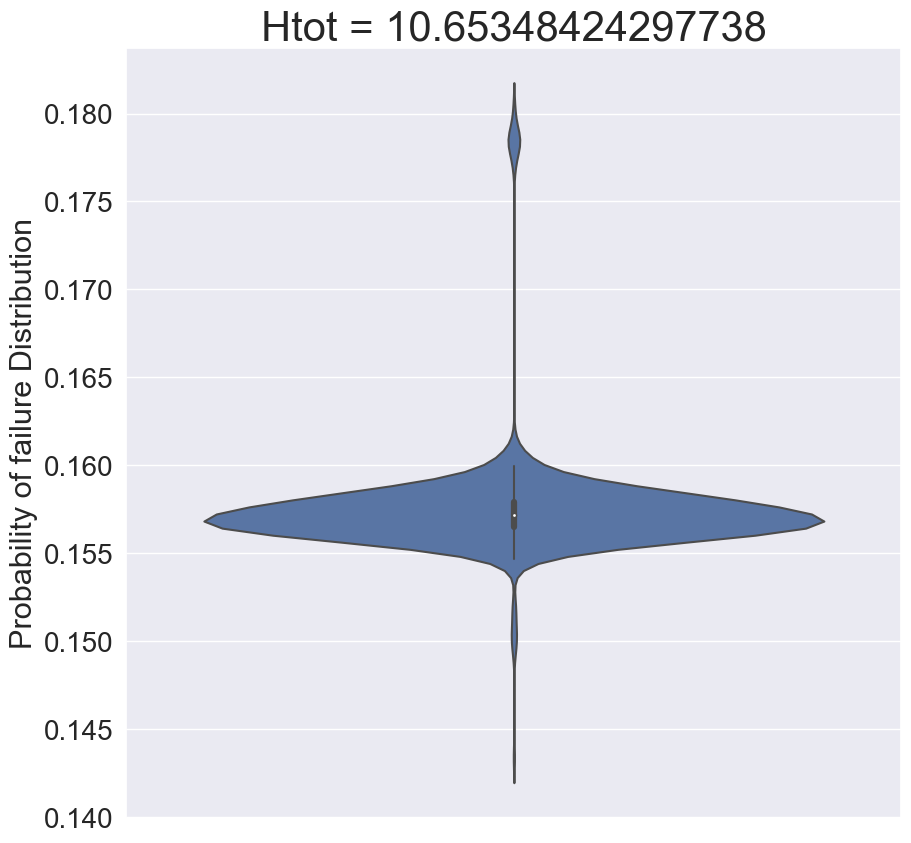

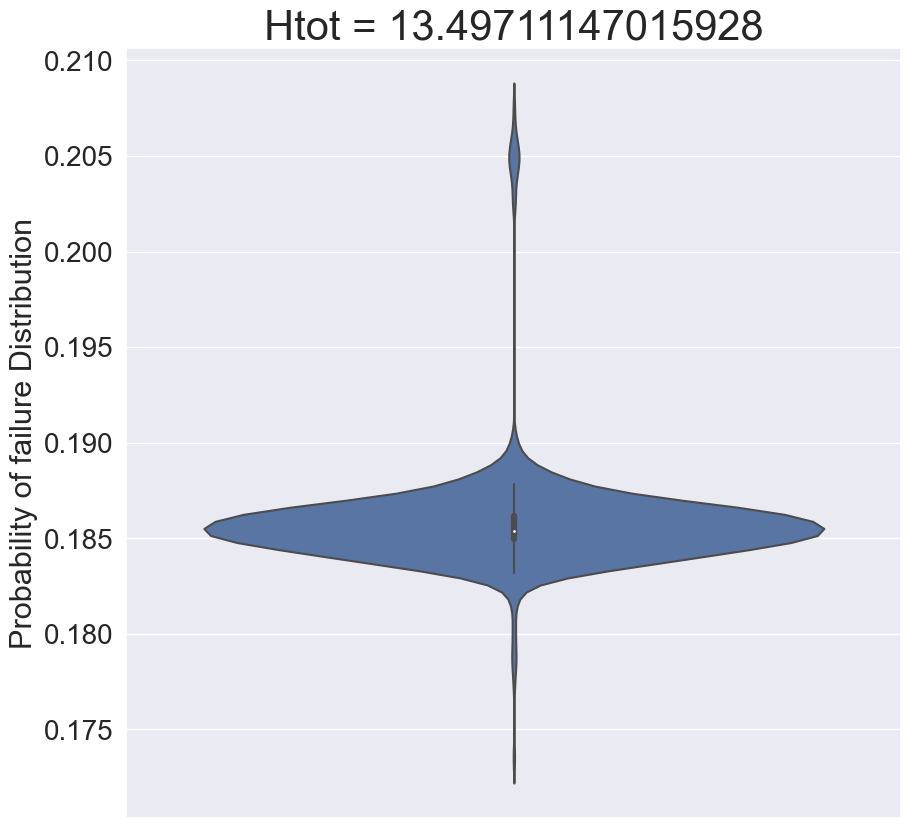

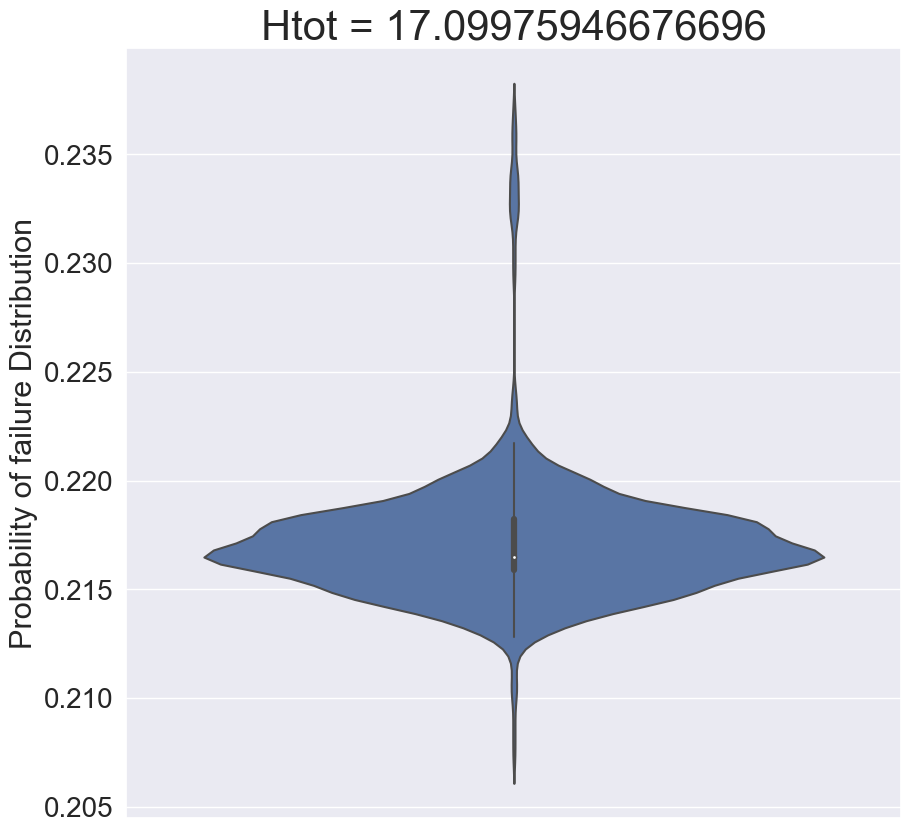

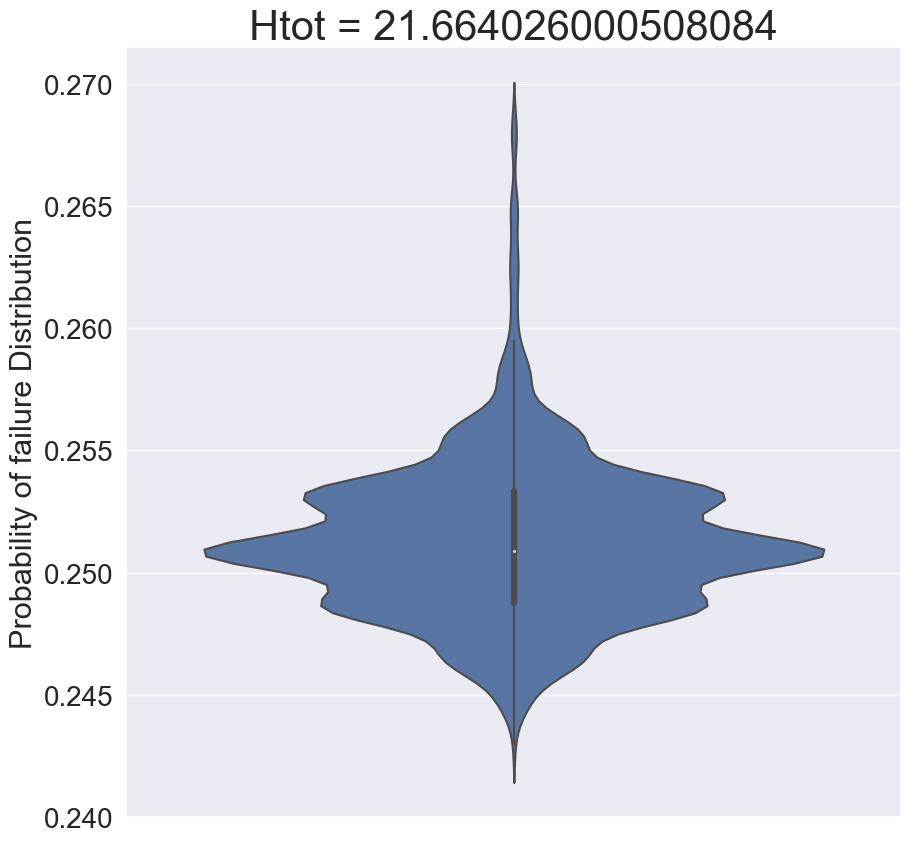

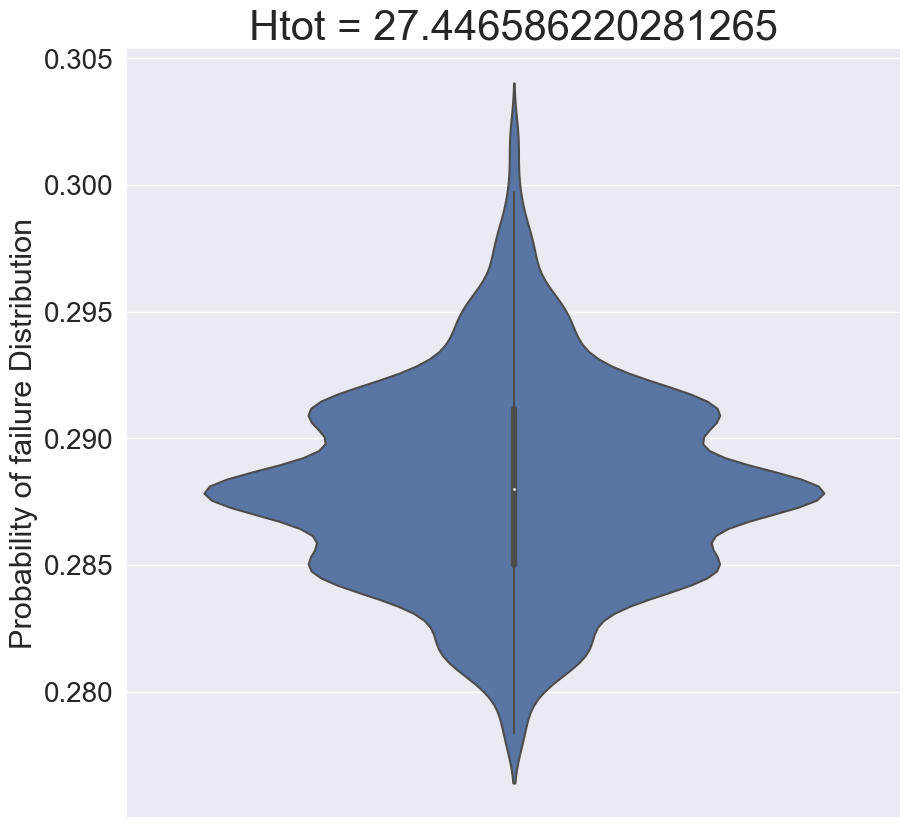

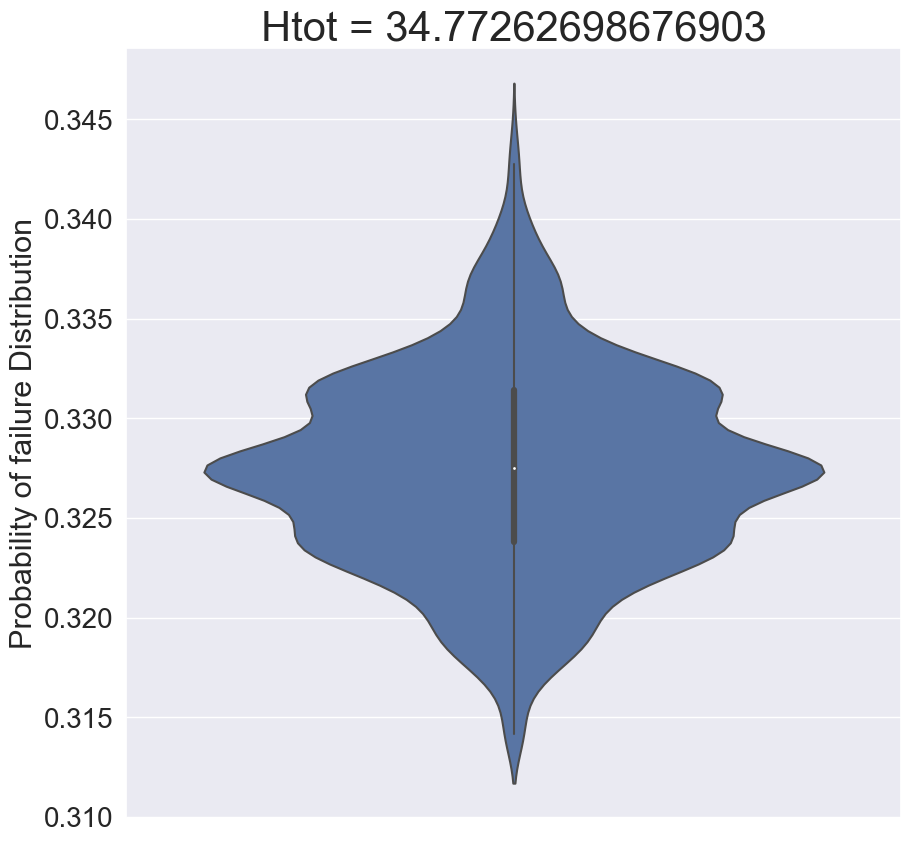

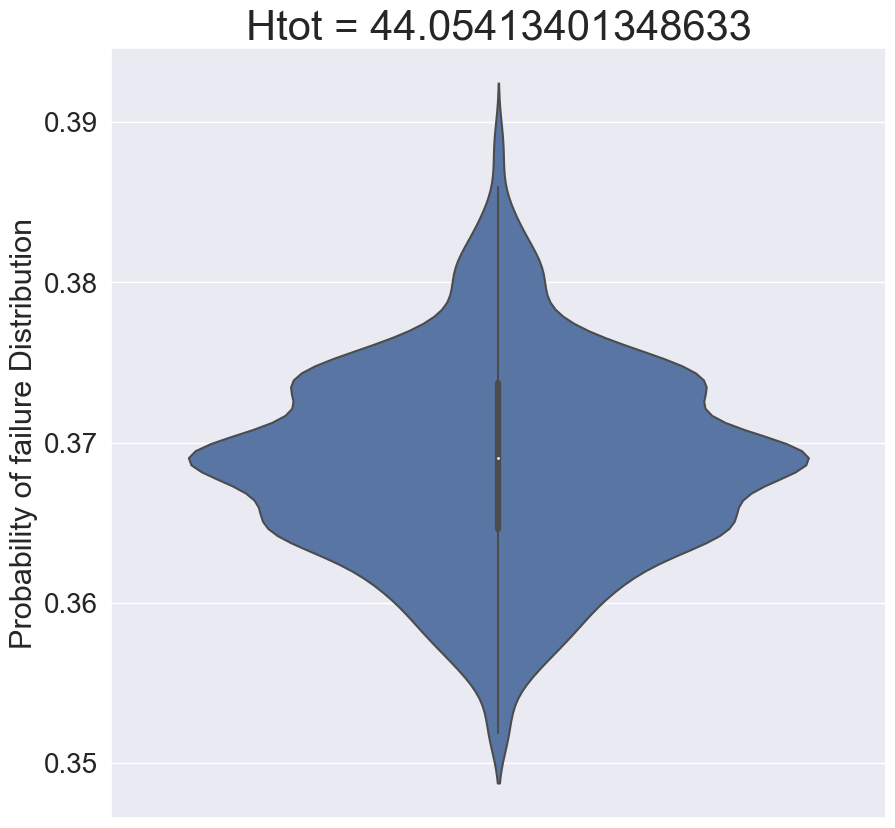

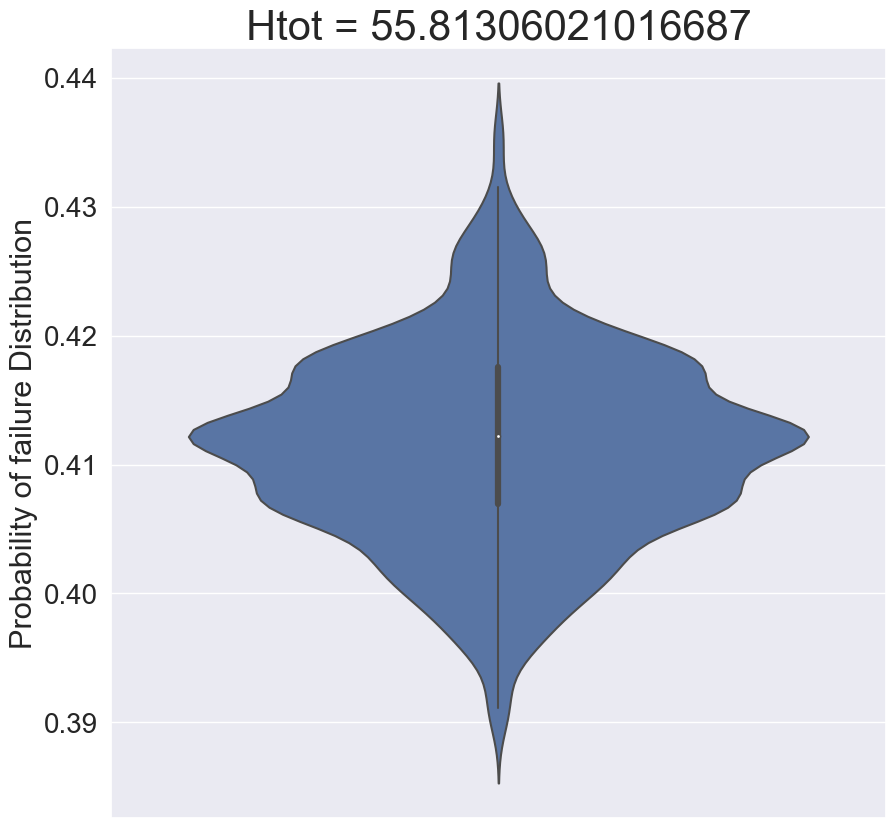

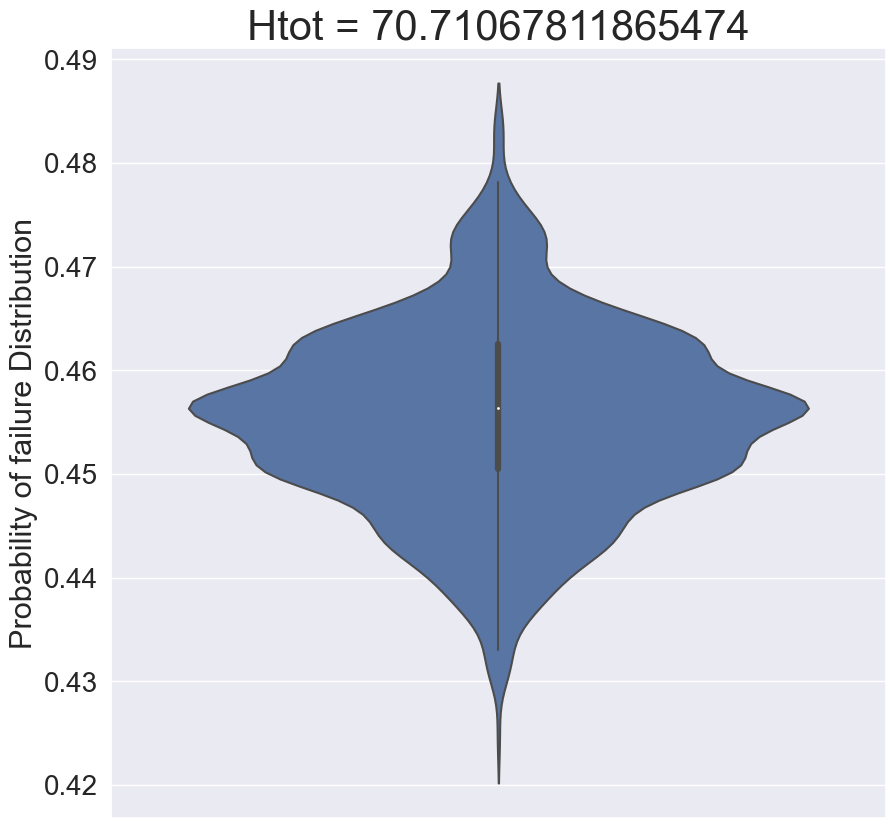

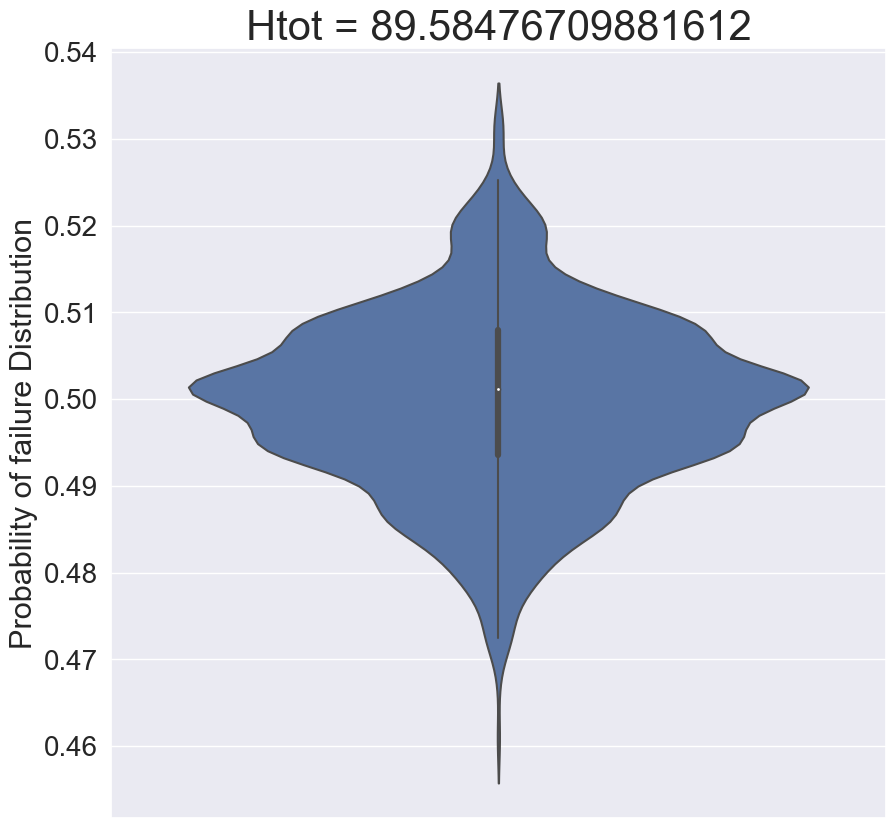

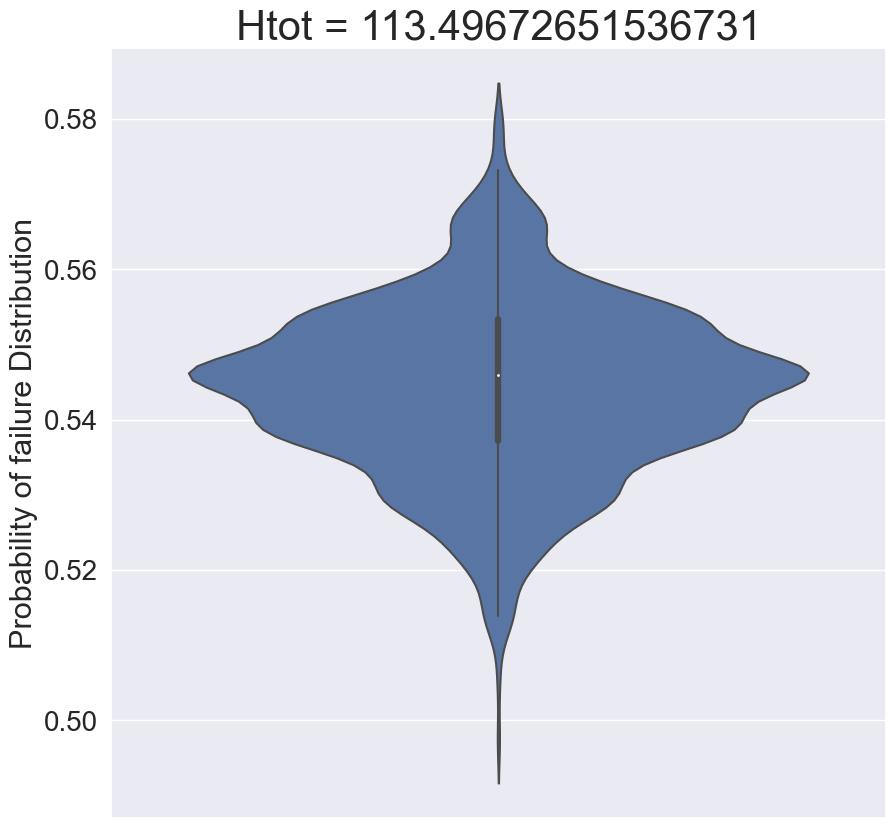

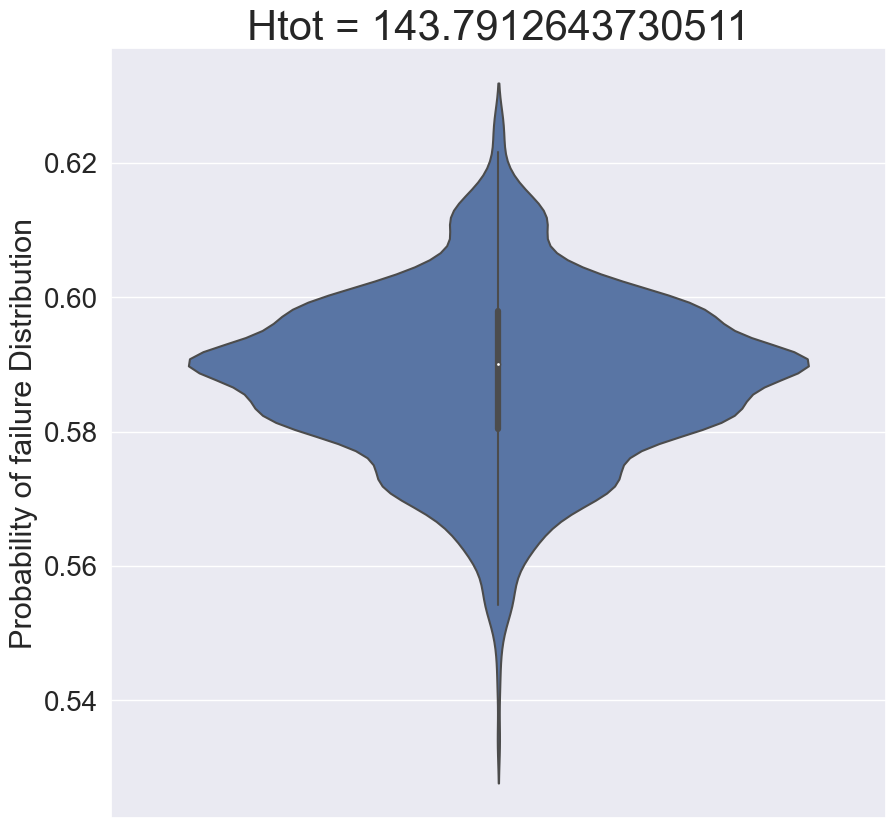

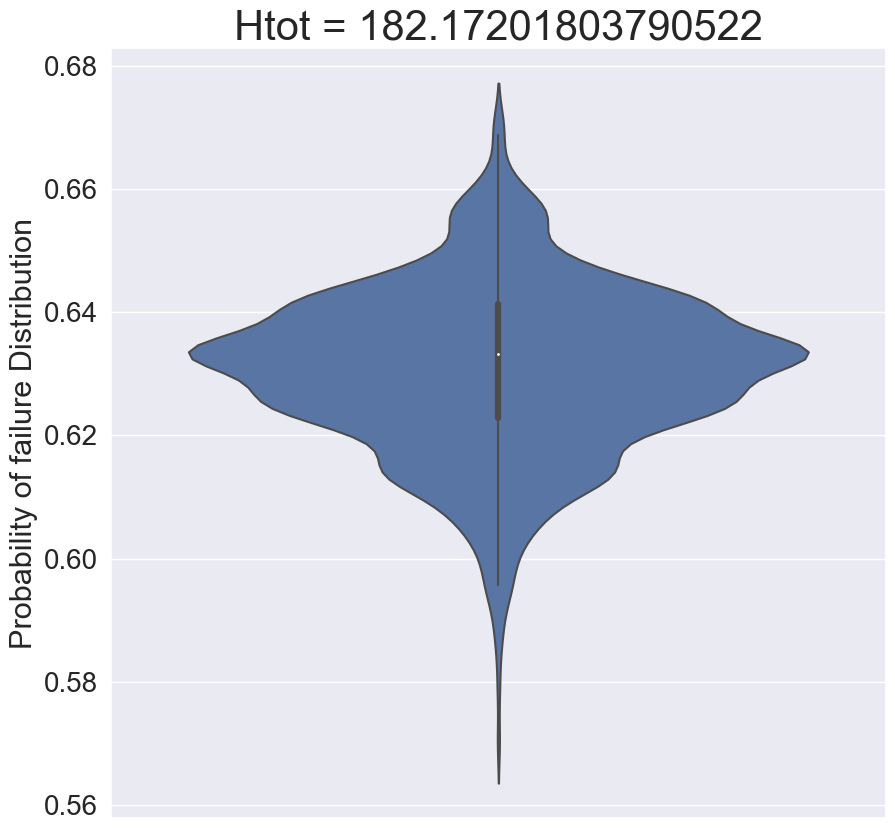

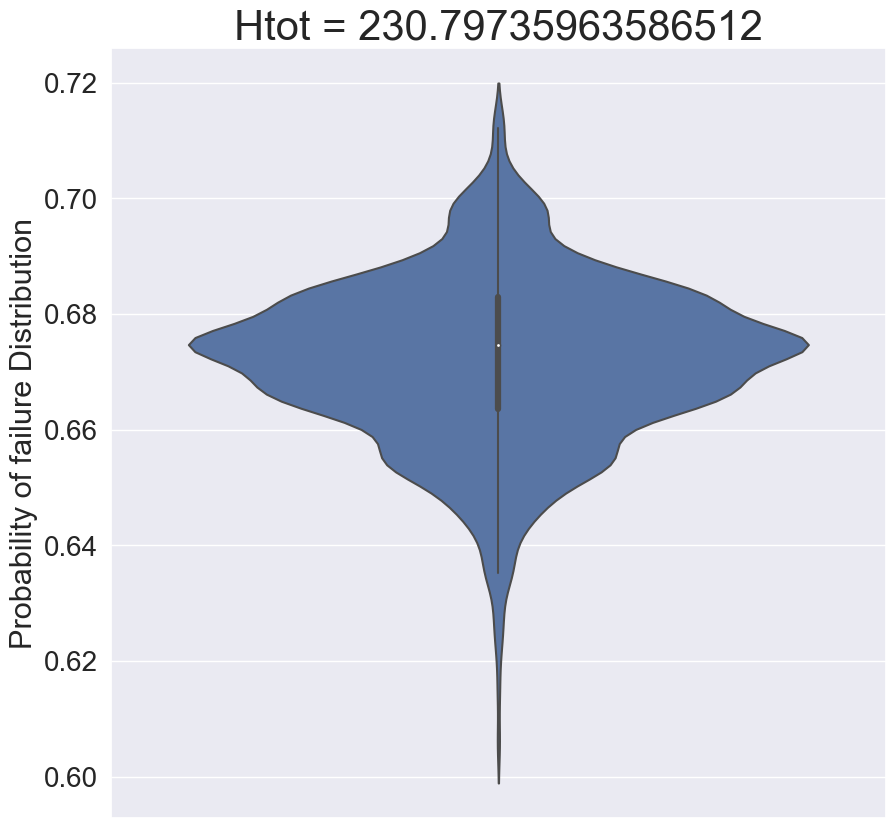

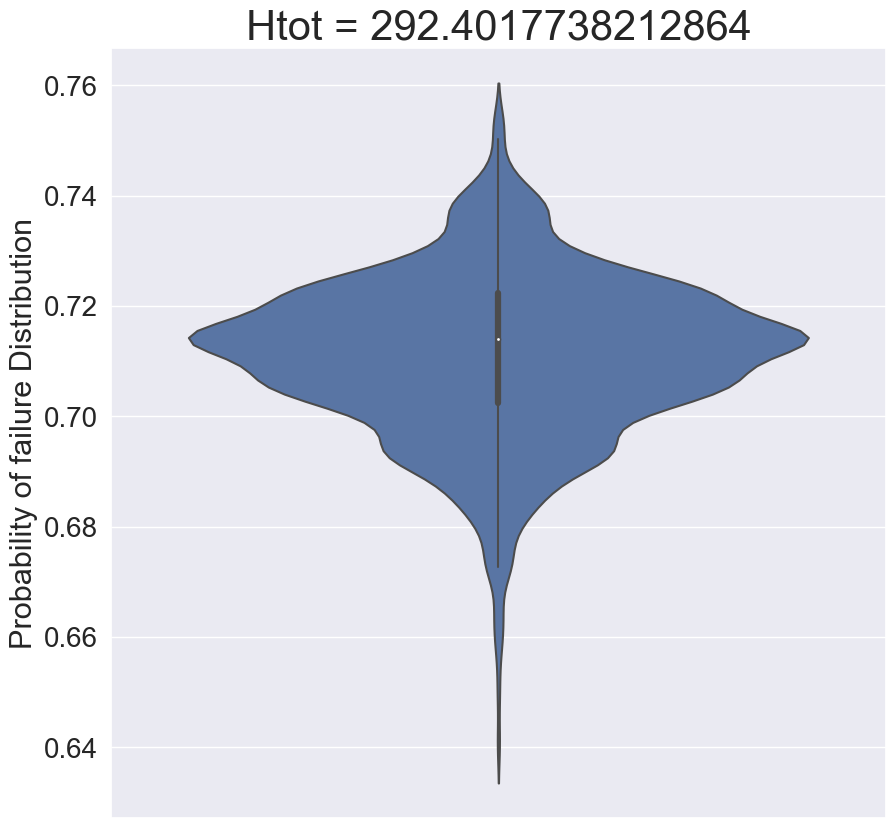

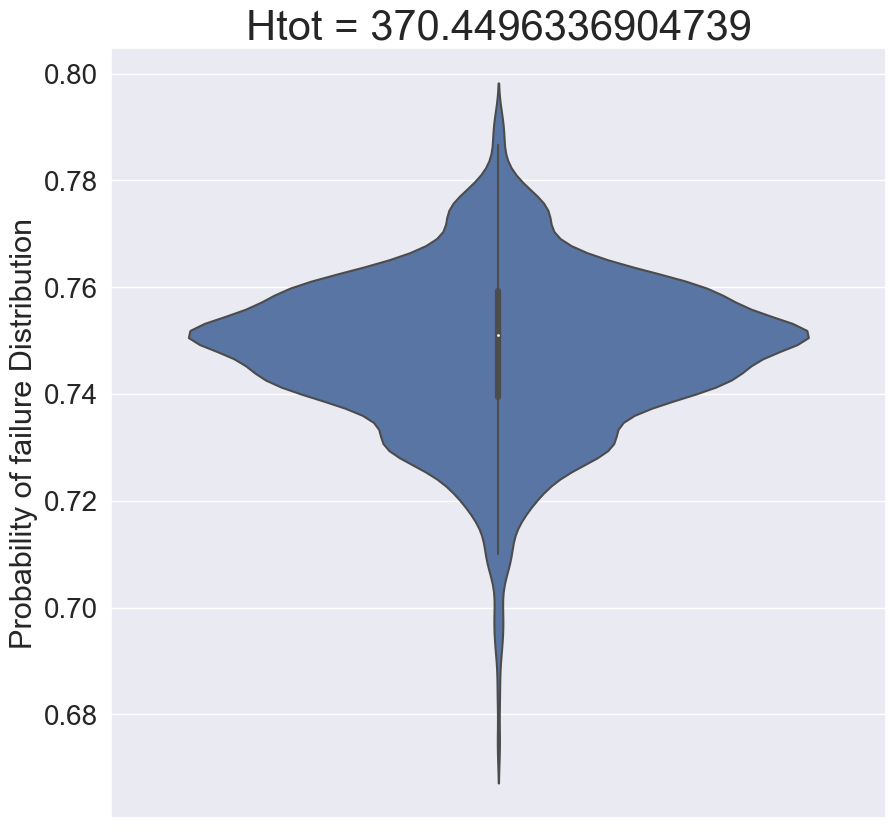

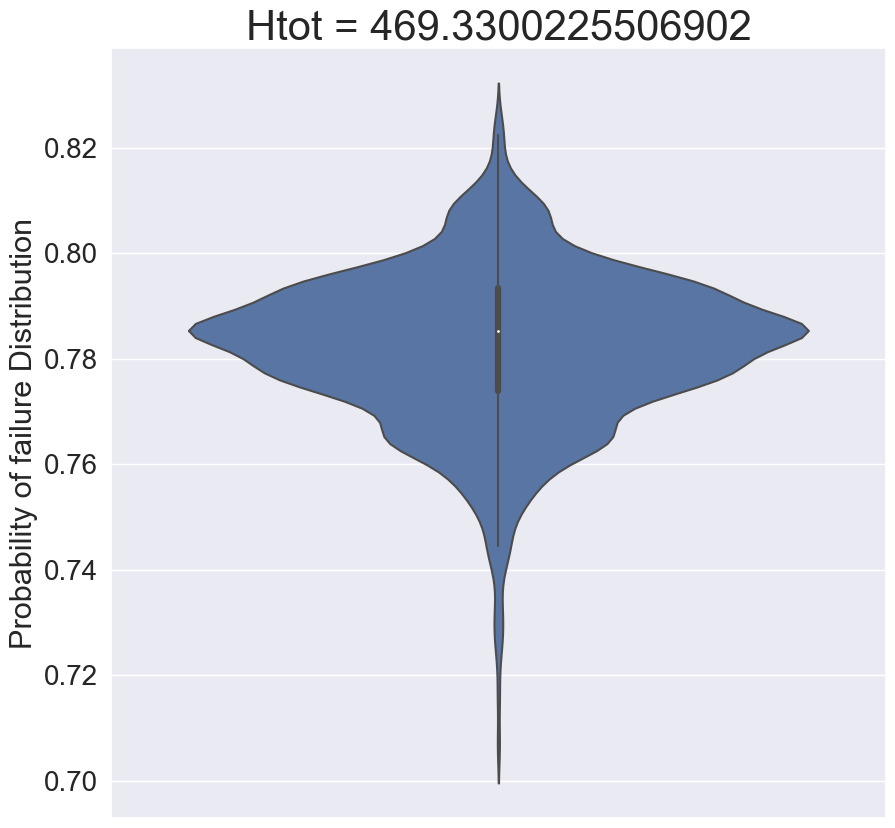

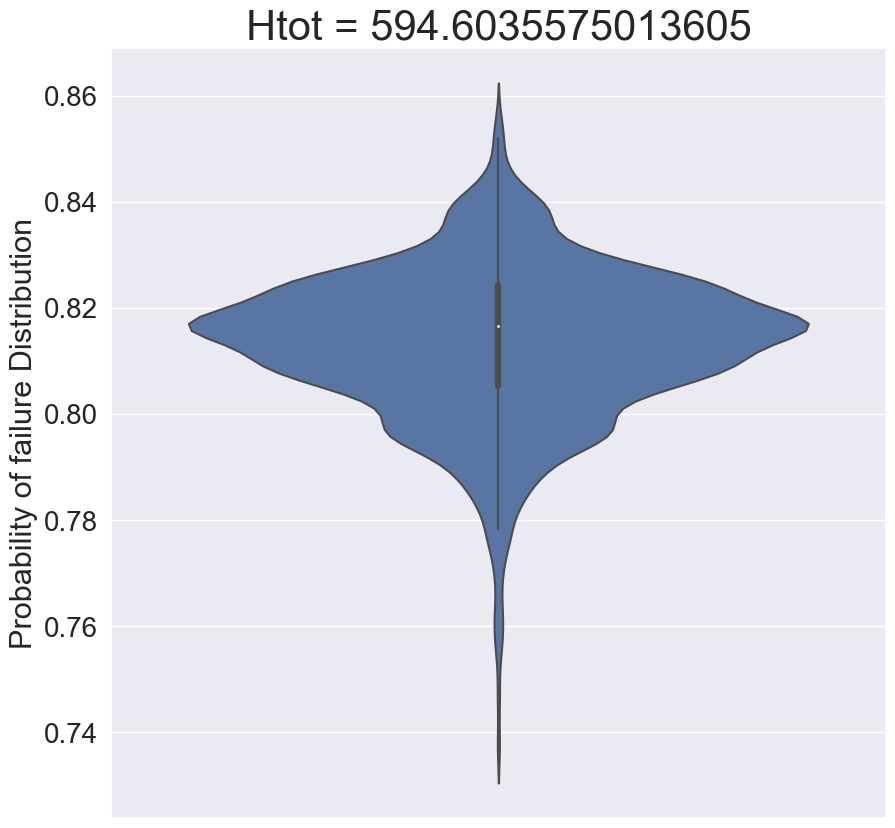

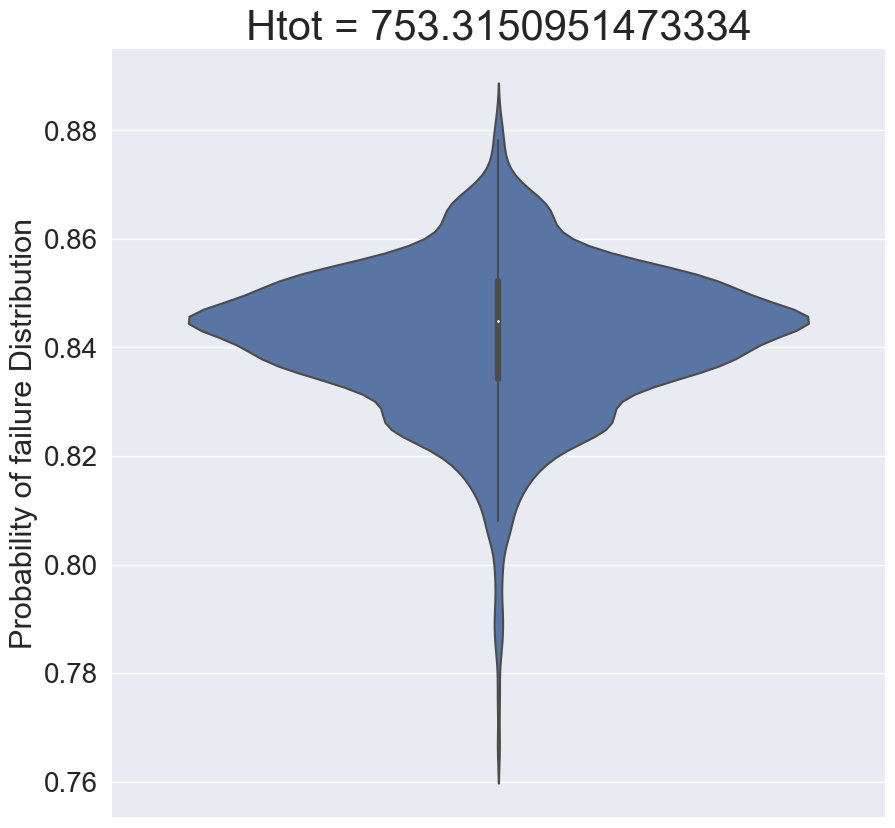

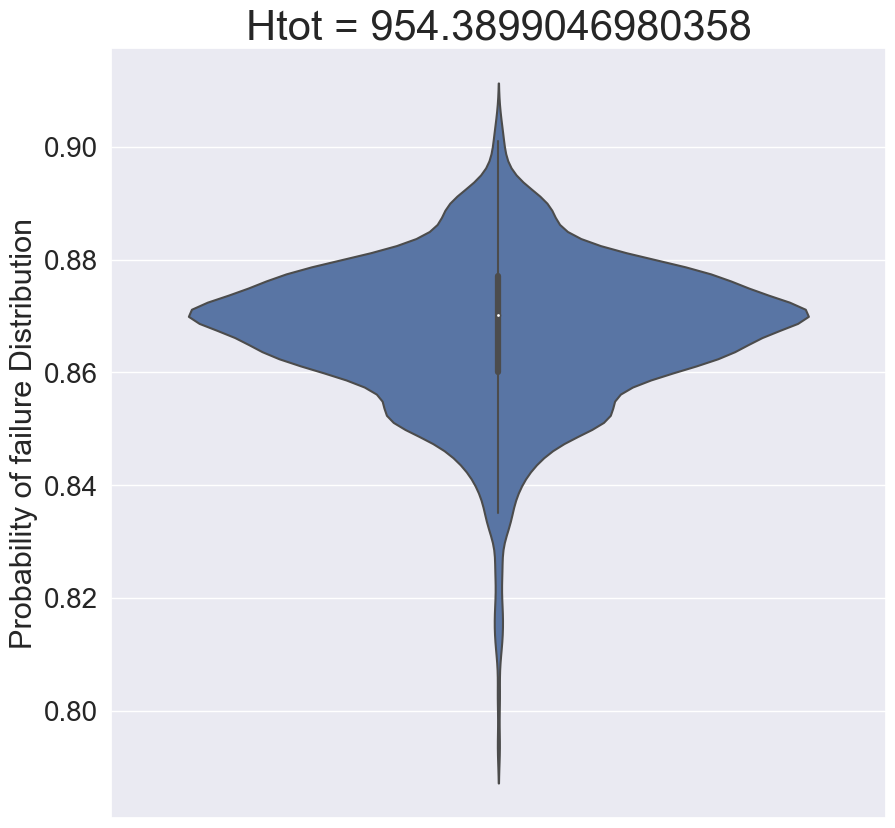

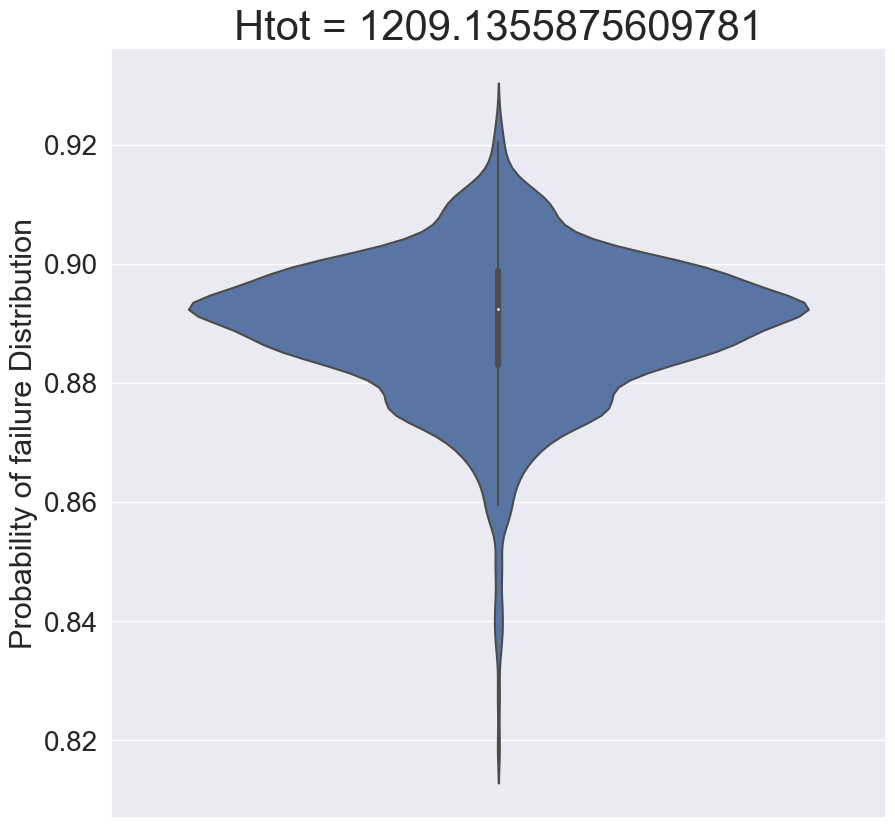

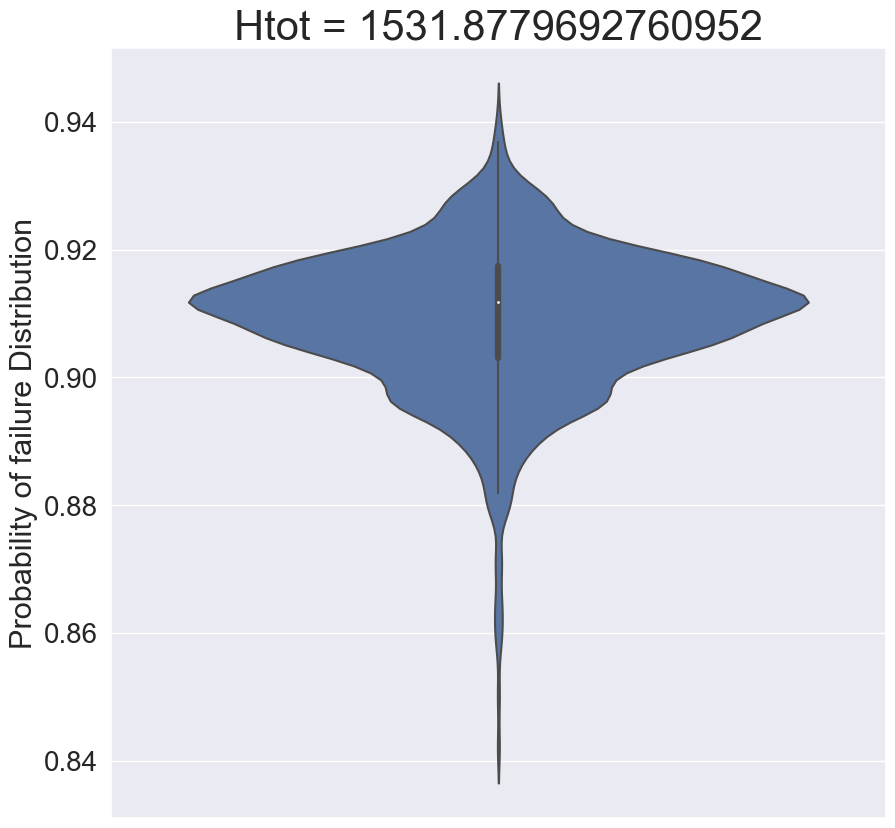

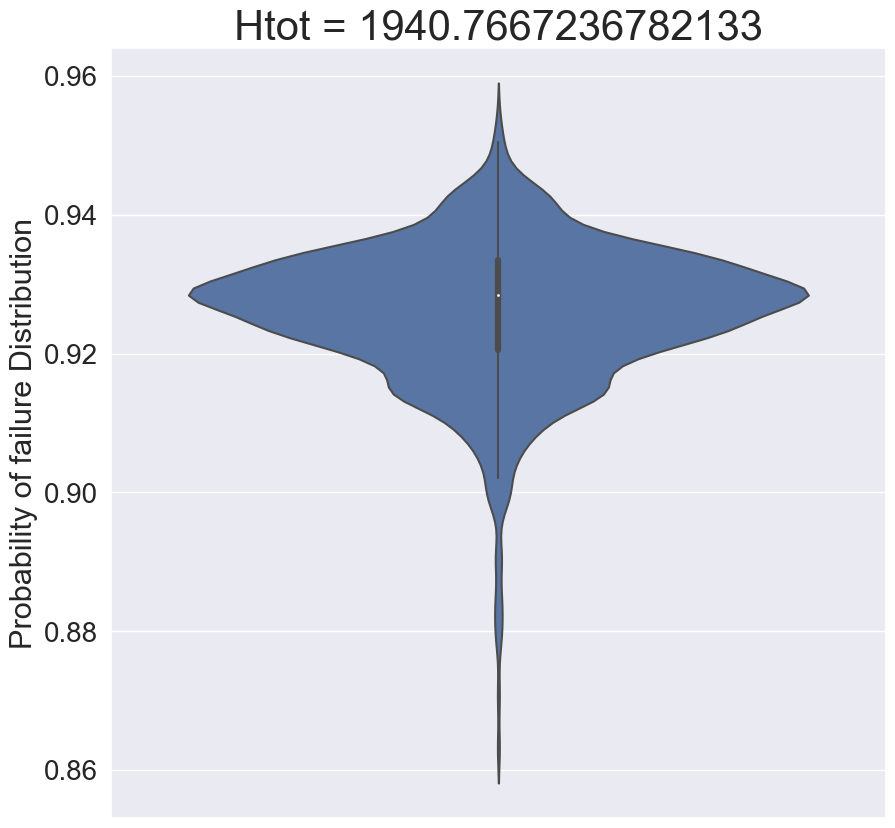

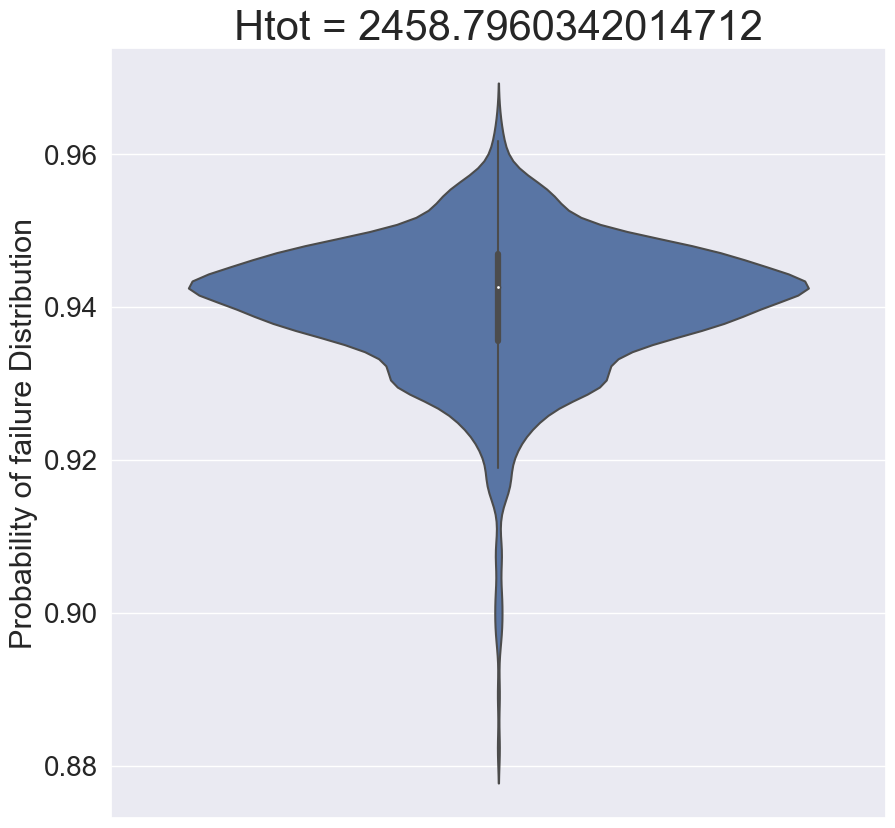

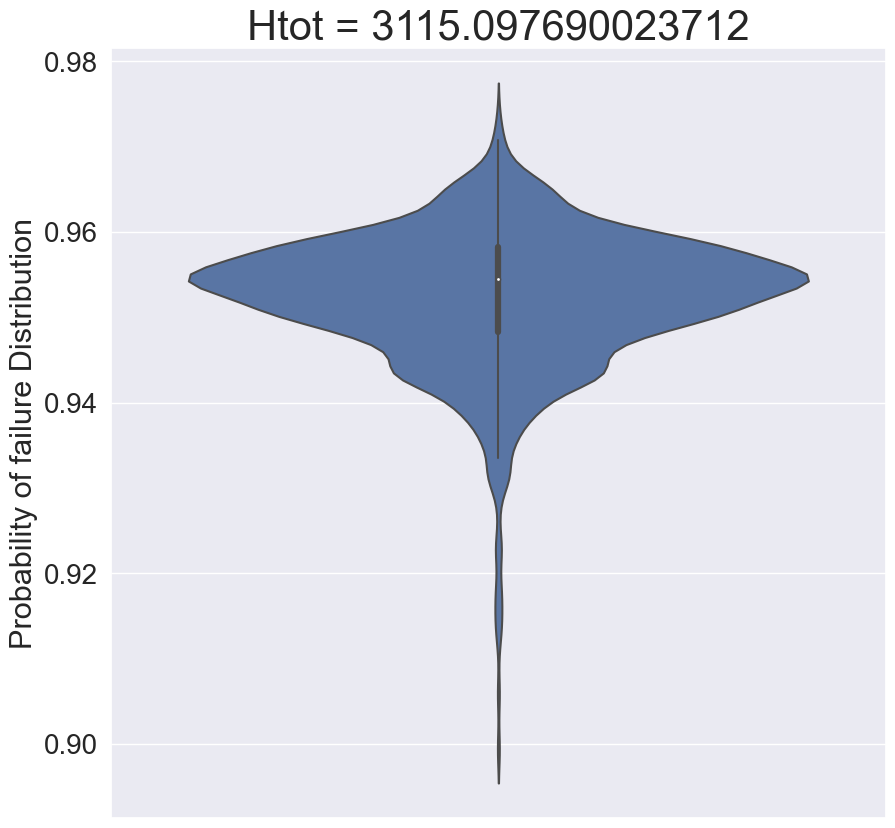

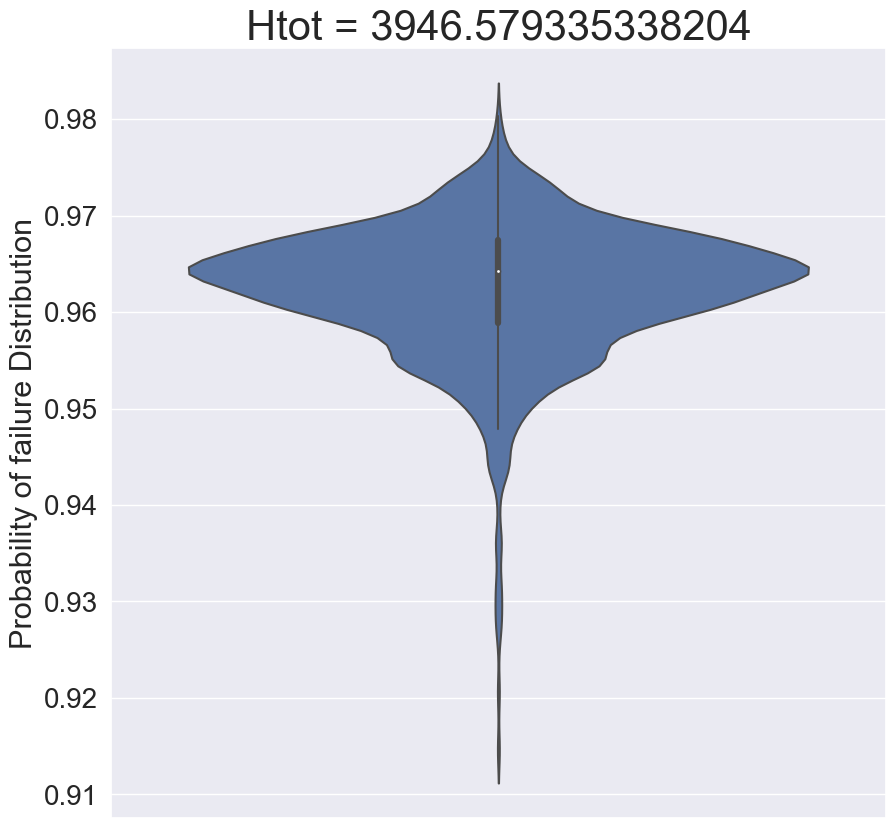

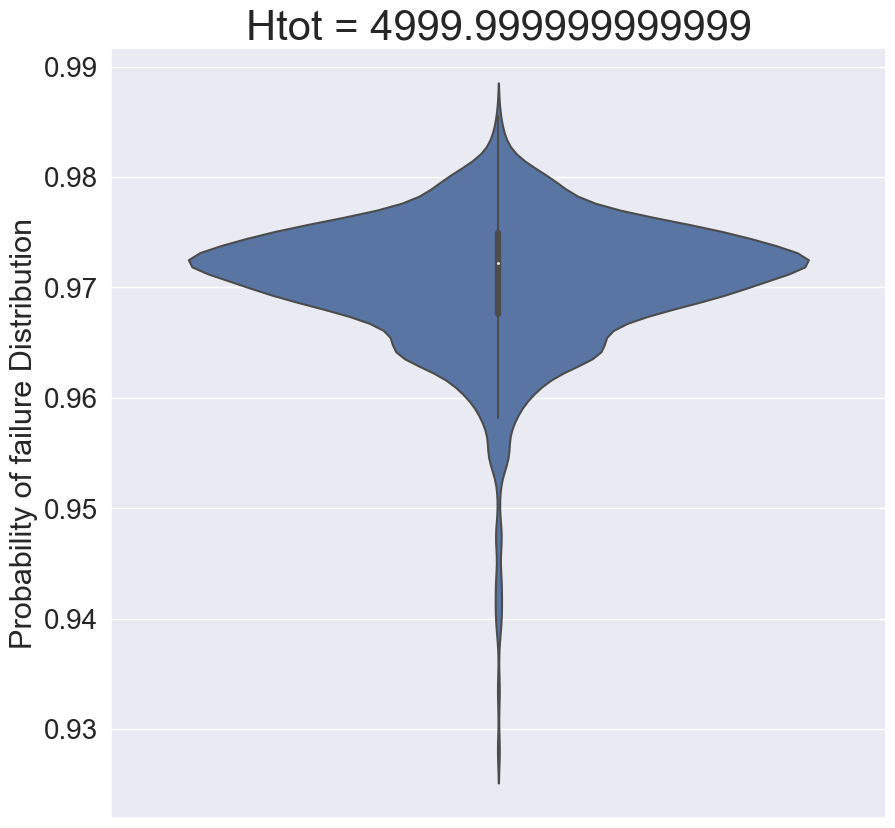

In [68]:
for iii in range(0,DS_1.shape[0]):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax = sns.violinplot(y=DS_1.iloc[iii,:], dodge=True) #x=df.iloc[iii,5]
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    plt.ylabel('Probability of failure Distribution', fontsize=22)
    plt.title('Htot = '+str(DS_1.index[iii]), fontsize=30) #etting the title as the location where event occurred

Now we ant to get the mean and standard deviation of 1,000 iterations at each x value

In [ ]:
DS_1.set_index('Aggregate Liquefaction Hazard')

In [11]:
def stat_sums(DS):
    DS['Mean']=DS.mean(axis=1)
    DS['StdDev']=DS.std(axis=1)

In [12]:
stat_sums(DS_1)

In [13]:
DS_1

0         1         2         3  \
Aggregate Liquefaction Hazard                                           
1.000000                       0.016449  0.017252  0.016974  0.020669   
1.266920                       0.021645  0.022579  0.022226  0.026411   
1.605086                       0.028166  0.029230  0.028789  0.033428   
2.033516                       0.036245  0.037433  0.036889  0.041914   
2.576301                       0.046130  0.047426  0.046763  0.052065   
3.263968                       0.058073  0.059452  0.058653  0.064078   
4.135186                       0.072321  0.073747  0.072797  0.078143   
5.238949                       0.089106  0.090531  0.089414  0.094434   
6.637329                       0.108630  0.109997  0.108701  0.113102   
8.408964                       0.131057  0.132297  0.130812  0.134265   
10.653484                      0.156494  0.157533  0.155850  0.158000   
13.497111                      0.184983  0.185741  0.183859  0.184334   
17.099759                      0.216491  0.216886  0.214807  0.213240   
21.664026                      0.250899  0.250854  0.248585  0.244629   
27.446586                      0.288004  0.287448  0.285003  0.278350   
34.772627                      0.327513  0.326388  0.323785  0.314190   
44.054134                      0.369056  0.367320  0.364583  0.351873   
55.813060                      0.412189  0.409819  0.406975  0.391071   
70.710678                      0.456410  0.453405  0.450488  0.431409   
89.584767                      0.501179  0.497561  0.494605  0.472476   
113.496727                     0.545933  0.541746  0.538787  0.513838   
143.791264                     0.590110  0.585421  0.582496  0.555051   
182.172018                     0.633171  0.628064  0.625208  0.595677   
230.797360                     0.674618  0.669190  0.666435  0.635297   
292.401774                     0.714010  0.708369  0.705744  0.673521   
370.449634                     0.750979  0.745237  0.742767  0.710004   
469.330023                     0.785239  0.779505  0.777209  0.744453   
594.603558                     0.816590  0.810969  0.808861  0.776635   
753.315095                     0.844919  0.839504  0.837592  0.806376   
954.389905                     0.870196  0.865067  0.863354  0.833567   
1209.135588                    0.892467  0.887687  0.886172  0.858162   
1531.877969                    0.911843  0.907458  0.906135  0.880170   
1940.766724                    0.928489  0.924529  0.923386  0.899653   
2458.796034                    0.942610  0.939088  0.938114  0.916717   
3115.097690                    0.954438  0.951352  0.950532  0.931501   
3946.579335                    0.964222  0.961558  0.960875  0.944173   
5000.000000                    0.972214  0.969946  0.969386  0.954919   

                                      4         5         6         7  \
Aggregate Liquefaction Hazard                                           
1.000000                       0.017252  0.014605  0.016449  0.016974   
1.266920                       0.022579  0.019540  0.021645  0.022226   
1.605086                       0.029230  0.025825  0.028166  0.028789   
2.033516                       0.037433  0.033720  0.036245  0.036889   
2.576301                       0.047426  0.043501  0.046130  0.046763   
3.263968                       0.059452  0.055454  0.058073  0.058653   
4.135186                       0.073747  0.069862  0.072321  0.072797   
5.238949                       0.090531  0.086991  0.089106  0.089414   
6.637329                       0.109997  0.107078  0.108630  0.108701   
8.408964                       0.132297  0.130313  0.131057  0.130812   
10.653484                      0.157533  0.156821  0.156494  0.155850   
13.497111                      0.185741  0.186651  0.184983  0.183859   
17.099759                      0.216886  0.219761  0.216491  0.214807   
21.664026                      0.250854  0.256009  0.250899  0.248585   
27.446586             

In [21]:
DS_1.iloc[0,1001]

0.0020012297111519253

In [16]:
#stat_sums(DS_1)
stat_sums(DS_2)
stat_sums(DS_3)
stat_sums(DS_4)
stat_sums(DS_5)

Now we construct +/- 2 std dev interval in which 95% of data falls. Create four new columns: Int_0.025, Int

In [47]:
def inter(DS):
    a=[]
    b=[]
    c=[]
    d=[]
    for row in range(0, DS.shape[0]):
        
        mean=DS.iloc[row,1000]
        stddev=DS.iloc[row,1001]
        lower=mean-stddev
        upper=mean+stddev
        a.append(lower)
        b.append(upper)
        
        mean=DS.iloc[row,1000]
        stddev=DS.iloc[row,1001]
        lower=mean-2*stddev
        upper=mean+2*stddev
        c.append(lower)
        d.append(upper)
    DS['Int_0.16']=a
    DS['Int_0.84']=b
    DS['Int_0.025']=c # Renaming columns with appropriate confidence interval labels
    DS['Int_0.975']=d

In [48]:
inter(DS_1)

In [49]:
DS_1

0         1         2         3  \
Aggregate Liquefaction Hazard                                           
1.000000                       0.016449  0.017252  0.016974  0.020669   
1.266920                       0.021645  0.022579  0.022226  0.026411   
1.605086                       0.028166  0.029230  0.028789  0.033428   
2.033516                       0.036245  0.037433  0.036889  0.041914   
2.576301                       0.046130  0.047426  0.046763  0.052065   
3.263968                       0.058073  0.059452  0.058653  0.064078   
4.135186                       0.072321  0.073747  0.072797  0.078143   
5.238949                       0.089106  0.090531  0.089414  0.094434   
6.637329                       0.108630  0.109997  0.108701  0.113102   
8.408964                       0.131057  0.132297  0.130812  0.134265   
10.653484                      0.156494  0.157533  0.155850  0.158000   
13.497111                      0.184983  0.185741  0.183859  0.184334   
17.099759                      0.216491  0.216886  0.214807  0.213240   
21.664026                      0.250899  0.250854  0.248585  0.244629   
27.446586                      0.288004  0.287448  0.285003  0.278350   
34.772627                      0.327513  0.326388  0.323785  0.314190   
44.054134                      0.369056  0.367320  0.364583  0.351873   
55.813060                      0.412189  0.409819  0.406975  0.391071   
70.710678                      0.456410  0.453405  0.450488  0.431409   
89.584767                      0.501179  0.497561  0.494605  0.472476   
113.496727                     0.545933  0.541746  0.538787  0.513838   
143.791264                     0.590110  0.585421  0.582496  0.555051   
182.172018                     0.633171  0.628064  0.625208  0.595677   
230.797360                     0.674618  0.669190  0.666435  0.635297   
292.401774                     0.714010  0.708369  0.705744  0.673521   
370.449634                     0.750979  0.745237  0.742767  0.710004   
469.330023                     0.785239  0.779505  0.777209  0.744453   
594.603558                     0.816590  0.810969  0.808861  0.776635   
753.315095                     0.844919  0.839504  0.837592  0.806376   
954.389905                     0.870196  0.865067  0.863354  0.833567   
1209.135588                    0.892467  0.887687  0.886172  0.858162   
1531.877969                    0.911843  0.907458  0.906135  0.880170   
1940.766724                    0.928489  0.924529  0.923386  0.899653   
2458.796034                    0.942610  0.939088  0.938114  0.916717   
3115.097690                    0.954438  0.951352  0.950532  0.931501   
3946.579335                    0.964222  0.961558  0.960875  0.944173   
5000.000000                    0.972214  0.969946  0.969386  0.954919   

                                      4         5         6         7  \
Aggregate Liquefaction Hazard                                           
1.000000                       0.017252  0.014605  0.016449  0.016974   
1.266920                       0.022579  0.019540  0.021645  0.022226   
1.605086                       0.029230  0.025825  0.028166  0.028789   
2.033516                       0.037433  0.033720  0.036245  0.036889   
2.576301                       0.047426  0.043501  0.046130  0.046763   
3.263968                       0.059452  0.055454  0.058073  0.058653   
4.135186                       0.073747  0.069862  0.072321  0.072797   
5.238949                       0.090531  0.086991  0.089106  0.089414   
6.637329                       0.109997  0.107078  0.108630  0.108701   
8.408964                       0.132297  0.130313  0.131057  0.130812   
10.653484                      0.157533  0.156821  0.156494  0.155850   
13.497111                      0.185741  0.186651  0.184983  0.183859   
17.099759                      0.216886  0.219761  0.216491  0.214807   
21.664026                      0.250854  0.256009  0.250899  0.248585   
27.446586             

In [52]:
inter(DS_2)
inter(DS_3)
inter(DS_4)
inter(DS_5)

In [53]:
DS_2

0         1         2         3  \
Aggregate Liquefaction Hazard                                           
1.000000                       0.003263  0.003531  0.003313  0.004373   
1.266920                       0.004803  0.005153  0.004860  0.006208   
1.605086                       0.006962  0.007408  0.007020  0.008694   
2.033516                       0.009935  0.010492  0.009989  0.012014   
2.576301                       0.013961  0.014638  0.013998  0.016381   
3.263968                       0.019323  0.020123  0.019325  0.022043   
4.135186                       0.026341  0.027260  0.026283  0.029275   
5.238949                       0.035374  0.036396  0.035224  0.038376   
6.637329                       0.046805  0.047896  0.046519  0.049663   
8.408964                       0.061025  0.062139  0.060553  0.063452   
10.653484                      0.078418  0.079487  0.077701  0.080054   
13.497111                      0.099332  0.100274  0.098306  0.099746   
17.099759                      0.124058  0.124773  0.122653  0.122762   
21.664026                      0.152798  0.153173  0.150945  0.149268   
27.446586                      0.185640  0.185559  0.183276  0.179344   
34.772627                      0.222539  0.221884  0.219610  0.212971   
44.054134                      0.263296  0.261962  0.259765  0.250014   
55.813060                      0.307557  0.305456  0.303405  0.290223   
70.710678                      0.354813  0.351886  0.350047  0.333226   
89.584767                      0.404418  0.400637  0.399070  0.378543   
113.496727                     0.455610  0.450990  0.449741  0.425595   
143.791264                     0.507552  0.502144  0.501246  0.473733   
182.172018                     0.559366  0.553264  0.552730  0.522259   
230.797360                     0.610181  0.603512  0.603340  0.570456   
292.401774                     0.659178  0.652096  0.652264  0.617624   
370.449634                     0.705626  0.698302  0.698775  0.663107   
469.330023                     0.748915  0.741527  0.742257  0.706321   
594.603558                     0.788582  0.781301  0.782233  0.746776   
753.315095                     0.824316  0.817302  0.818377  0.784093   
954.389905                     0.855966  0.849355  0.850513  0.818008   
1209.135588                    0.883526  0.877424  0.878612  0.848381   
1531.877969                    0.907120  0.901603  0.902773  0.875180   
1940.766724                    0.926980  0.922091  0.923203  0.898479   
2458.796034                    0.943413  0.939167  0.940193  0.918439   
3115.097690                    0.956783  0.953165  0.954086  0.935285   
3946.579335                    0.967477  0.964454  0.965259  0.949296   
5000.000000                    0.975887  0.973408  0.974095  0.960777   

                                      4         5         6         7  \
Aggregate Liquefaction Hazard                                           
1.000000                       0.003531  0.002902  0.003263  0.003313   
1.266920                       0.005153  0.004343  0.004803  0.004860   
1.605086                       0.007408  0.006395  0.006962  0.007020   
2.033516                       0.010492  0.009261  0.009935  0.009989   
2.576301                       0.014638  0.013194  0.013961  0.013998   
3.263968                       0.020123  0.018495  0.019323  0.019325   
4.135186                       0.027260  0.025510  0.026341  0.026283   
5.238949                       0.036396  0.034628  0.035374  0.035224   
6.637329                       0.047896  0.046267  0.046805  0.046519   
8.408964                       0.062139  0.060857  0.061025  0.060553   
10.653484                      0.079487  0.078820  0.078418  0.077701   
13.497111                      0.100274  0.100539  0.099332  0.098306   
17.099759                      0.124773  0.126328  0.124058  0.122653   
21.664026                      0.153173  0.156402  0.152798  0.150945   
27.446586             

In [27]:
DS_1['Aggregate Liquefaction Hazard'] = DS_1.index

In [57]:
DS_2['Aggregate Liquefaction Hazard'] = DS_1.index
DS_3['Aggregate Liquefaction Hazard'] = DS_1.index
DS_4['Aggregate Liquefaction Hazard'] = DS_1.index
DS_5['Aggregate Liquefaction Hazard'] = DS_1.index

In [58]:
DS_2

0         1         2         3  \
Aggregate Liquefaction Hazard                                           
1.000000                       0.003263  0.003531  0.003313  0.004373   
1.266920                       0.004803  0.005153  0.004860  0.006208   
1.605086                       0.006962  0.007408  0.007020  0.008694   
2.033516                       0.009935  0.010492  0.009989  0.012014   
2.576301                       0.013961  0.014638  0.013998  0.016381   
3.263968                       0.019323  0.020123  0.019325  0.022043   
4.135186                       0.026341  0.027260  0.026283  0.029275   
5.238949                       0.035374  0.036396  0.035224  0.038376   
6.637329                       0.046805  0.047896  0.046519  0.049663   
8.408964                       0.061025  0.062139  0.060553  0.063452   
10.653484                      0.078418  0.079487  0.077701  0.080054   
13.497111                      0.099332  0.100274  0.098306  0.099746   
17.099759                      0.124058  0.124773  0.122653  0.122762   
21.664026                      0.152798  0.153173  0.150945  0.149268   
27.446586                      0.185640  0.185559  0.183276  0.179344   
34.772627                      0.222539  0.221884  0.219610  0.212971   
44.054134                      0.263296  0.261962  0.259765  0.250014   
55.813060                      0.307557  0.305456  0.303405  0.290223   
70.710678                      0.354813  0.351886  0.350047  0.333226   
89.584767                      0.404418  0.400637  0.399070  0.378543   
113.496727                     0.455610  0.450990  0.449741  0.425595   
143.791264                     0.507552  0.502144  0.501246  0.473733   
182.172018                     0.559366  0.553264  0.552730  0.522259   
230.797360                     0.610181  0.603512  0.603340  0.570456   
292.401774                     0.659178  0.652096  0.652264  0.617624   
370.449634                     0.705626  0.698302  0.698775  0.663107   
469.330023                     0.748915  0.741527  0.742257  0.706321   
594.603558                     0.788582  0.781301  0.782233  0.746776   
753.315095                     0.824316  0.817302  0.818377  0.784093   
954.389905                     0.855966  0.849355  0.850513  0.818008   
1209.135588                    0.883526  0.877424  0.878612  0.848381   
1531.877969                    0.907120  0.901603  0.902773  0.875180   
1940.766724                    0.926980  0.922091  0.923203  0.898479   
2458.796034                    0.943413  0.939167  0.940193  0.918439   
3115.097690                    0.956783  0.953165  0.954086  0.935285   
3946.579335                    0.967477  0.964454  0.965259  0.949296   
5000.000000                    0.975887  0.973408  0.974095  0.960777   

                                      4         5         6         7  \
Aggregate Liquefaction Hazard                                           
1.000000                       0.003531  0.002902  0.003263  0.003313   
1.266920                       0.005153  0.004343  0.004803  0.004860   
1.605086                       0.007408  0.006395  0.006962  0.007020   
2.033516                       0.010492  0.009261  0.009935  0.009989   
2.576301                       0.014638  0.013194  0.013961  0.013998   
3.263968                       0.020123  0.018495  0.019323  0.019325   
4.135186                       0.027260  0.025510  0.026341  0.026283   
5.238949                       0.036396  0.034628  0.035374  0.035224   
6.637329                       0.047896  0.046267  0.046805  0.046519   
8.408964                       0.062139  0.060857  0.061025  0.060553   
10.653484                      0.079487  0.078820  0.078418  0.077701   
13.497111                      0.100274  0.100539  0.099332  0.098306   
17.099759                      0.124773  0.126328  0.124058  0.122653   
21.664026                      0.153173  0.156402  0.152798  0.150945   
27.446586             

In [117]:
DS =DS_1

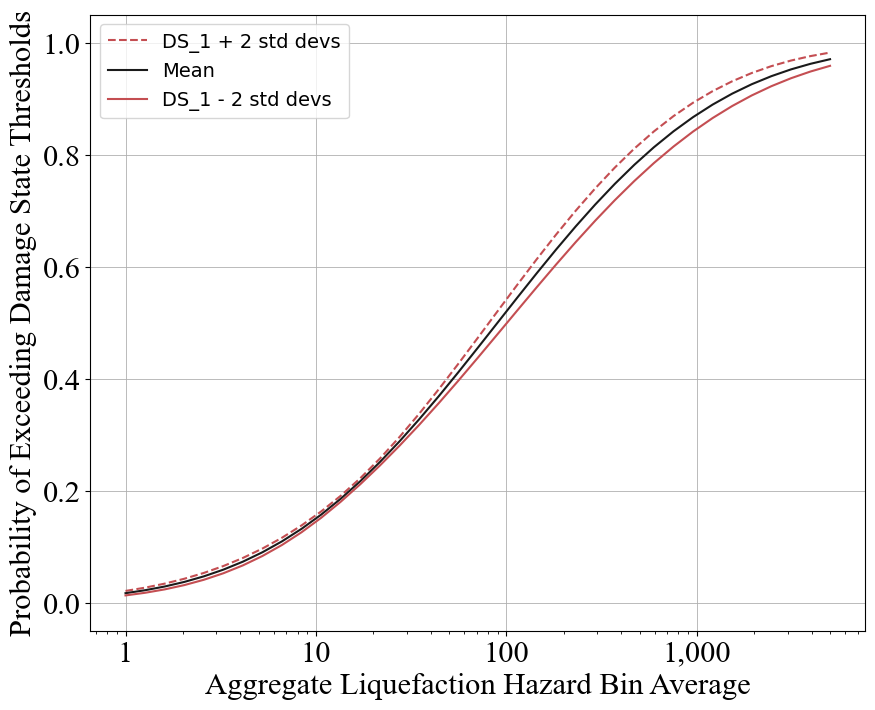

In [118]:
mpl.style.use('default')
fig, ax = plt.subplots(figsize=(10,8))
csfont = {'fontname':'Times New Roman','size':22}
ax.set_xscale('log')

# ax.plot('Aggregate Liquefaction Hazard', 'Int_0.16', 'k-', label='DS_1 16%',data=DS_1)
# ax.plot('Aggregate Liquefaction Hazard', 'Int_0.84', 'k--', label='DS_1 84%',data=DS_1)

ax.plot('Aggregate Liquefaction Hazard', 'Int_0.975', 'r--', label='DS_1 + 2 std devs',data=DS)
ax.plot('Aggregate Liquefaction Hazard', 'Mean', 'k-', label='Mean',data=DS)
ax.plot('Aggregate Liquefaction Hazard', 'Int_0.025', 'r-', label='DS_1 - 2 std devs',data=DS)

plt.xlabel('Aggregate Liquefaction Hazard Bin Average', fontsize=28,**csfont)
plt.ylabel('Probability of Exceeding Damage State Thresholds', fontsize=28,**csfont)
plt.legend(loc='upper left', fontsize='14')

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

plt.xticks([1,10,100,1000],**csfont)
    # For ticks, need max to be one unit higher than the value I actually want
plt.ylim(-0.05, 1.05)
plt.yticks(np.arange(0, 1.2, 0.2),**csfont)
plt.grid(linestyle='-', linewidth='0.6')

In [297]:
del DS_5['Mean']
del DS_5['StdDev']

In [ ]:
#stats.norm.interval(0.68, loc=mu, scale=sigma)

In [80]:
def conf(DS):
    a=[]
    b=[]
    c=[]
    d=[]
    for row in range(0, DS.shape[0]):
        sample=DS.iloc[row,np.linspace(0,999,num=1000)] # Creating a sample of one row, columns 0 through 999 to avoid mean and standard deviation
        confidence_level = 0.95
        degrees_freedom = sample.size - 1
        sample_mean = np.mean(sample)
        sample_standard_error = scipy.stats.sem(sample)

        confidence_interval = scipy.stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
        a.append(confidence_interval[0])
        b.append(confidence_interval[1])
        
        sample=DS.iloc[row,np.linspace(0,999,num=1000)] # This line is likely not necessary twice
        confidence_level = 0.68
        degrees_freedom = sample.size - 1
        sample_mean = np.mean(sample)
        sample_standard_error = scipy.stats.sem(sample)
        
        confidence_interval = scipy.stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)        
        c.append(confidence_interval[0])
        d.append(confidence_interval[1])
    DS['CI_0.025']=a # Renaming columns with appropriate confidence interval labels
    DS['CI_0.975']=b
    DS['CI_0.16']=c
    DS['CI_0.84']=d

In [81]:
conf(DS_1)

In [82]:
conf(DS_2)
conf(DS_3)
conf(DS_4)
conf(DS_5)

# Now we need to actually make lines of the CI values for each DS and plot

In [34]:
DS_1['Aggregate Liquefaction Hazard'] = DS_1.index

In [315]:
DS_2['Aggregate Liquefaction Hazard'] = DS_2.index
DS_3['Aggregate Liquefaction Hazard'] = DS_3.index
DS_4['Aggregate Liquefaction Hazard'] = DS_4.index
DS_5['Aggregate Liquefaction Hazard'] = DS_5.index

In [90]:
DS = 'DS_2'

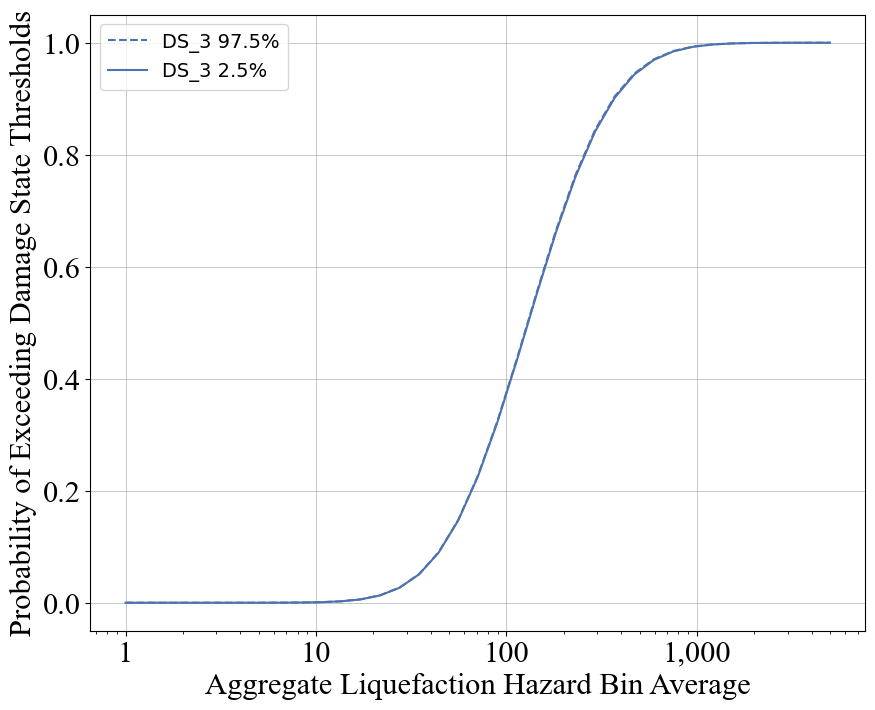

In [95]:
mpl.style.use('default')
fig, ax = plt.subplots(figsize=(10,8))
csfont = {'fontname':'Times New Roman','size':22}
ax.set_xscale('log')

ax.plot('Aggregate Liquefaction Hazard', 'CI_0.975', 'b--', label='DS_3 97.5%',data=DS_4)
ax.plot('Aggregate Liquefaction Hazard', 'CI_0.025', 'b-', label='DS_3 2.5%',data=DS_4)

# ax.plot('Aggregate Liquefaction Hazard', 'CI_0.16', 'b-', label=str(DS)+' 16%',data=DS_1)
# ax.plot('Aggregate Liquefaction Hazard', 'CI_0.84', 'b--', label=str(DS)+' 84%',data=DS_1)

plt.xlabel('Aggregate Liquefaction Hazard Bin Average', fontsize=28,**csfont)
plt.ylabel('Probability of Exceeding Damage State Thresholds', fontsize=28,**csfont)
plt.legend(loc='upper left', fontsize='14')

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
plt.xticks([1,10,100,1000],**csfont)
    # For ticks, need max to be one unit higher than the value I actually want
plt.ylim(-0.05, 1.05)
plt.yticks(np.arange(0, 1.2, 0.2),**csfont)
plt.grid(linestyle='-', linewidth='0.5')

In [316]:
def plot(DS):
    mpl.style.use('default')
    fig, ax = plt.subplots(figsize=(6, 4.5))
    csfont = {'fontname':'Times New Roman'}
    ax.set_xscale('log')

    ax.plot('Aggregate Liquefaction Hazard', 'CI_0.025', 'k-', label=str(DS)+' 2.5%',data=DS)
    ax.plot('Aggregate Liquefaction Hazard', 'CI_0.975', 'k--', label=str(DS)+' 97.5%',data=DS)

    ax.plot('Aggregate Liquefaction Hazard', 'CI_0.16', 'b-', label=str(DS)+' 16%',data=DS)
    ax.plot('Aggregate Liquefaction Hazard', 'CI_0.84', 'b--', label=str(DS)+' 84%',data=DS)

    plt.xlabel('Aggregate Liquefaction Hazard Bin Average', fontsize=10,**csfont)
    plt.ylabel('Probability of Exceeding Damage State Thresholds', fontsize=10,**csfont)
    plt.legend(loc='upper left', fontsize='8')

    fmt = '{x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.xaxis.set_major_formatter(tick)
    plt.xticks([1,10,100,1000],**csfont)
        # For ticks, need max to be one unit higher than the value I actually want
    plt.ylim(-0.05, 1.05)
    plt.yticks(np.arange(0, 1.2, 0.2),**csfont)
    plt.grid(linestyle='-', linewidth='0.5')